# Jira Board Connection

In [204]:
#! pip3 install jira
#! python3 -m pip install jira
# ! pip3 install tabulate
#! pip3 install fpdf

## --- Import Libraries ---

In [205]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np # For grouped bar chart calculations
from collections import defaultdict, Counter
from jira import JIRA
from getpass import getpass # To securely get the API token
import json
import sys # To exit gracefully on error
import seaborn as sns
from tabulate import tabulate
from datetime import date
import numpy as np
import datetime
from fpdf import FPDF # Using fpdf2 is recommended for more features (pip install fpdf2)
                     # If using original fpdf (pip install fpdf), some advanced multi_cell args might not be available
                     # but the core logic for table drawing will be similar.




## --- Read the Local Credentials Json file ---

In [206]:
# --- Configuration File Handling ---
CONFIG_FILENAME = "config.json"

def load_config(filepath=CONFIG_FILENAME):
    """
    Loads configuration data from a JSON file.

    Args:
        filepath (str): The path to the configuration file.
                        Defaults to CONFIG_FILENAME in the script's directory.

    Returns:
        dict: A dictionary containing the configuration data.
            Returns None if the file cannot be read or parsed.
    """
    config_path = os.path.join(os.getcwd(), filepath) # Look in the current working directory

    if not os.path.exists(config_path):
        print(f"Error: Configuration file not found at '{config_path}'")
        print("Please create the file with your Jira server, email, and API token.")
        return None

    try:
        with open(config_path, 'r') as f:
            config_data = json.load(f)
            # Basic validation (check if essential keys exist)
            required_keys = ["jira_server", "jira_email", "jira_api_token"]
            if not all(key in config_data for key in required_keys):
                missing = [key for key in required_keys if key not in config_data]
                print(f"Error: Configuration file '{config_path}' is missing required keys: {missing}")
                return None
            # Optional: Add more specific validation (e.g., check if token is not empty)
            if not config_data.get("jira_api_token"):
                print(f"Error: 'jira_api_token' found in '{config_path}' but it is empty.")
                return None

            print(f"Successfully loaded configuration from '{config_path}'")
            return config_data

    except json.JSONDecodeError as e:
        print(f"Error: Could not parse JSON in configuration file '{config_path}'.")
        print(f"Details: {e}")
        return None
    except Exception as e:
        print(f"Error: An unexpected error occurred while reading '{config_path}'.")
        print(f"Details: {e}")
        return None


In [207]:
# Load configuration at the start
config = load_config()

if config is None:
    print("Exiting due to configuration error.")
    sys.exit(1) # Exit with a non-zero code indicating an error

# Now access credentials from the loaded config dictionary
jira_server = config.get("jira_server")
jira_email = config.get("jira_email")
jira_token = config.get("jira_api_token")

# --- You can now use these variables in your Jira connection logic ---
# (Example snippet from previous code)
# from jira import JIRA

# print(f"\nConnecting to Jira at {JIRA_SERVER} using credentials from config...")
# try:
#     jira_options = {'server': JIRA_SERVER}
#     # Use the loaded credentials for basic_auth
#     jira = JIRA(options=jira_options, basic_auth=(JIRA_EMAIL, JIRA_API_TOKEN))
#     print("Successfully connected to Jira.")
#     # ... rest of your Jira interaction code ...

# except Exception as e:
#     print(f"Failed to connect to Jira: {e}")
#     sys.exit(1)

# --- Placeholder for rest of your script ---
print("\nCredentials loaded:")
#print(f"  Server: {jira_server}")
#print(f"  Email: {jira_email}")
# Avoid printing the token itself for security!
#print(f"  API Token: {'*' * len(jira_token) if jira_token else 'Not Loaded'}")

# ... (Your code to fetch issues, visualize, etc. would go here) ...

print("\nScript finished executing.")
# --- End of Configuration File Handling ---


Successfully loaded configuration from '/Users/jorge.rodriguez/Library/CloudStorage/GoogleDrive-jorge.rodriguez@audacy.com/My Drive/GitHub/Jira-1/config.json'

Credentials loaded:

Script finished executing.


## --- Validate Connection to the Jira Server ---

In [208]:
# Authentication
# Jira server URL
#jira_server = "https://xxxxxxxxxx"  # Replace with your Jira instance URL
# Authentication options
# Option 1: Using Personal Access Token (PAT) - Recommended for Jira Cloud
#jira_email = "xxxxxxxxx"  # Replace with your Jira email address
#jira_token = "xxxxxxxxx"  # Replace with your Jira API token

auth_type = "pat"

jira_options = {'server': jira_server}

try:
    if auth_type == "pat":
        jira = JIRA(options=jira_options, basic_auth=(jira_email, jira_token))
        print(f"Successfully connected to Jira at {jira_server} using Personal Access Token.")
    elif auth_type == "basic":
        jira = JIRA(options=jira_options, basic_auth=(jira_username, jira_password))
        print(f"Successfully connected to Jira at {jira_server} using Basic Authentication.")
    else:
        print("Invalid authentication type selected.")
except Exception as e:
    print(f"Error connecting to Jira or accessing boards: {e}")
        

Successfully connected to Jira at https://entercomdigitalservices.atlassian.net using Personal Access Token.


## --- Get a list of all the Jira Boards ---

In [209]:
# Get all boards
boards = jira.boards()
print("\n--- All Boards ---")
for board in boards:
    print(f"ID: {board.id}, Name: {board.name}")
print(f"\nTotal Boards Found: {len(boards)}")
# Get all projects
projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    print(f"Key: {project.key}, Name: {project.name}")
print(f"\nTotal Projects Found: {len(projects)}")


--- All Boards ---
ID: 1052, Name: ADT Board Current 
ID: 1085, Name: Central BI Scrum Board
ID: 1118, Name: STG Kanban Board
ID: 1151, Name: NetOps Engineering
ID: 478, Name: AW AdTech Scrum Board
ID: 1184, Name: EIT Kanban Board
ID: 187, Name: Product Ops (Kanban)
ID: 637, Name: DPM Planning v3
ID: 346, Name: UPMS Scrum Board
ID: 281, Name: RDC RW
ID: 343, Name: Unity Support Bugs  (WIP)
ID: 255, Name: Management Board
ID: 446, Name: Scrum Board for PMO Test Project
ID: 383, Name: EPMO Kanban Board
ID: 508, Name: Work & Co
ID: 551, Name: Ops A2 Readiness
ID: 286, Name: SAFe Feature Design Status
ID: 359, Name: INIT board
ID: 326, Name: DRAUTO KANBAN
ID: 387, Name: Lodge QAE
ID: 388, Name: On Demand Kanban Board
ID: 304, Name: MARKETOPS board
ID: 303, Name: ENGSUPPORT board
ID: 302, Name: Marconi Epics
ID: 340, Name: UMS
ID: 297, Name: UNITY Dev Velocity
ID: 174, Name: Audio Admin
ID: 322, Name: VE board
ID: 394, Name: Roc Lite
ID: 344, Name: BASS Scrum Board
ID: 402, Name: Marconi R

In [210]:
# Key: EIT, Name: Enterprise IT
# Key: DEVOPS, Name: DevOps

## --- DevOps Projects in Jira --- 

In [211]:
# --- Accessing Projects ---

projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    if project.key == "DEVOPS":
        print(f"Found DevOps project Key: {project.key}, Name: {project.name}, ID: {project.id}")
    #print(f"Key: {project.key}, Name: {project.name}, ID: {project.id}")
    if "DevOps" in project.name:
        print(f"Found DevOps project Key: {project.key}, Name: {project.name}, ID: {project.id}")
print(f"\nTotal Projects Found: {len(projects)}")
if "DevOps" in projects:
    print("DevOps project found!")
else:
    print("DevOps project not found.")


--- All Projects ---
Found DevOps project Key: AWDS, Name: Amperwave DevOps, ID: 13912
Found DevOps project Key: DEVOPS, Name: DevOps, ID: 13769
Found DevOps project Key: DEVOPS, Name: DevOps, ID: 13769

Total Projects Found: 154
DevOps project not found.


## --- Enterprise IT Projects in Jira ---

In [212]:
# --- Accessing Projects ---

projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    if project.key == "EIT":
        print(f"Found Enterprise IT project Key: {project.key}, Name: {project.name}, ID: {project.id}")
    #print(f"Key: {project.key}, Name: {project.name}, ID: {project.id}")
    if "EIT" in project.name:
        print(f"Found Enterprise IT project Key: {project.key}, Name: {project.name}, ID: {project.id}")
print(f"\nTotal Projects Found: {len(projects)}")
if "EIT" in projects:
    print("Enterprise IT project found!")
else:
    print("Enterprise IT project not found.")


--- All Projects ---
Found Enterprise IT project Key: EIT, Name: Enterprise IT, ID: 13969

Total Projects Found: 154
Enterprise IT project not found.


## --- Accessing Kanban Statuses DevOps ---

In [213]:
# --- Accessing Kanban Statuses ---

project_key_to_check = "DEVOPS"  # Replace with the project key you want to check
found_project = None
for project in projects:
    if project.key == project_key_to_check:
        found_project = project
        break
boards = jira.boards(projectKeyOrID=found_project.id)  # get all boards related to the project
print(boards)
print(f"\n--- All Boards for Project '{found_project.name}' ---")
for board in boards:
    #print(board)
    print(f"ID: {board.id}, Name: {board.name}")        
print(f"\nTotal Boards Found: {len(boards)}")



[<JIRA Board: name='IT-INFRA', id=222>, <JIRA Board: name='ARCHIVED CLOUD-ENG', id=550>, <JIRA Board: name='ARCHIVED Platform Engineering Board', id=618>, <JIRA Board: name='DevOps Status Board ', id=594>]

--- All Boards for Project 'DevOps' ---
ID: 222, Name: IT-INFRA
ID: 550, Name: ARCHIVED CLOUD-ENG
ID: 618, Name: ARCHIVED Platform Engineering Board
ID: 594, Name: DevOps Status Board 

Total Boards Found: 4


## --- Accessing Kanban Statuses EIT ---

In [214]:
# --- Accessing Kanban Statuses ---

project_key_to_check = "EIT"  # Replace with the project key you want to check
found_project = None
for project in projects:
    if project.key == project_key_to_check:
        found_project = project
        break
boards = jira.boards(projectKeyOrID=found_project.id)  # get all boards related to the project
print(boards)
print(f"\n--- All Boards for Project '{found_project.name}' ---")
for board in boards:
    #print(board)
    print(f"ID: {board.id}, Name: {board.name}")        
print(f"\nTotal Boards Found: {len(boards)}")

[<JIRA Board: name='EIT Kanban Board', id=1184>, <JIRA Board: name='EIT Scrum Board', id=719>]

--- All Boards for Project 'Enterprise IT' ---
ID: 1184, Name: EIT Kanban Board
ID: 719, Name: EIT Scrum Board

Total Boards Found: 2


## --- Fetch Issues (Tickets) from the Project DevOPs ---

In [215]:
from collections import Counter

# --- Fetch Issues from the Project ---
PROJECT_KEY = "DEVOPS"  # Replace with your project key
#PROJECT_KEY = "EIT"  # Replace with your project key

print(f"Fetching issues for project '{PROJECT_KEY}'...")
issues_in_project = []
jql_query = f'project = "{PROJECT_KEY}" ORDER BY created DESC'
status_counts = Counter()
# jira-python handles pagination automatically when iterating
try:
    # Search issues iteratively (handles pagination)
    # Increase maxResults if needed, but iteration is generally preferred
    #search_params = {'jql': jql_query, 'maxResults': False, 'fields': 'status'} # Fetch only status field
    search_params = {
        "jql": jql_query,
        "maxResults": 5000,
        "fields": "status,summary"
    }

    # Correct API endpoint
    url = f"{jira_server}/rest/api/3/search/jql"
    next_token = None
    status_counts = Counter()
    total_issues_processed = 0
    while True:
        if next_token:
            search_params["nextPageToken"] = next_token
        response = jira._session.get(url,params=search_params)

        issues_iterator = response.json()

        #print(f"Total issues found: {len(issues_iterator.get('issues', []))}")
        for issue in issues_iterator.get("issues", []):
            #print(issue["fields"]['status']['name'])
            status_name = issue["fields"]["status"]["name"]
            status_counts[status_name] += 1
            total_issues_processed += 1
            # Optional: Print progress
            if total_issues_processed % 2000 == 0:
                print(f"Processed {total_issues_processed} issues...")
                
        next_token = issues_iterator.get("nextPageToken")
        if not next_token:
            break
    
    print(f"Finished fetching. Found {total_issues_processed} issues in total.")
    
    if not status_counts:
        print(f"No issues found for project '{PROJECT_KEY}' or couldn't retrieve statuses.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    # Check if it's an authentication error
    if "401" in str(e):
        print("Hint: Check if your JIRA_EMAIL and API Token are correct and have permissions.")
    # Check if it's a project not found error
    elif "404" in str(e) or "project" in str(e).lower():
        print(f"Hint: Check if the project key '{PROJECT_KEY}' is correct.")
    exit()


# --- Prepare Data for Visualization ---
# Remove "Done" and "Will Not Do" statuses if they exist
status_counts.pop("Done", None)
status_counts.pop("Will Not Do", None)

statuses = list(status_counts.keys())
counts = list(status_counts.values())

print("\nTicket Counts per Stage:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")

#print(statuses)

print("Script finished.")


Fetching issues for project 'DEVOPS'...
Processed 2000 issues...
Processed 4000 issues...
Processed 6000 issues...
Processed 8000 issues...
Finished fetching. Found 8006 issues in total.

Ticket Counts per Stage:
- In Progress: 27
- Triage: 5
- To Do: 62
- Validating: 10
- Blocked: 6
- Tech Discovery Required: 26
- Resource Constrained: 23
- On Hold: 6
Script finished.


# --- Create Visualization ---


Generating visualization...
Displaying plot. Close the plot window to exit the script.


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/1269462503.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability


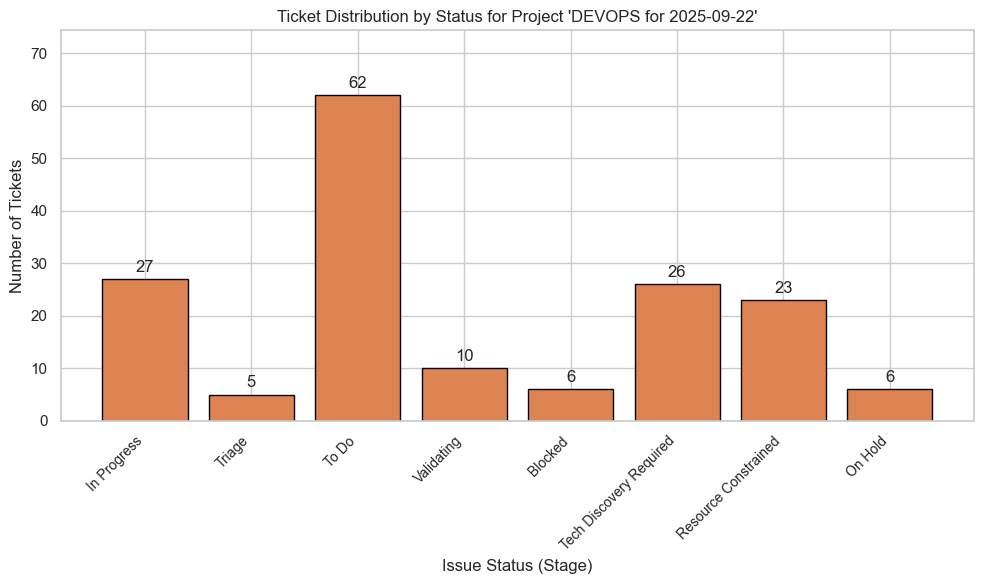

In [216]:
# --- Create Visualization ---
print("\nGenerating visualization...")
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size as needed

bars = ax.bar(statuses, counts, color='C1', edgecolor='black')

# Add counts above the bars
ax.bar_label(bars, padding=3)

ax.set_xlabel("Issue Status (Stage)")
ax.set_ylabel("Number of Tickets")
ax.set_title(f"Ticket Distribution by Status for Project '{PROJECT_KEY} for {date.today()}'")
ax.set_ylim(0, max(counts) * 1.2)  # Add some space above the highest bar
#ax.tick_params(axis='x', rotation=90, ha='right') # Rotate labels if they overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Display the Plot ---
print("Displaying plot. Close the plot window to exit the script.")
plt.show()


## --- Fetch Issues (Tickets) from the Project EIT ---

In [217]:
# --- Fetch Issues from the Project ---
PROJECT_KEY = "EIT"  # Replace with your project key
#PROJECT_KEY = "EIT"  # Replace with your project key

print(f"Fetching issues for project '{PROJECT_KEY}'...")
issues_in_project = []
jql_query = f'project = "{PROJECT_KEY}" ORDER BY created DESC'
status_counts = Counter()
# jira-python handles pagination automatically when iterating
try:
    # Search issues iteratively (handles pagination)
    # Increase maxResults if needed, but iteration is generally preferred
    #search_params = {'jql': jql_query, 'maxResults': False, 'fields': 'status'} # Fetch only status field
    search_params = {
        "jql": jql_query,
        "maxResults": 5000,
        "fields": "status,summary"
    }

    # Correct API endpoint
    url = f"{jira_server}/rest/api/3/search/jql"
    next_token = None
    status_counts = Counter()
    total_issues_processed = 0
    while True:
        if next_token:
            search_params["nextPageToken"] = next_token
        response = jira._session.get(url,params=search_params)

        issues_iterator = response.json()

        #print(f"Total issues found: {len(issues_iterator.get('issues', []))}")
        
        for issue in issues_iterator.get("issues", []):
            #print(issue["fields"]['status']['name'])
            status_name = issue["fields"]["status"]["name"]
            status_counts[status_name] += 1
            total_issues_processed += 1
            # Optional: Print progress
            if total_issues_processed % 2000 == 0:
                print(f"Processed {total_issues_processed} issues...")
                
        next_token = issues_iterator.get("nextPageToken")
        if not next_token:
            break
    
    print(f"Finished fetching. Found {total_issues_processed} issues in total.")
    
    if not status_counts:
        print(f"No issues found for project '{PROJECT_KEY}' or couldn't retrieve statuses.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    # Check if it's an authentication error
    if "401" in str(e):
        print("Hint: Check if your JIRA_EMAIL and API Token are correct and have permissions.")
    # Check if it's a project not found error
    elif "404" in str(e) or "project" in str(e).lower():
        print(f"Hint: Check if the project key '{PROJECT_KEY}' is correct.")
    exit()


# --- Prepare Data for Visualization ---
# Remove "Done" and "Will Not Do" statuses if they exist
status_counts.pop("Done", None)
status_counts.pop("Will Not Do", None)

statuses = list(status_counts.keys())
counts = list(status_counts.values())

print("\nTicket Counts per Stage:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")

print(statuses)

print("Script finished.")


Fetching issues for project 'EIT'...
Finished fetching. Found 523 issues in total.

Ticket Counts per Stage:
- In Progress: 10
- Triage: 7
- To Do: 14
- Backlog: 9
['In Progress', 'Triage', 'To Do', 'Backlog']
Script finished.


# --- Create Visualization ---


Generating visualization...
Displaying plot. Close the plot window to exit the script.


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/756032795.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability


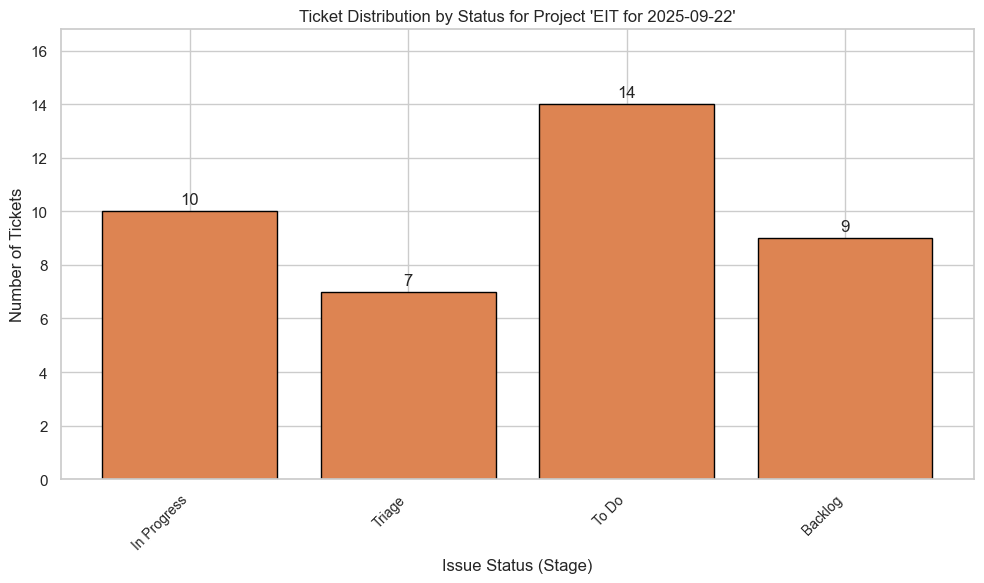

In [218]:
# --- Create Visualization ---
print("\nGenerating visualization...")
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size as needed

bars = ax.bar(statuses, counts, color='C1', edgecolor='black')

# Add counts above the bars
ax.bar_label(bars, padding=3)

ax.set_xlabel("Issue Status (Stage)")
ax.set_ylabel("Number of Tickets")
ax.set_title(f"Ticket Distribution by Status for Project '{PROJECT_KEY} for {date.today()}'")
ax.set_ylim(0, max(counts) * 1.2)  # Add some space above the highest bar
#ax.tick_params(axis='x', rotation=90, ha='right') # Rotate labels if they overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Display the Plot ---
print("Displaying plot. Close the plot window to exit the script.")
plt.show()

In [219]:
# --- Example JSON Response for an Issue ---
'''
{
  "expand": "renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations",
  "id": "10001",
  "self": "https://your-jira-instance.atlassian.net/rest/api/3/issue/10001",
  "key": "PROJECT-123",
  "fields": {
    "summary": "Example Issue: Fix the login button alignment",
    "description": {
        "type": "doc",
        "version": 1,
        "content": [
            {
                "type": "paragraph",
                "content": [
                    {
                        "type": "text",
                        "text": "The login button on the main page is slightly misaligned on mobile viewports."
                    }
                ]
            }
        ]
    },
    "issuetype": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/issuetype/10000",
      "id": "10000",
      "description": "A task that needs to be done.",
      "iconUrl": "https://your-jira-instance.atlassian.net/...",
      "name": "Task",
      "subtask": false,
      "avatarId": 10318
    },
    "project": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/project/10000",
      "id": "10000",
      "key": "PROJECT",
      "name": "Example Project",
      "projectTypeKey": "software",
      "simplified": false,
      "avatarUrls": {
        "48x48": "...",
        "24x24": "...",
        "16x16": "...",
        "32x32": "..."
      }
    },
    "resolution": null, // Example: null if the issue is unresolved
    "resolutiondate": null, // Example: null if the issue is unresolved
    "created": "2023-10-27T10:05:00.123+0000",
    "updated": "2023-10-27T11:15:30.456+0000",
    "priority": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/priority/3",
      "iconUrl": "https://your-jira-instance.atlassian.net/images/icons/priorities/medium.svg",
      "name": "Medium",
      "id": "3"
    },
    "status": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/status/10001",
      "description": "The issue is currently being worked on.",
      "iconUrl": "https://your-jira-instance.atlassian.net/...",
      "name": "In Progress",
      "id": "10001",
      "statusCategory": {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/statuscategory/4",
        "id": 4,
        "key": "indeterminate",
        "colorName": "yellow",
        "name": "In Progress"
      }
    },
    "labels": [
      "ui-bug",
      "mobile"
    ],
    "assignee": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "developer@example.com",
      "avatarUrls": { ... },
      "displayName": "Jane Developer",
      "active": true,
      "timeZone": "America/Los_Angeles"
    },
    "reporter": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "reporter@example.com",
      "avatarUrls": { ... },
      "displayName": "Bob Reporter",
      "active": true,
      "timeZone": "Europe/London"
    },
    "creator": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "reporter@example.com", // Often the same as reporter, but not always
      "avatarUrls": { ... },
      "displayName": "Bob Reporter",
      "active": true,
      "timeZone": "Europe/London"
    },
    "components": [
      {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/component/10000",
        "id": "10000",
        "name": "User Interface",
        "description": "Handles the frontend display"
      }
    ],
    "fixVersions": [
       {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/version/10001",
        "id": "10001",
        "description": "Release for Q4 features",
        "name": "Version 2.1",
        "archived": false,
        "released": false,
        "releaseDate": "2023-12-15"
      }
    ],
    "environment": "Production - Mobile Web (iOS Safari)",
    "duedate": "2023-11-10",
    "votes": {
      "self": "...",
      "votes": 5,
      "hasVoted": false
    },
    "watches": {
      "self": "...",
      "watchCount": 3,
      "isWatching": true
    },
    "workratio": -1, // Or a calculated value if time tracking is used
    "timespent": 7200, // Example: in seconds (2 hours)
    "timeoriginalestimate": 14400, // Example: in seconds (4 hours)
    "aggregatetimespent": 7200,
    "aggregatetimeoriginalestimate": 14400,
    "security": null, // Or an object if security level is set
    "versions": [], // Affected versions
    // --- Custom Fields ---
    // Custom fields vary greatly. They are identified by 'customfield_xxxxx'
    "customfield_10010": "Some text value", // Example: Text Field (single line)
    "customfield_10011": { // Example: Select List (single choice)
        "self": "...",
        "value": "Option B",
        "id": "10021"
    },
    "customfield_10012": [ // Example: Select List (multiple choices)
        { "self": "...", "value": "Alpha", "id": "10030" },
        { "self": "...", "value": "Gamma", "id": "10032" }
    ],
    "customfield_10013": 123.45, // Example: Number Field
    "customfield_10014": "2023-11-01", // Example: Date Picker
    "customfield_10015": "2023-10-27T14:30:00.000+0000", // Example: Date Time Picker
    "customfield_10016": { // Example: User Picker (single user)
        "self": "...",
        "accountId": "...",
        "displayName": "Alice QA",
        "active": true
        // ... other user details
    },
    "customfield_10017": null // Example: A custom field that hasn't been set
    // ... potentially many more custom fields ...
  }
}
# --- Example JSON Response for an Issue ---
# This is a simplified example. The actual response will contain more fields and nested structures.
'''

'\n{\n  "expand": "renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations",\n  "id": "10001",\n  "self": "https://your-jira-instance.atlassian.net/rest/api/3/issue/10001",\n  "key": "PROJECT-123",\n  "fields": {\n    "summary": "Example Issue: Fix the login button alignment",\n    "description": {\n        "type": "doc",\n        "version": 1,\n        "content": [\n            {\n                "type": "paragraph",\n                "content": [\n                    {\n                        "type": "text",\n                        "text": "The login button on the main page is slightly misaligned on mobile viewports."\n                    }\n                ]\n            }\n        ]\n    },\n    "issuetype": {\n      "self": "https://your-jira-instance.atlassian.net/rest/api/3/issuetype/10000",\n      "id": "10000",\n      "description": "A task that needs to be done.",\n      "iconUrl": "https://your-jira-instance.atlassian.net/...",\n      "name": "Tas

## --- Define JQL Query ---
### --- Fetch issues, including assignee, key, and summary fields ---

In [220]:
# --- Define JQL Query ---

CF_BUSINESS_LEAD    = "customfield_11751"
CF_PLANNING_RANK    = "customfield_11445"
CF_PORTFOLIO_RANK   = "customfield_11312"
CF_PARENT_LINK      = "customfield_10300"   # Legend link lives here
CF_EPIC_LINK        = "customfield_10009"   # Story  Epic
CF_EPIC_NAME        = "customfield_10008"   # Epic Name (text)
CF_REQUEST_TYPE     = "customfield_10977"
CF_TARGET_END       = "customfield_10947"
CF_TIME_IN_PROGRESS = "customfield_11261"


# Fetch issues, including assignee, key, and summary fields
PROJECT_KEY = "DEVOPS"  # Replace with your project key
PROJECT_KEY_2 = "EIT"  # Replace with your project key
PROJECT_KEY_3 = "CAR"  # Replace with your project key


fields_to_fetch = "assignee, summary, key, status, created, updated, issuetype, creator, project, duedate, priority, customfield_10947, customfield_11751,customfield_11445,customfield_11312,customfield_10300," \
"parentProject, parent" # Fields to fetch

# Start with a base JQL query
jql_clauses = []
if PROJECT_KEY:
    jql_clauses.append(f'project = "{PROJECT_KEY}" OR project = "{PROJECT_KEY_2}" OR project = "{PROJECT_KEY_3}"')  # Handle case sensitivity
    print(f"Fetching issues for project '{PROJECT_KEY}', {PROJECT_KEY_2}, {PROJECT_KEY_3}...")
else:
    # Warning: Fetching all issues without a project filter can be very slow
    # and return a huge number of results depending on your Jira instance size
    # and permissions. Consider adding other filters (e.g., status, updatedDate).
    print("Warning: Fetching issues across all accessible projects. This might take a while.")
    # Example: Add a filter for only assigned issues if searching all projects
    # jql_clauses.append("assignee is not EMPTY")

# Combine clauses and add ordering
jql_query = " AND ".join(jql_clauses) if jql_clauses else "" # Handle case with no clauses
jql_query += " ORDER BY assignee ASC, updated DESC"
jql_query = jql_query.strip() # Remove leading/trailing whitespace if needed

print(f"Using JQL: {jql_query if jql_query else 'Searching all issues (no specific JQL)'}")


# --- Fetch and Group Issues by Assignee ---
# Use defaultdict to easily group issues; value is a list of issue details
issues_by_assignee = defaultdict(list)

try:
    #search_params = {'jql': jql_query, 'maxResults': False, 'fields': fields_to_fetch}
    #issues_iterator = jira.search_issues(jql_str=search_params['jql'],
    #                                     maxResults=search_params['maxResults'],
    #                                     fields=search_params['fields'],
    #                                     expand=None,
    #                                     json_result=False) # Get Issue objects

    search_params = {
        "jql": jql_query,
        "maxResults": 5000,
        "fields": fields_to_fetch
    }

    # Correct API endpoint
    url = f"{jira_server}/rest/api/3/search/jql"
    next_token = None
    total_issues_processed = 0
    issues_iterator_all = []
    while True:
        if next_token:
            search_params["nextPageToken"] = next_token
        response = jira._session.get(url,params=search_params)

        issues_iterator = response.json()
        issues_iterator_all = issues_iterator_all + issues_iterator['issues']

        #print(f"Total issues found: {len(issues_iterator.get('issues', []))}")
        
        for issue in issues_iterator.get("issues", []):
            #print(issue["fields"]['status']['name'])
            #print(issue["fields"]['summary'])
            #print(issue["fields"]['assignee'])
            #print(issue["fields"]['assignee']['displayName'] if issue["fields"]['assignee'] else "Unassigned")
            assignee_name = issue["fields"]['assignee']['displayName'] if issue["fields"]['assignee'] else "Unassigned"
            # Store relevant issue info (e.g., key and summary)
            issue_info = {
                "key": issue['key'],
                "summary": issue['fields']['summary']
            }
            #status_name = issue["fields"]["status"]["name"]
            issues_by_assignee[assignee_name].append(issue_info)
            total_issues_processed += 1
            # Optional: Print progress
            if total_issues_processed % 2000 == 0:
                print(f"Processed {total_issues_processed} issues...")
                
        next_token = issues_iterator.get("nextPageToken")
        if not next_token:
            break

    print(f"Finished processing. Found {total_issues_processed} issues in total.")

    if not issues_by_assignee:
        print("No issues found matching the criteria.")
        exit()
    

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    if "401" in str(e):
        print("Hint: Check JIRA_EMAIL/API Token.")
    elif "400" in str(e) and "JQL" in str(e):
        print(f"Hint: Check if the JQL query is valid: {jql_query}")
    elif PROJECT_KEY and ("404" in str(e) or "project" in str(e).lower()):
        print(f"Hint: Check Project Key '{PROJECT_KEY}'.")
    exit()


print("\nScript finished.")




Fetching issues for project 'DEVOPS', EIT, CAR...
Using JQL: project = "DEVOPS" OR project = "EIT" OR project = "CAR" ORDER BY assignee ASC, updated DESC
Processed 2000 issues...
Processed 4000 issues...
Processed 6000 issues...
Processed 8000 issues...
Processed 10000 issues...
Finished processing. Found 11422 issues in total.

Script finished.


In [221]:
len(issues_iterator_all)

11422

In [222]:
len(issues_by_assignee)

198

In [223]:
#issues_iterator
'''
{'issues': [{'expand': 'renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations',
   'id': '61669',
   'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/issue/61669',
   'key': 'DEVOPS-755',
   'fields': {'summary': 'Create Testing Script for Operations to test Destination URL 200s',
    'issuetype': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/issuetype/3',
     'id': '3',
     'description': 'A task that needs to be done.',
     'iconUrl': 'https://entercomdigitalservices.atlassian.net/rest/api/2/universal_avatar/view/type/issuetype/avatar/10318?size=medium',
     'name': 'Task',
     'subtask': False,
     'avatarId': 10318,
     'hierarchyLevel': 0},
    'creator': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/user?accountId=5c58835a70c88b3ac427b886',
     'accountId': '5c58835a70c88b3ac427b886',
     'emailAddress': 'john.kulovitz@audacy.com',
     'avatarUrls': {'48x48': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5c58835a70c88b3ac427b886/d0c382b6-f8c2-4618-b2f4-35aa23781f9a/48',
      '24x24': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5c58835a70c88b3ac427b886/d0c382b6-f8c2-4618-b2f4-35aa23781f9a/24',
      '16x16': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5c58835a70c88b3ac427b886/d0c382b6-f8c2-4618-b2f4-35aa23781f9a/16',
      '32x32': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5c58835a70c88b3ac427b886/d0c382b6-f8c2-4618-b2f4-35aa23781f9a/32'},
     'displayName': 'Johnathan Kulovitz',
     'active': True,
     'timeZone': 'America/Denver',
     'accountType': 'atlassian'},
    'created': '2020-08-13T13:51:21.817-0600',
    'project': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/project/13769',
    
    
    
.....

  {'expand': 'renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations',
   'id': '43895',
   'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/issue/43895',
   'key': 'DEVOPS-35',
   'fields': {'summary': 'Destroy devRadioApi-env-test environment',
    'issuetype': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/issuetype/10200',
     'id': '10200',
     'description': 'Created by JIRA Software - do not edit or delete. Issue type for a user story.',
     'iconUrl': 'https://entercomdigitalservices.atlassian.net/rest/api/2/universal_avatar/view/type/issuetype/avatar/10315?size=medium',
     'name': 'Story',
     'subtask': False,
     'avatarId': 10315,
     'hierarchyLevel': 0},
    'creator': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/user?accountId=5b4f6754173f212c1f29e6fe',
     'accountId': '5b4f6754173f212c1f29e6fe',
     'emailAddress': 'jon.west@entercom.com',
     'avatarUrls': {'48x48': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5b4f6754173f212c1f29e6fe/c7364343-946d-4605-adb3-2bf26cc0149c/48',
      '24x24': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5b4f6754173f212c1f29e6fe/c7364343-946d-4605-adb3-2bf26cc0149c/24',
      '16x16': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5b4f6754173f212c1f29e6fe/c7364343-946d-4605-adb3-2bf26cc0149c/16',
      '32x32': 'https://avatar-management--avatars.us-west-2.prod.public.atl-paas.net/5b4f6754173f212c1f29e6fe/c7364343-946d-4605-adb3-2bf26cc0149c/32'},
     'displayName': 'Jon West',
     'active': True,
     'timeZone': 'America/Denver',
     'accountType': 'atlassian'},
    'created': '2019-02-13T11:55:09.920-0700',
    'project': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/project/13769',
     'id': '13769',
     'key': 'DEVOPS',
     'name': 'DevOps',
     'projectTypeKey': 'software',
     'simplified': False,
     'avatarUrls': {'48x48': 'https://entercomdigitalservices.atlassian.net/rest/api/3/universal_avatar/view/type/project/avatar/14206',
      '24x24': 'https://entercomdigitalservices.atlassian.net/rest/api/3/universal_avatar/view/type/project/avatar/14206?size=small',
      '16x16': 'https://entercomdigitalservices.atlassian.net/rest/api/3/universal_avatar/view/type/project/avatar/14206?size=xsmall',
      '32x32': 'https://entercomdigitalservices.atlassian.net/rest/api/3/universal_avatar/view/type/project/avatar/14206?size=medium'},
     'projectCategory': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/projectCategory/10102',
      'id': '10102',
      'description': '',
      'name': 'Active'}},
    'customfield_11751': None,
    'priority': None,
    'customfield_11312': None,
    'customfield_11445': None,
    'duedate': None,
    'customfield_10947': None,
    'assignee': None,
    'updated': '2019-02-13T13:08:14.260-0700',
    'status': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/status/10001',
     'description': '',
     'iconUrl': 'https://entercomdigitalservices.atlassian.net/',
     'name': 'Done',
     'id': '10001',
     'statusCategory': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/statuscategory/3',
      'id': 3,
      'key': 'done',
      'colorName': 'green',
      'name': 'Done'}}}},
'''

"\n{'issues': [{'expand': 'renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations',\n   'id': '61669',\n   'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/issue/61669',\n   'key': 'DEVOPS-755',\n   'fields': {'summary': 'Create Testing Script for Operations to test Destination URL 200s',\n    'issuetype': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/issuetype/3',\n     'id': '3',\n     'description': 'A task that needs to be done.',\n     'iconUrl': 'https://entercomdigitalservices.atlassian.net/rest/api/2/universal_avatar/view/type/issuetype/avatar/10318?size=medium',\n     'name': 'Task',\n     'subtask': False,\n     'avatarId': 10318,\n     'hierarchyLevel': 0},\n    'creator': {'self': 'https://entercomdigitalservices.atlassian.net/rest/api/3/user?accountId=5c58835a70c88b3ac427b886',\n     'accountId': '5c58835a70c88b3ac427b886',\n     'emailAddress': 'john.kulovitz@audacy.com',\n     'avatarUrls': {'48x48': 'http

## Building a Pandas Dataframe 

In [224]:
# --- Define JQL Query ---

CF_BUSINESS_LEAD    = "customfield_11751"
CF_PLANNING_RANK    = "customfield_11445"
CF_PORTFOLIO_RANK   = "customfield_11312"
CF_PARENT_LINK      = "customfield_10300"   # Legend link lives here
CF_EPIC_LINK        = "customfield_10009"   # Story  Epic
CF_EPIC_NAME        = "customfield_10008"   # Epic Name (text)
CF_REQUEST_TYPE     = "customfield_10977"
CF_TARGET_END       = "customfield_10947"
CF_TIME_IN_PROGRESS = "customfield_11261"


print(f"Start fetching: {PROJECT_KEY}, {PROJECT_KEY_2}, {PROJECT_KEY_3} issues...")
assignee_counts = Counter()
issue_creator_counts = Counter()
status_counts = Counter()
issue_type_counts = Counter()
topic_issues_counts = Counter()
topic_issues_counts_days = 0
processed_data = []
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
issues_iterator =issues_iterator_all

for issue in issues_iterator:
    fields = issue['fields']
    #print(f'created {fields["created"]}')
    if fields.get('creator'):
        creator_name = fields['creator']['displayName']
        #creator_email = fields['creator']['emailAddress']
    else:
        creator_name = 'Unknown'
        #creator_email = 'Unknown'

    if fields.get('assignee'):
        assignee_name = fields['assignee']['displayName']
        #assignee_email = fields['assignee']['emailAddress']
    else:
        assignee_name = 'Unassigned'
        #assignee_email = 'Unassigned'

    if fields.get('priority'):
        priority_name = fields['priority']['name']
        priority_id = fields['priority']['id']
    else:
        priority_name = 'No Priority'
        priority_id = 'No Priority'

    if fields.get('duedate'):
        due_date = fields['duedate']
    else:
        due_date = '2000-01-01T00:00:00.000+0000'  # Default date if not set
    try:
        if fields.get(CF_BUSINESS_LEAD):
            bussiness_lead = str(fields[CF_BUSINESS_LEAD]['displayName']).replace('.', ' ')
        else:
            bussiness_lead = 'Unknown'
    except Exception as e:
        bussiness_lead = 'Unknown'
    try:
        if fields.get(CF_PLANNING_RANK):
            planning_rank = fields[CF_PLANNING_RANK]
        else:
            planning_rank = 'Unknown'
    except Exception as e:
        planning_rank = 'Unknown'
    
    try:
        if fields.get(CF_PORTFOLIO_RANK):
            portfolio_rank = fields[CF_PORTFOLIO_RANK]
        else:
            portfolio_rank = pd.NaT  # Use NaT for missing dates
    except Exception as e:
        portfolio_rank = pd.NaT  # Use NaT for missing dates

    try:
        if fields.get(CF_PARENT_LINK):
            legend = fields[CF_PARENT_LINK]
        else:
            legend = pd.NA  # Use NaT for missing dates
    except Exception as e:
        legend = pd.NA  # Use NaT for missing dates

    try:
        if fields.get('parentProject'):
            parent_project = fields['parentProject']
        else:
            parent_project = pd.NA  # Use NaT for missing dates
    except Exception as e:
        parent_project = pd.NA  # Use NaT for missing dates

    try:
        if fields.get('parent'):
            parent = fields['parent']['key']
        else:
            parent = pd.NA  # Use NaT for missing dates
    except Exception as e:
        parent = pd.NA  # Use NaT for missing dates

    issue_data = {
        'key': issue['key'],
        'id': issue['id'],
        'summary': fields.get('summary', ''),
        'status': fields.get('status', {}).get('name', ''),
        'issuetype': fields.get('issuetype', {}).get('name', ''),
        'creator_name': creator_name,
        #'creator_email': creator_email,
        #'reporter_name': fields['reporter']['displayName'] if fields.get('reporter') else 'Unknown',
        #'reporter_email': fields['reporter']['emailAddress'] if fields.get('reporter') else 'Unknown',
        'assignee_name': assignee_name,
        #'assignee_email': assignee_email,
        'created': pd.to_datetime(fields.get('created', None), errors='coerce'),
        'updated': pd.to_datetime(fields.get('updated', None), errors='coerce'),
        'project_name': fields.get('project', {}).get('name', ''),
        'project_id': fields.get('project', {}).get('id', ''),
        'priority_name': priority_name,
        'priority_id': priority_id,
        'project_due_date' : pd.to_datetime(due_date, utc=True, errors='coerce').tz_convert('UTC-06:00'),
        'issue_url' : issue.get('permalink', lambda: None)(),
        'today' : pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00'),
        'days_old' : (pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(fields.get('created', None), errors='coerce')).days,
        'year_updated' : pd.to_datetime(fields.get('updated', None), errors='coerce').year,
        'month_updated' : pd.to_datetime(fields.get('updated', None), errors='coerce').month,
        'year_created' : pd.to_datetime(fields.get('created', None), errors='coerce').year,
        'month_created' : pd.to_datetime(fields.get('created', None), errors='coerce').month,
        'last_updated_days' : (pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(fields.get('updated', None), errors='coerce')).days,
        'project_due_date' : pd.to_datetime(due_date, utc=True, errors='coerce').tz_convert('UTC-06:00'),
        'project_due_date_days' : (pd.to_datetime(due_date, utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(fields.get('updated', None), errors='coerce')).days,
        'velocity' : (pd.to_datetime(fields.get('updated', None), errors='coerce') - pd.to_datetime(fields.get('created', None), errors='coerce')).days,
        'velocity_hours' : (pd.to_datetime(fields.get('updated', None), errors='coerce') - pd.to_datetime(fields.get('created', None), errors='coerce')).total_seconds() / 3600,
        'velocity_days' : (pd.to_datetime(fields.get('updated', None), errors='coerce') - pd.to_datetime(fields.get('created', None), errors='coerce')).days,
        'target_end_date' : pd.to_datetime(fields.get('customfield_10947', None), utc=True, errors='coerce'),
        'bussiness_lead' : bussiness_lead,
        'planning_rank' : planning_rank,
        'portfolio_rank' : portfolio_rank,
        'legend' : legend,
        'parent_project' : parent_project,
        'parent' : parent,
        #'target_end_days' : (pd.to_datetime(fields.get('customfield_10947', None), utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(fields.get('updated', None), errors='coerce')).days,

        # Add more fields as needed, including custom fields
        # 'customfield_xxxxx': fields.get('customfield_xxxxx')
    }
    processed_data.append(issue_data)

    # Use fields['assignee'] instead of issue['assignee']
    if fields.get('assignee'):
        assignee_counts[fields['assignee']['displayName']] += 1
    else:
        assignee_counts['Unassigned'] += 1

    if fields.get('issuetype'):
        issue_type_counts[fields['issuetype']['name']] += 1
    if fields.get('status'):
        status_counts[fields['status']['name']] += 1
    if fields.get('creator'):
        issue_creator_counts[fields['creator']['displayName']] += 1



df_issues = pd.DataFrame(processed_data)

# Calculate days until due date
df_issues.loc[(df_issues['last_updated_days'] < 0, 'last_updated_days')] = 0




print(f"Finished fetching. Found {total_issues_processed} issues in total.")
print("\nScript finished.")

Start fetching: DEVOPS, EIT, CAR issues...
Finished fetching. Found 11422 issues in total.

Script finished.


In [225]:
str(today.date())

'2025-09-22'

## Save the CSV File

In [226]:
df_issues.to_csv('jira_issues_total_'+str(today.date())+'.csv', index=False)

In [227]:
len(processed_data)

11422

### --- Getting Record 0 to validate it ---

In [228]:
processed_data[0]

{'key': 'CAR-235',
 'id': '63368',
 'summary': 'Add user "Blair Askey" to all frequency Sites as Webmaster',
 'status': 'Released Successfully to Production',
 'issuetype': 'Change and Release',
 'creator_name': 'Aaron Schultheis',
 'assignee_name': 'Aaron Schultheis',
 'created': Timestamp('2020-10-05 15:04:14.595000-0600', tz='UTC-06:00'),
 'updated': Timestamp('2020-11-30 10:58:39.586000-0700', tz='UTC-07:00'),
 'project_name': 'Release Management',
 'project_id': '13836',
 'priority_name': 'None',
 'priority_id': '10004',
 'project_due_date': Timestamp('1999-12-31 18:00:00-0600', tz='UTC-06:00'),
 'issue_url': None,
 'today': Timestamp('2025-09-22 02:35:22.524929-0600', tz='UTC-06:00'),
 'days_old': 1812,
 'year_updated': 2020,
 'month_updated': 11,
 'year_created': 2020,
 'month_created': 10,
 'last_updated_days': 1756,
 'project_due_date_days': -7640,
 'velocity': 55,
 'velocity_hours': 1340.9069419444445,
 'velocity_days': 55,
 'target_end_date': None,
 'bussiness_lead': 'Unknow

In [229]:
df_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11422 entries, 0 to 11421
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   key                    11422 non-null  object                   
 1   id                     11422 non-null  object                   
 2   summary                11422 non-null  object                   
 3   status                 11422 non-null  object                   
 4   issuetype              11422 non-null  object                   
 5   creator_name           11422 non-null  object                   
 6   assignee_name          11422 non-null  object                   
 7   created                11422 non-null  object                   
 8   updated                11422 non-null  object                   
 9   project_name           11422 non-null  object                   
 10  project_id             11422 non-null  object 

In [230]:
df_issues.iloc[0]

key                                                                CAR-235
id                                                                   63368
summary                  Add user "Blair Askey" to all frequency Sites ...
status                                 Released Successfully to Production
issuetype                                               Change and Release
creator_name                                              Aaron Schultheis
assignee_name                                             Aaron Schultheis
created                                   2020-10-05 15:04:14.595000-06:00
updated                                   2020-11-30 10:58:39.586000-07:00
project_name                                            Release Management
project_id                                                           13836
priority_name                                                         None
priority_id                                                          10004
project_due_date         

In [231]:
# df_issues['status'].unique()

In [232]:
# df_issues['parent'].unique()

In [233]:
df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] <= 300)]['days_old'].describe()

count     37.000000
mean      51.270270
std       51.808219
min        2.000000
25%       19.000000
50%       33.000000
75%       61.000000
max      222.000000
Name: days_old, dtype: float64

## Tickets that do NOT have a Created Date

In [234]:
#df_issues[(df_issues['days_old'] == df_issues['days_old'].max()) & (df_issues['status'] == 'In Progress')][['key','summary','status','assignee_name','created','days_old','creator_name','updated']]#

In [235]:
#df_issues[df_issues['project_name'] == 'DevOps']['assignee_name'].unique()

# -- Cleanig the Data to get ONLY CAR Tickets for the DevOps Team --

In [236]:
DEVOPS_TEAM = ['Adam Shero', 'Angel Cancio', 'Bolanle','Cullen Philippson','David Caballero','David Caballero Miranda','Juan Reyes','Mike Admire','Randall Puterbaugh','satish kumar marana','Simon Davison','Terry Dougal','Tom Terry']

In [237]:
df_issues_car = df_issues[((df_issues['assignee_name'].isin(DEVOPS_TEAM)) & (df_issues['project_name'] == 'Release Management')) | (df_issues['project_name'] == 'DevOps') | (df_issues['project_name'] == 'Enterprise IT')]

In [238]:
#len(df_issues_car)

In [239]:
#df_issues_car[df_issues_car['project_name'] == 'Release Management']['assignee_name'].unique()

In [240]:
df_issues = df_issues_car.copy()

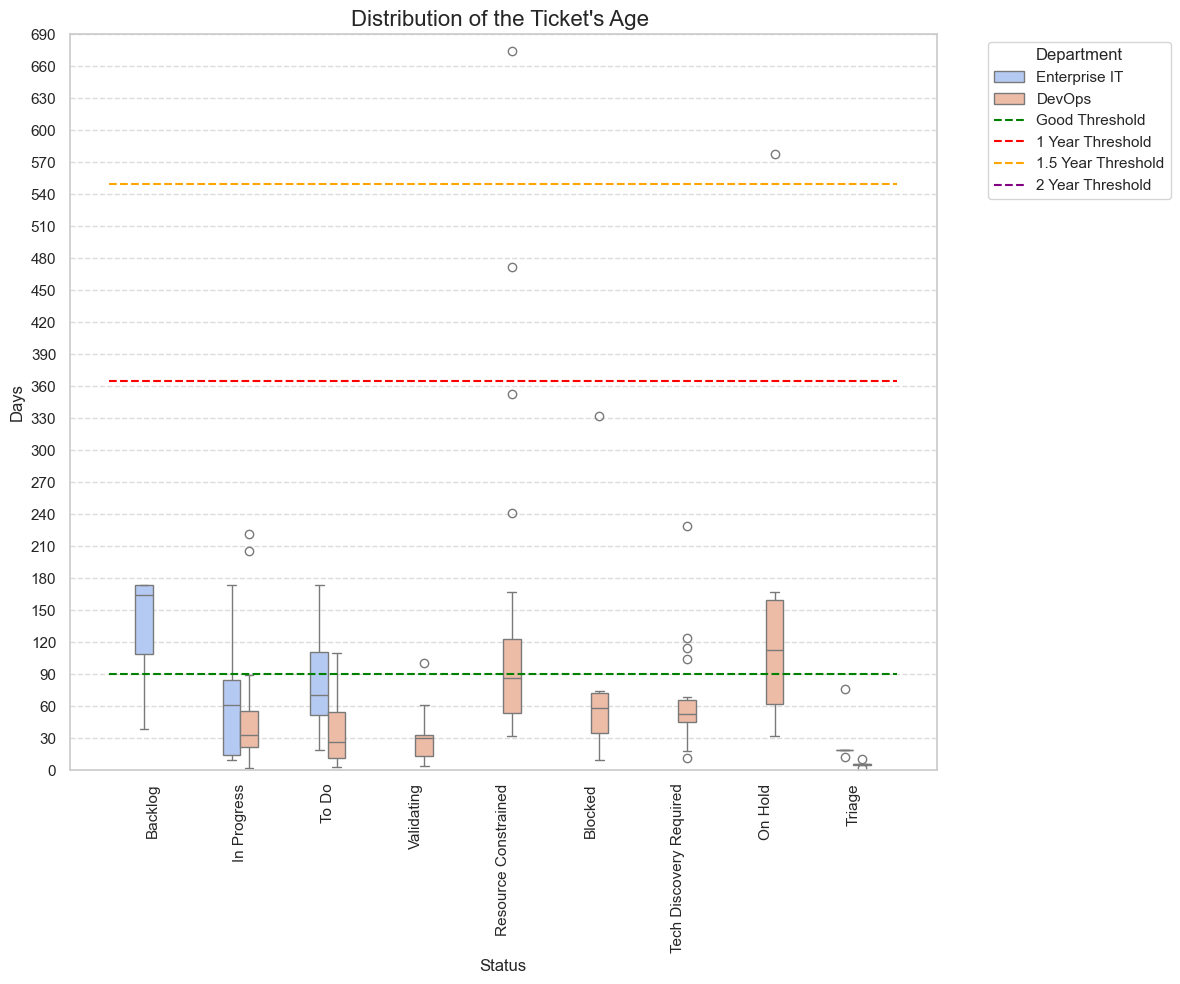

In [241]:
# --- Create the Box Plot ---
# Set a nice theme
sns.set_theme(style="whitegrid")

# Create the figure and axes
# Adjust figsize for better aspect ratio for a single box plot
plt.figure(figsize=(12, 10))

# Generate the box plot
# We use the filtered DataFrame.
# y='last_updated_days' specifies the data for the plot.
# x='status' will use the 'status' column for the x-axis category label.
# Since we filtered for 'In Progress', it will show a single box for this category.
in_progress_issues_df = df_issues[df_issues['status'] != 'Done']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['project_name'] != 'Release Management']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Will Not Do']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Blocked']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Blocked For Development']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Resource Constrained']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Released Successfully to Production'] # CAR Tickets = Done
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != '❌ Rolled Back']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['days_old'] <= 365]
ax = sns.boxplot(
    data=in_progress_issues_df,
    y='days_old',  # This will plot the 'days_old' values
    x='status',  # This will label the x-axis category as 'In Progress'
    palette="coolwarm", # Optional: adds a bit of color
    width=0.4, # Optional: makes the box a bit narrower,
    hue='project_name',  # Optional: if you want to differentiate by project
)

# --- 4. Customize the Plot ---
plt.title("Distribution of the Ticket's Age ", fontsize=16)
plt.ylabel("Days", fontsize=12)
plt.xlabel("Status", fontsize=12) # Label for the x-axis
plt.xticks(rotation=90, ha='center') # Rotate x-axis labels for better readability

plt.ylim(0, 365)  # Set y-axis limit to 365 days
plt.yticks(np.arange(0, in_progress_issues_df['days_old'].max()+30, 30))  # Set y-ticks to every 30 days
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(rotation=0, ha='center')
plt.hlines(y=90, xmin=-0.5, xmax=8.5, color='green', linestyle='--', label='Good Threshold')
plt.hlines(y=365, xmin=-0.5, xmax=8.5, color='red', linestyle='--', label='1 Year Threshold')
plt.hlines(y=550, xmin=-0.5, xmax=8.5, color='orange', linestyle='--', label='1.5 Year Threshold')
plt.hlines(y=730, xmin=-0.5, xmax=8.5, color='purple', linestyle='--', label='2 Year Threshold')

#plt.yticks(np.arange(0, 650, 20)) # Set y-ticks to increase by 20 for better readability
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside the plot

# You can adjust y-axis limits if needed, e.g., to focus on a specific range
# ax.set_ylim(0, 20) # Example: if you want to cap the y-axis

# Ensure everything fits without overlapping
plt.tight_layout()

# --- 5. Display the Plot ---
plt.show()

In [242]:
df_issues[df_issues['status'] == 'In Progress']['last_updated_days'].describe()

count    37.000000
mean     14.270270
std      16.245766
min       0.000000
25%       4.000000
50%      10.000000
75%      19.000000
max      88.000000
Name: last_updated_days, dtype: float64

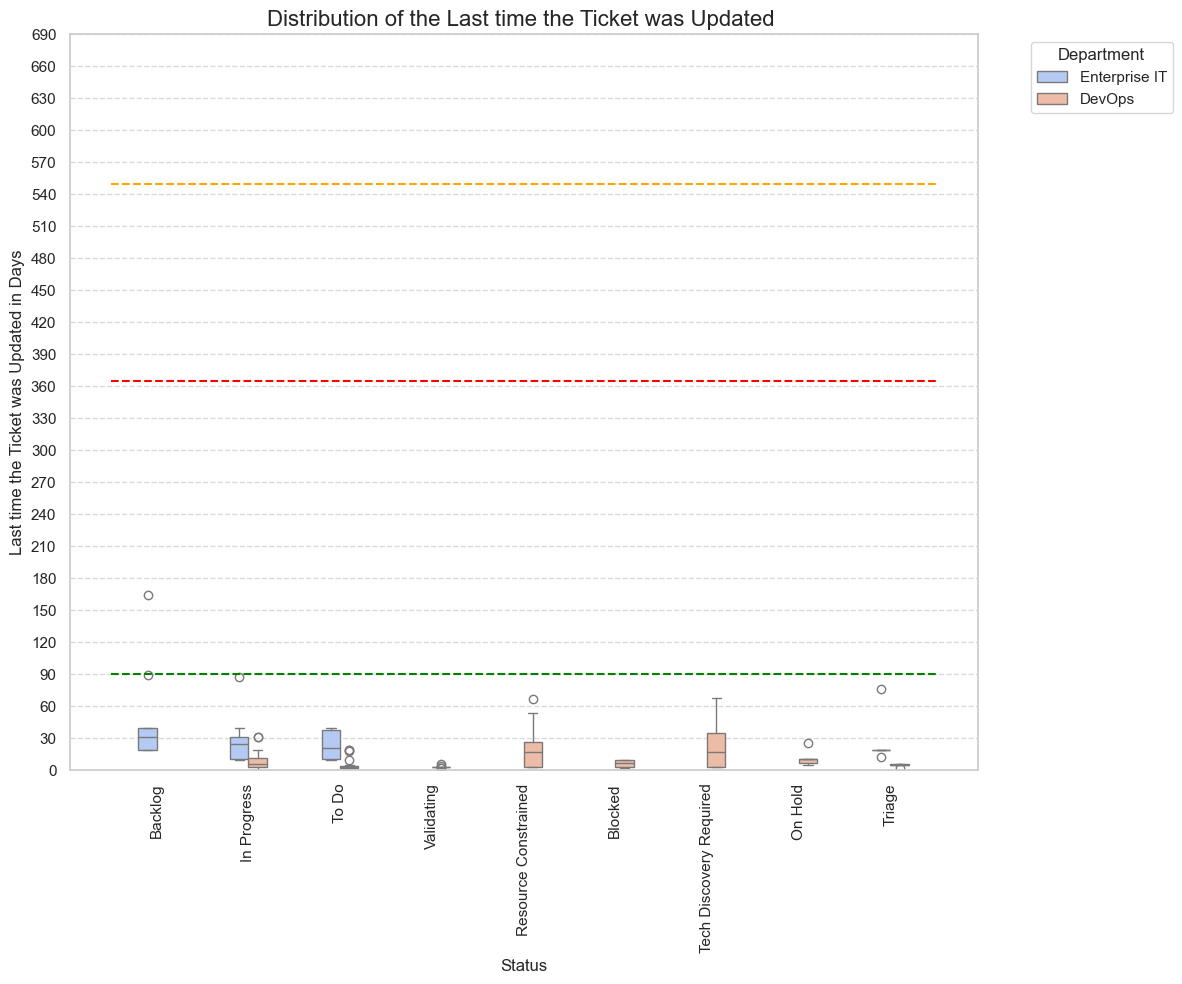

In [243]:
# --- Create the Box Plot ---
# Set a nice theme
sns.set_theme(style="whitegrid")

# Create the figure and axes
# Adjust figsize for better aspect ratio for a single box plot
plt.figure(figsize=(12, 10))

# Generate the box plot
# We use the filtered DataFrame.
# y='last_updated_days' specifies the data for the plot.
# x='status' will use the 'status' column for the x-axis category label.
# Since we filtered for 'In Progress', it will show a single box for this category.
in_progress_issues_df = df_issues[df_issues['status'] != 'Done']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['project_name'] != 'Release Management']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Will Not Do']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Blocked']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Blocked For Development']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Resource Constrained']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Released Successfully to Production'] # CAR Tickets = Done
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != '❌ Rolled Back']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['days_old'] <= 365]
ax = sns.boxplot(
    data=in_progress_issues_df,
    y='last_updated_days',
    x='status',  # This will label the x-axis category as 'In Progress'
    palette="coolwarm", # Optional: adds a bit of color
    width=0.4, # Optional: makes the box a bit narrower
    hue='project_name',  # Optional: if you want to differentiate by project
)

# --- 4. Customize the Plot ---
plt.title("Distribution of the Last time the Ticket was Updated ", fontsize=16)
plt.ylabel("Last time the Ticket was Updated in Days", fontsize=12)
plt.xlabel("Status", fontsize=12) # Label for the x-axis
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.yticks(np.arange(0, 130, 10)) # Set y-ticks to increase by 10 for better readability
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside the plot

plt.ylim(0, 365)  # Set y-axis limit to 365 days
plt.yticks(np.arange(0, in_progress_issues_df['days_old'].max()+30, 30))  # Set y-ticks to every 30 days
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(rotation=0, ha='center')
plt.hlines(y=90, xmin=-0.5, xmax=8.5, color='green', linestyle='--', label='Good Threshold')
plt.hlines(y=365, xmin=-0.5, xmax=8.5, color='red', linestyle='--', label='1 Year Threshold')
plt.hlines(y=550, xmin=-0.5, xmax=8.5, color='orange', linestyle='--', label='1.5 Year Threshold')
plt.hlines(y=730, xmin=-0.5, xmax=8.5, color='purple', linestyle='--', label='2 Year Threshold')

# You can adjust y-axis limits if needed, e.g., to focus on a specific range
# ax.set_ylim(0, 20) # Example: if you want to cap the y-axis

# Ensure everything fits without overlapping
plt.tight_layout()

# --- 5. Display the Plot ---
plt.show()

In [244]:
df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')]['status'].value_counts()

status
Released Successfully to Production    215
To Do                                   76
In Progress                             37
Tech Discovery Required                 26
Resource Constrained                    23
Triage                                  12
Validating                              10
Backlog                                  9
Blocked                                  6
On Hold                                  6
❌ Rolled Back                            4
Prepare Release                          1
Name: count, dtype: int64

In [245]:
#status_list = ['Tech Discovery Required']
#df_issues[df_issues['status'].isin(status_list)]

Generating countplot for Issue Status...


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/2785468643.py:8: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout() # Adjust layout to prevent labels overlapping
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


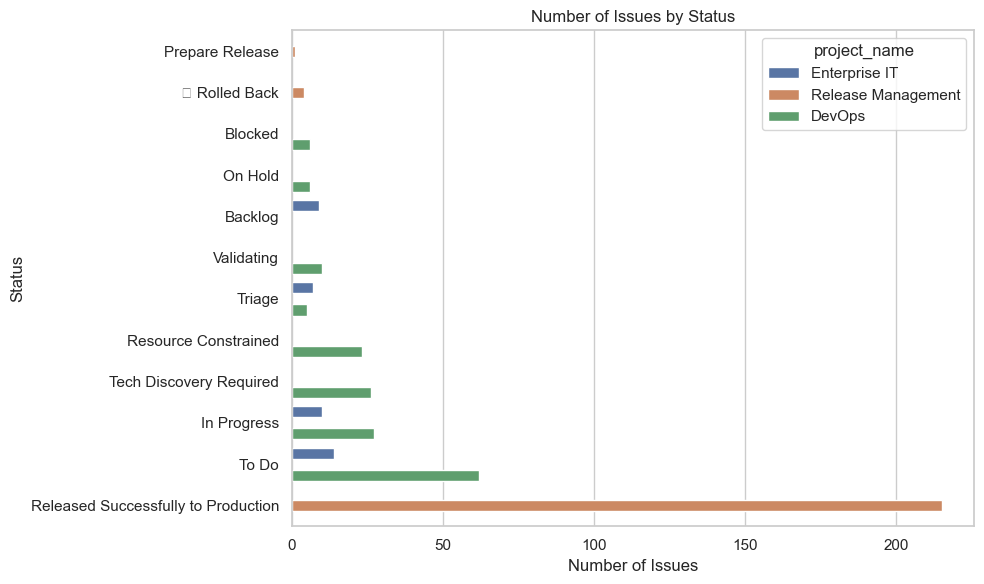

In [246]:
print("Generating countplot for Issue Status...")
plt.figure(figsize=(10, 6)) # Adjust figure size for readability
# Use 'y' axis for categories if names are long or many
sns.countplot(hue='project_name',data=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')], y='status', order=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')]['status'].value_counts(ascending=True).index)
plt.title('Number of Issues by Status')
plt.xlabel('Number of Issues')
plt.ylabel('Status')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Generating countplot for Issue Type...


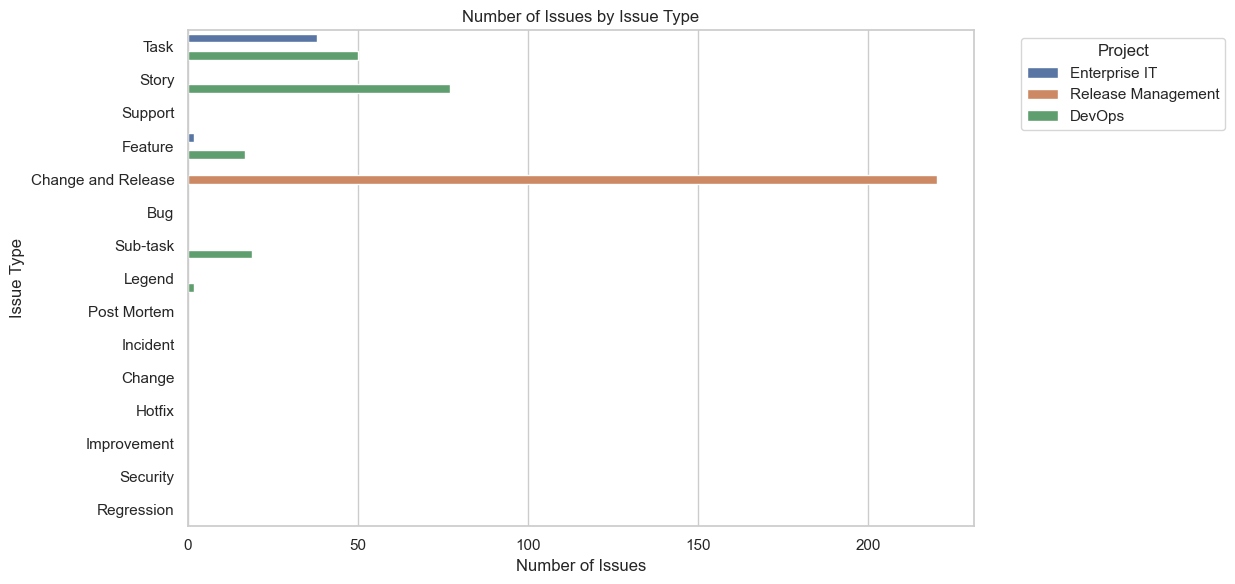

In [247]:
# Assuming df is your DataFrame and imports are done

print("Generating countplot for Issue Type...")
plt.figure(figsize=(10, 6))
sns.countplot(hue='project_name',data=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')], y='issuetype', order=df_issues['issuetype'].value_counts().sort_values(ascending=False).index)
plt.title('Number of Issues by Issue Type')
plt.xlabel('Number of Issues')
plt.ylabel('Issue Type')
plt.tight_layout()
plt.legend(title='Project', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.show()


Generating countplot for Status, colored by Issue Type...


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/45446298.py:11: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


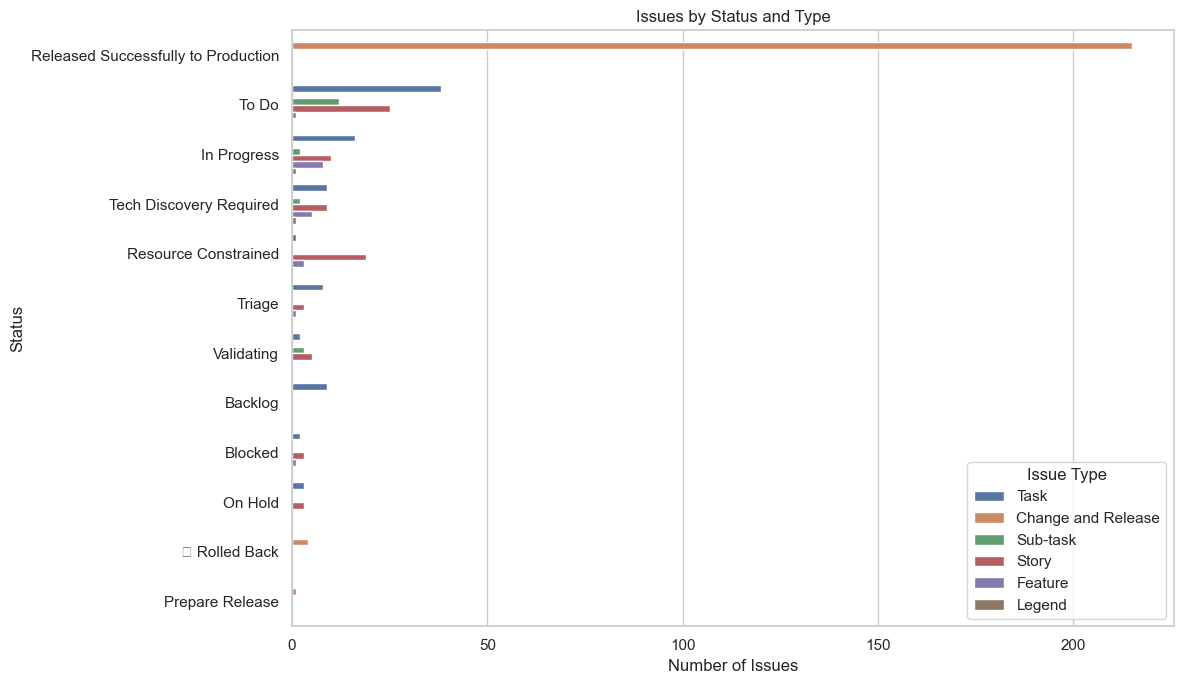

In [248]:
# Assuming df is your DataFrame and imports are done

print("Generating countplot for Status, colored by Issue Type...")
plt.figure(figsize=(12, 7))
# Using 'hue' adds the second category breakdown
sns.countplot(data=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')], y='status', hue='issuetype', order=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')]['status'].value_counts().index)
plt.title('Issues by Status and Type')
plt.xlabel('Number of Issues')
plt.ylabel('Status')
plt.legend(title='Issue Type') # Add a legend
plt.tight_layout()
plt.show()


In [249]:
#df_issues.status.value_counts()

In [250]:
#df_issues.info()

# --- PDF Function / Template for the Reports ---

In [251]:
#import datetime
#from fpdf import FPDF # Using fpdf2 is recommended for more features (pip install fpdf2)
#                     # If using original fpdf (pip install fpdf), some advanced multi_cell args might not be available
#                     # but the core logic for table drawing will be similar.
#import pandas as pd # Assuming top_10_rows is a pandas DataFrame

# --- Configuration ---
REPORT_TITLE = "Jira Issues"
FILENAME_OUTPUT = "jira_in_progress.pdf"
LINE_HEIGHT_MULTIPLIER = 1.0 # Multiplier for cell height based on font size
FONT_FAMILY = "Arial"
FONT_SIZE_TITLE = 16
FONT_SIZE_DATE = 10
FONT_SIZE_HEADER = 6
FONT_SIZE_CELL = 5
FONT_SIZE_CELL_LARGE = 5

# Define column headers for the PDF table
PDF_TABLE_HEADERS = [
    'Ticket', 'Status', 'Priority', 'Business Lead', 'Assignee',
    'Target End', 'Last Updated', 'Days Old', 'Days Left', 'Summary'
]

# Define the corresponding DataFrame column keys in the order they should appear
# Ensure these keys exist in your top_10_rows DataFrame
DATAFRAME_COLUMN_KEYS = [
    'key', 'status', 'priority_name', 'bussiness_lead', 'assignee_name',
    'target_end_date', 'updated', 'days_old', 'days_left', 'summary'
]


class PDFReport(FPDF):
    def __init__(self, REPORT_TITLE, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.report_title = REPORT_TITLE

    def header(self):
        # Set font for the report title
        self.set_font(FONT_FAMILY, 'B', FONT_SIZE_TITLE)
        title_w = self.get_string_width(self.report_title) + 6
        self.set_x((self.w - title_w) / 2) # Center title
        self.cell(title_w, 10, self.report_title, 0, 1, 'C') # ln=1 for new line

        # Add generation date
        self.set_font(FONT_FAMILY, '', FONT_SIZE_DATE)
        date_str = f"Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"
        date_w = self.get_string_width(date_str) + 6
        self.set_x((self.w - date_w) / 2) # Center date
        self.cell(date_w, 10, date_str, 0, 1, 'C')
        self.ln(5) # Add a little space before table

    def footer(self):
        self.set_y(-15) # Position 1.5 cm from bottom
        self.set_font(FONT_FAMILY, 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}/{{nb}}', 0, 0, 'C')

    def create_table(self, table_data_df, headers, column_keys, col_widths):
        if table_data_df.empty:
            self.set_font(FONT_FAMILY, '', FONT_SIZE_CELL)
            self.cell(0, 10, "No data available for the report.", 0, 1, 'C')
            return

        # Calculate effective line height for cells
        # FPDF's multi_cell takes a line_height argument.
        # We use font_size as a base for this.
        effective_line_height = self.font_size * LINE_HEIGHT_MULTIPLIER

        # Table Header
        self.set_font(FONT_FAMILY, 'B', FONT_SIZE_HEADER)
        self.set_fill_color(200, 220, 255) # Light blue background for header
        self.set_text_color(0) # Black text
        self.set_draw_color(128) # Grey border
        self.set_line_width(0.3)

        for i, header_text in enumerate(headers):
            self.cell(col_widths[i], effective_line_height, header_text, border=1, ln=0, align='C', fill=True)
        self.ln(effective_line_height)

        # Table Data
        self.set_font(FONT_FAMILY, '', FONT_SIZE_CELL)
        self.set_fill_color(245, 245, 245) # Light grey for alternating rows
        fill = False

        for index, row in table_data_df.iterrows():
            # Determine the maximum height needed for this row
            # This involves checking how many lines each cell's content will take
            # For simplicity in this example, we'll use a robust method:
            # draw each cell and track the Y position.
            # print(f"Processing row {index + 1}/{len(table_data_df)}...") # Debugging output
            # print(f"Row data: {row.to_dict()}") # Print row data for debugging
            # print(row['days_left'])

            current_y_start_of_row = self.get_y()
            current_x_position = self.l_margin # Start at left margin
            max_y_after_this_row = current_y_start_of_row # Track the lowest point any cell in this row reaches

            for i, key in enumerate(column_keys):
                cell_value = str(row.get(key, '')) # Get value, default to empty string if key missing
                
                self.set_xy(current_x_position, current_y_start_of_row) # Key: Reset Y for each cell in the row

                # Draw the multi_cell
                # The `effective_line_height` here is the height of *each line* within the multi_cell
                # Draw the multi_cell with manual tracking for broader compatibility
                self.set_xy(current_x_position, current_y_start_of_row)
                # import numpy as np
                if ((row['days_left'] < 0) or (pd.isna(row['days_left'])) and (row['status'] == 'In Progress')):
                    # If days_left is negative or NaN, highlight the cell
                    cell_value_overdue = f"{cell_value} (Overdue)"
                    self.set_font(FONT_FAMILY, 'B', FONT_SIZE_CELL_LARGE)
                    self.set_fill_color(240, 240, 255) # Light grey for alternating rows
                    self.multi_cell(col_widths[i], self.font_size * 1.2 , cell_value, # Use font_size for line height in multi_cell
                                    border=1, align='L', fill=True)
                    self.set_font(FONT_FAMILY, '', FONT_SIZE_CELL)
                    self.set_fill_color(245, 245, 245) # Light grey for alternating rows
                else:
                    self.multi_cell(col_widths[i], self.font_size * 1.2 , cell_value, # Use font_size for line height in multi_cell
                                    border=1, align='L', fill=fill)
                
                if self.get_y() > max_y_after_this_row:
                    max_y_after_this_row = self.get_y()
                
                current_x_position += col_widths[i]


            # After all cells in the row are drawn, set Y to below the tallest cell
            self.set_y(max_y_after_this_row)
            fill = not fill # Alternate fill color for next row
        
        # Add a final line break if there was data, to ensure footer doesn't overlap
        if not table_data_df.empty:
            self.ln(max(effective_line_height / 2, 2)) # Add a small space after the table


def generate_enhanced_report(top_10_rows_df, REPORT_TITLE = "Jira Issues In Progress", FILENAME_OUTPUT="jira_in_progress.pdf"):
    """
    Generates an enhanced PDF report from the DataFrame.
    Args:
        top_10_rows_df (pd.DataFrame): DataFrame containing the data.
                                       Expected to have columns specified in DATAFRAME_COLUMN_KEYS.
    """
  
    pdf = PDFReport(REPORT_TITLE, format='Letter', unit='mm') # Letter: 215.9 x 279.4 mm
    pdf.alias_nb_pages() # Enable page numbering alias '{nb}'
    pdf.add_page()

    # Define column widths (total should be around self.w - margins)
    # Effective page width for content: pdf.w - pdf.l_margin - pdf.r_margin
    # Default margins are 10mm. So, 215.9 - 20 = 195.9 mm for Letter.
    # Adjust these widths based on your content and preferences.
    # Sum of these should ideally be <= (pdf.w - pdf.l_margin - pdf.r_margin)
    page_content_width = pdf.w - pdf.l_margin - pdf.r_margin
    
    # Proportional widths or fixed widths
    col_widths = [
        page_content_width * 0.08, # Ticket
        page_content_width * 0.06, # Status 0.08
        page_content_width * 0.06, # Priority 0.08
        page_content_width * 0.12, # Business Lead
        page_content_width * 0.12, # Assignee
        page_content_width * 0.10, # Target End
        page_content_width * 0.10, # Last Updated
        page_content_width * 0.07, # Days Old
        page_content_width * 0.07, # Days Left
        page_content_width * 0.22  # Summary (largest) 0.18
    ]
    # Ensure sum of col_widths does not exceed page_content_width
    # This can be done by normalizing or adjusting the last column
    current_total_width = sum(col_widths)
    if current_total_width > page_content_width:
        # Simple adjustment: shrink the last column if oversized
        # A more sophisticated approach might scale all columns proportionally
        diff = current_total_width - page_content_width
        col_widths[-1] -= diff
    elif current_total_width < page_content_width:
        # Optionally, expand the last column to fill width
        diff = page_content_width - current_total_width
        col_widths[-1] += diff


    # Ensure the DataFrame has the necessary columns before passing
    try:
        data_for_table = top_10_rows_df[DATAFRAME_COLUMN_KEYS]
    except KeyError as e:
        print(f"Error: DataFrame is missing one or more required columns: {e}")
        print(f"Expected columns: {DATAFRAME_COLUMN_KEYS}")
        print(f"Available columns: {top_10_rows_df.columns.tolist()}")
        # Optionally, create an empty PDF with an error message or raise exception
        pdf.set_font(FONT_FAMILY, 'B', 12)
        pdf.multi_cell(0,10, f"Report generation failed: Missing column(s) - {e}. Check console.", 1, "C")
        pdf.output(FILENAME_OUTPUT, 'F')
        return

    #print(data_for_table)
    
    pdf.create_table(data_for_table, PDF_TABLE_HEADERS, DATAFRAME_COLUMN_KEYS, col_widths)
    
    try:
        pdf.output(FILENAME_OUTPUT, 'F') # 'F' to save to local file
        print(f"Report '{FILENAME_OUTPUT}' generated successfully.")
    except Exception as e:
        print(f"Error saving PDF: {e}")

## --- Top 25 Oldes Tickets ---

## Generate the Report

In [252]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
status = df_issues['status'].unique()
status = [s for s in status if s not in ['Backlog','Done', 'Plan Release', 'Prepare Release','Will Not Do', 'Blocked For Development', 'Resource Constrained', 'Released Successfully to Production', '❌ Rolled Back']]
status
df1 = df_issues[df_issues['status'].isin(status)].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['days_old'].sort_values(ascending=False).head(25)
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','status','project_name','priority_id','target_end_date','days_old']].sort_values(by=['project_name','status','bussiness_lead','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices].sort_values(by=['days_old'], ascending=False).head(25).copy()  # Select rows using the indices
top_10_rows.sort_values(by=['bussiness_lead','status'], ascending=False, inplace=True)  # Sort by days_old descending
# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
#print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
#               headers=['Ticket', 'Status', 'Priority','Business Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','creator_name','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Business Lead','Creator Name','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))




All 25 Tickets as: 2025-09-22 at 8:37 CST
+-------------+-------------------------+------------+------------------+--------------------------+--------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------------+
| Ticket      | Status                  | Priority   | Business Lead    | Creator Name             | Assignee Name      | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                     |
|-------------+-------------------------+------------+------------------+--------------------------+--------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------------|
| DEVOPS-7856 | Validating              | High       | sabrina szymczak | Kerri Walker             | Adam Shero         | 2025-09-19        | 2025-09-17     |        

In [253]:
for x in range(len(top_10_rows)):
    print(f"Creator: {top_10_rows['creator_name'].iloc[x]}")
    print(f"Summary: {top_10_rows.iloc[x]['summary'] }")
    print(f"https://entercomdigitalservices.atlassian.net/browse/{top_10_rows['key'].iloc[x]}")
    print("")

Creator: Kerri Walker
Summary: [DEVOPS] Deploy lambda function as a viewer request handler on CloudFront
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7856

Creator: Jeff Slutz
Summary: Reduce castfire DB master node from db.m5.2xlarge to db.r8g.xlarge
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7594

Creator: Jonathan Duck
Summary: [Bifrost] Create Cache Generator Cron [Prod]
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7862

Creator: Cullen Philippson
Summary: AWS Maintenance Elastic Beanstalk in Legacy AWS accounts
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7707

Creator: Jonathan Duck
Summary: [Nonprod] Amperwave: Deploy "Boop" EKS Service
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-6507

Creator: Amanda Hankel
Summary: PE/PodSquad work to Deprecate SuperHiFi & I Like Music
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7901

Creator: stephen.smith
Summary: Create New OpenSearch Domain in Non

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/1771541277.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=top_10_rows[df_issues['status'].isin(status)],


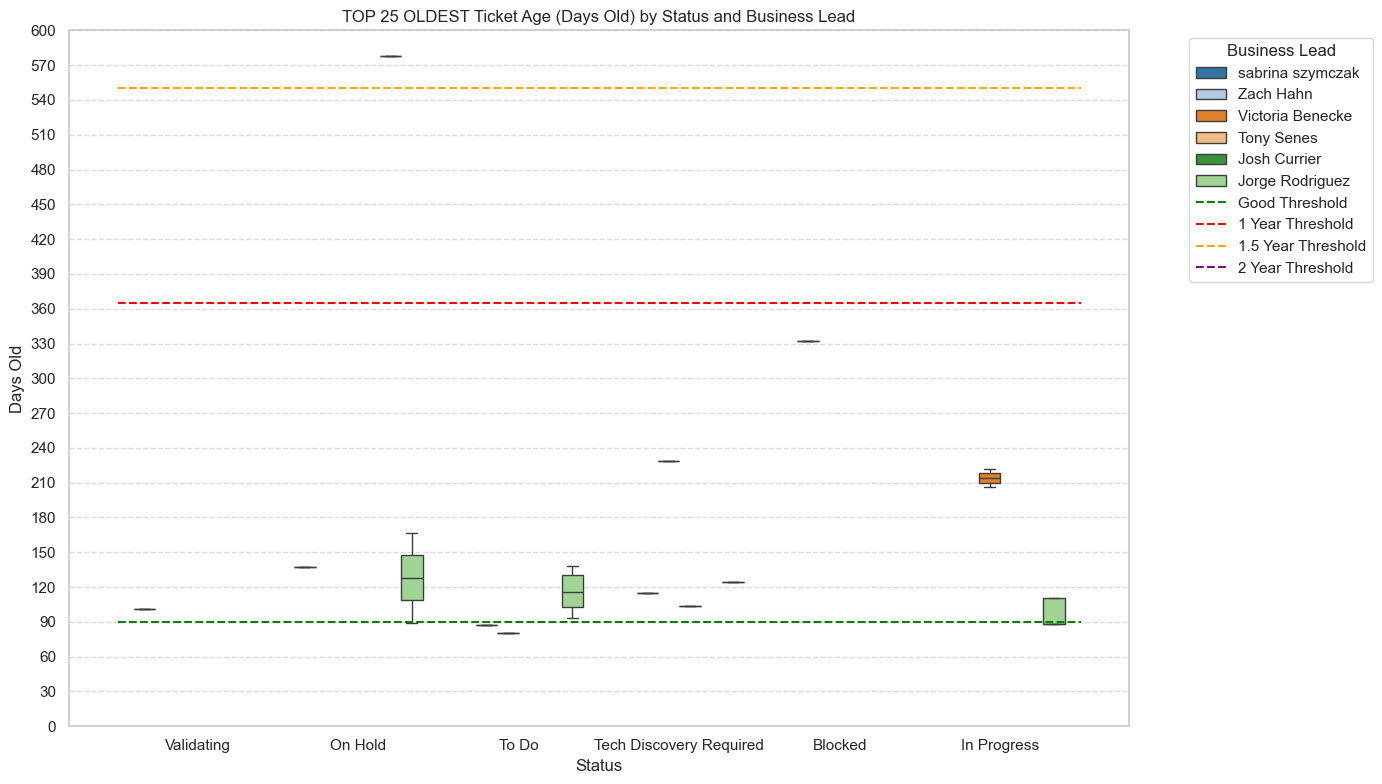

In [254]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=top_10_rows[df_issues['status'].isin(status)],
    x='status',
    y='days_old',
    hue='bussiness_lead',
    palette='tab20',
    showfliers=False
)
plt.title("TOP 25 OLDEST Ticket Age (Days Old) by Status and Business Lead")
plt.xlabel("Status")
plt.ylabel("Days Old")
plt.ylim(0, 365)  # Set y-axis limit to 365 days
plt.yticks(np.arange(0, top_10_rows['days_old'].max()+30, 30))  # Set y-ticks to every 30 days
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')
plt.hlines(y=90, xmin=-0.5, xmax=5.5, color='green', linestyle='--', label='Good Threshold')
plt.hlines(y=365, xmin=-0.5, xmax=5.5, color='red', linestyle='--', label='1 Year Threshold')
plt.hlines(y=550, xmin=-0.5, xmax=5.5, color='orange', linestyle='--', label='1.5 Year Threshold')
plt.hlines(y=730, xmin=-0.5, xmax=5.5, color='purple', linestyle='--', label='2 Year Threshold')
plt.legend(title='Business Lead', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## --- Tickets in Progress Status ---

## Generate the Report

In [255]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'In Progress'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['project_name','bussiness_lead','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
#print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
#               headers=['Ticket', 'Status', 'Priority','Business Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','creator_name','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Business Lead','Creator Name','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))

# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_progress.csv'
#top_10_rows.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
#print("Generating PDF report...")
#generate_enhanced_report(top_10_rows,"Jira Issues In Progress","jira_in_progress.pdf")




All 37 Tickets as: 2025-09-22 at 8:37 CST
+-------------+-------------+------------+------------------+--------------------------+--------------------+-------------------+----------------+------------+-------------+-------------------------------------------------------------------------------------------------------+
| Ticket      | Status      | Priority   | Business Lead    | Creator Name             | Assignee Name      | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                               |
|-------------+-------------+------------+------------------+--------------------------+--------------------+-------------------+----------------+------------+-------------+-------------------------------------------------------------------------------------------------------|
| DEVOPS-8247 | In Progress | High       | Chris Ulmer      | Mrinal Kaustuv           | Bolanle            | 2025-09-23    

In [256]:
print("="*60)
print("Tickets In Progress with no target end date or negative days left:")
print("="*60)
for x in range(len(top_10_rows)):
    if top_10_rows.iloc[x]['days_left'] < 0:
        print(top_10_rows.iloc[x]['creator_name']+": "+str(top_10_rows.iloc[x]['days_left'])+" days left")
        print(f"Summary: {top_10_rows.iloc[x]['summary'] }")
        print(f"https://entercomdigitalservices.atlassian.net/browse/{top_10_rows.iloc[x]['key']}")
        print("")
    if pd.isna(top_10_rows.iloc[x]['days_left']):
        print(top_10_rows.iloc[x]['creator_name']+": No target end date")
        print(f"Summary: {top_10_rows.iloc[x]['summary'] }")
        print(f"https://entercomdigitalservices.atlassian.net/browse/{top_10_rows.iloc[x]['key']}")
        print("")

Tickets In Progress with no target end date or negative days left:
Adam Shero: -21.0 days left
Summary: Migrate From DataDog to Grafana Cloud
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8154

Angel Cancio: -5.0 days left
Summary: Setup and Configure POC migration
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8078

Tom Terry: -12.0 days left
Summary: Create limited group and assine Admin for Amperwave NonProd
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8288

simon.davison: No target end date
Summary: Set up *.radio.com sinkhole ALB and logging to Grafana
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8234

Adam Shero: -3.0 days left
Summary: [Nonprod EKS]: Amperwave Configure Grafana Open Telemetry
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8216

Adam Shero: No target end date
Summary: [Fastly]: Grafana Metrics Setup
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8180

Adam Shero: No target end date

In [257]:
# Build a report grouped by Business Lead
print("="*60)
print("Tickets grouped by Business Lead:")
print("="*60)
print("In Progress:")
print("="*60)
for business_lead, group in top_10_rows.groupby('bussiness_lead', sort=True):
    print("\n" + "="*80)
    print(f"Business Lead: {business_lead}")
    print("="*80)
    for _, row in group.iterrows():
        print(f"Creator:  {row['creator_name']}: {row['days_old']} days Ago")
        print(f"Assignee: {row['assignee_name']}")
        print(f"Summary: {row['summary']}")
        print(f"https://entercomdigitalservices.atlassian.net/browse/{row['key']}")
        print("")

Tickets grouped by Business Lead:
In Progress:

Business Lead: Chris Ulmer
Creator:  Mrinal Kaustuv: 19 days Ago
Assignee: Bolanle
Summary: Add datasync for Placement IO file
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8247


Business Lead: Jorge Rodriguez
Creator:  Bolanle: 27 days Ago
Assignee: Bolanle
Summary: Add data source for prj-analytics-nonprod
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8211

Creator:  Adam Shero: 33 days Ago
Assignee: Adam Shero
Summary: Migrate From DataDog to Grafana Cloud
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8154

Creator:  Angel Cancio: 52 days Ago
Assignee: Angel Cancio
Summary: Setup and Configure POC migration
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8078

Creator:  Tom Terry: 11 days Ago
Assignee: Randall Puterbaugh
Summary: Create limited group and assine Admin for Amperwave NonProd
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8288

Creator:  simon.davison: 18 

## --- Tickets in To Do Status ---

## Generate the Report

In [258]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'To Do'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['project_name','bussiness_lead','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
#print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
#               headers=['Ticket', 'Status', 'Priority','Business Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','creator_name','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Business Lead','Creator Name','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))

# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_to_do.csv'
#top_10_rows.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
#print("Generating PDF report...")
#generate_enhanced_report(top_10_rows,"Jira Issues In To Do","jira_in_to_do.pdf")


All 76 Tickets as: 2025-09-22 at 8:37 CST
+-------------+----------+------------+------------------+--------------------------+---------------------+-------------------+----------------+------------+-------------+-------------------------------------------------------------------------------------------------------------------------+
| Ticket      | Status   | Priority   | Business Lead    | Creator Name             | Assignee Name       | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                                                 |
|-------------+----------+------------+------------------+--------------------------+---------------------+-------------------+----------------+------------+-------------+-------------------------------------------------------------------------------------------------------------------------|
| DEVOPS-8182 | To Do    | Medium     | Chris Ulmer      | Mark Buchanan    

In [259]:
print("="*60)
print("Tickets older than 50 days and Urgent priority:")
print("="*60)
# Use a set to track which tickets have already been printed
printed_keys = set()
for idx, row in top_10_rows.iterrows():
    is_old = row['days_old'] > 50
    is_urgent = row['priority_name'] == "Urgent"
    if is_old or is_urgent:
        if row['key'] not in printed_keys:
            msg = f"{row['creator_name']} - "
            if is_old and is_urgent:
                msg += f"{row['days_old']} days old, Urgent priority"
            elif is_old:
                msg += f"{row['days_old']} days old"
            else:
                msg += "Urgent priority"
            print(msg)
            #print(f"Summary: {top_10_rows.iloc[idx]['summary'] }")
            print(f"https://entercomdigitalservices.atlassian.net/browse/{row['key']}")
            printed_keys.add(row['key'])

Tickets older than 50 days and Urgent priority:
Bolanle - Urgent priority
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8230
Cullen Philippson - 55 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8053
Simon Davison - 55 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8051
stephen.smith - 61 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8023
Simon Davison - 110 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7733
Jeff Slutz - 52 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8226
stephen.smith - 61 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8018
Johnathan Kulovitz - 68 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7984
Johnathan Kulovitz - 68 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7982
Johnathan Kulovitz - 69 days old
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7961
Johnath

In [260]:
for (owner, priority), group in top_10_rows.groupby(['bussiness_lead', 'priority_name'], sort=True):
    print("")
    print("="*80)
    print(f"Tickets for Business Lead: {owner} - Priority: {priority}")
    print("="*80)
    for _, row in group.iterrows():
        print(f"Creator:  {row['creator_name']}: {row['days_old']} days Ago")
        print(f"Assignee: {row['assignee_name']}")
        print(f"Summary: {row['summary'] }")
        print(f"https://entercomdigitalservices.atlassian.net/browse/{row['key']}")
        print("")



Tickets for Business Lead: Chris Ulmer - Priority: Low
Creator:  Ryan Balsick: 19 days Ago
Assignee: Unassigned
Summary: Update groups to AW MySQL from Airflow AWS
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8253


Tickets for Business Lead: Chris Ulmer - Priority: Medium
Creator:  Mark Buchanan: 32 days Ago
Assignee: Mark Buchanan
Summary: Gitlab approval and merge permissions. 
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8182


Tickets for Business Lead: Jorge Rodriguez - Priority: High
Creator:  Adam Shero: 3 days Ago
Assignee: Adam Shero
Summary: Configure Open Telemetry for Geoservice
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8338

Creator:  Adam Shero: 3 days Ago
Assignee: Adam Shero
Summary: Configure Open Telemetry for Vader
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8339

Creator:  Adam Shero: 3 days Ago
Assignee: Adam Shero
Summary: Configure Open Telemetry for Vader MLB
https://entercomdigitalservices.atlass

## --- Tickets in Validating Status ---

## Generate the Report

In [261]:
#df_issues['status'].unique()

In [262]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'Validating'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['bussiness_lead','project_name','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','creator_name','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Business Lead','Creator Name','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_validatig.csv'
#top_10_rows.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
#print("Generating PDF report...")
#generate_enhanced_report(top_10_rows,"Jira Issues In Validatig Status","jira_in_validatig.pdf")

All 10 Tickets as: 2025-09-22 at 8:37 CST
+-------------+------------+------------+------------------+----------------+-------------------+-------------------+----------------+------------+-------------+---------------------------------------------------------------------------+
| Ticket      | Status     | Priority   | Business Lead    | Creator Name   | Assignee Name     | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                   |
|-------------+------------+------------+------------------+----------------+-------------------+-------------------+----------------+------------+-------------+---------------------------------------------------------------------------|
| DEVOPS-8275 | Validating | Urgent     | Jorge Rodriguez  | Angel Cancio   | Angel Cancio      | 2025-09-17        | 2025-09-15     |         13 |          -5 | Setup new runners for the POC                                             |
| DEVO

In [263]:

print("="*60)
print("Tickets Validating:")
print("="*60)
for x in range(len(top_10_rows)):
    print("-"*100)
    print("Business Lead: "+top_10_rows['bussiness_lead'].iloc[x])
    print("Creator: "+top_10_rows['creator_name'].iloc[x],"-> "+str(top_10_rows.iloc[x]['days_old'])+" days old")
    print(f"Summary: {top_10_rows.iloc[x]['summary'] }")
    print(f"https://entercomdigitalservices.atlassian.net/browse/{top_10_rows['key'].iloc[x]}")



Tickets Validating:
----------------------------------------------------------------------------------------------------
Business Lead: Jorge Rodriguez
Creator: Angel Cancio -> 13 days old
Summary: Setup new runners for the POC
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8275
----------------------------------------------------------------------------------------------------
Business Lead: Jorge Rodriguez
Creator: Angel Cancio -> 13 days old
Summary: Register new runners for the POC on gitlab.com
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8276
----------------------------------------------------------------------------------------------------
Business Lead: Jorge Rodriguez
Creator: Adam Shero -> 4 days old
Summary: Add service account in wos-reporting project for Grafana connection
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8333
----------------------------------------------------------------------------------------------------
Business

## --- Tickets in Blocked Status ---

## Generate the Report

In [264]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'Blocked'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['bussiness_lead','project_name','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
#print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
#               headers=['Ticket', 'Status', 'Priority','Business Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','creator_name','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Business Lead','Creator Name','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))

# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_Blocked.csv'
#top_10_rows.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
#print(f"Data saved to {output_file}")
#print("Generating PDF report...")
#generate_enhanced_report(top_10_rows,"Jira Issues In Blocked Status","jira_in_blocked.pdf")

All 6 Tickets as: 2025-09-22 at 8:37 CST
+-------------+----------+------------+-----------------+---------------------+---------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------------------------------+
| Ticket      | Status   | Priority   | Business Lead   | Creator Name        | Assignee Name       | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                       |
|-------------+----------+------------+-----------------+---------------------+---------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------------------------------|
| DEVOPS-7964 | Blocked  | Medium     | Jorge Rodriguez | satish kumar marana | satish kumar marana | NaT               | 2025-09-18     |         69 |         nan | Delete 

In [265]:
print("="*60)
print("Tickets BLOCKED:")
print("="*60)
for x in range(len(top_10_rows)):
    print("-"*100)
    print("Business Lead: "+top_10_rows['bussiness_lead'].iloc[x])
    print(top_10_rows['creator_name'].iloc[x],"-> "+str(top_10_rows.iloc[x]['days_old'])+" days old")
    print(f"Summary: {top_10_rows.iloc[x]['summary'] }")
    print(f"https://entercomdigitalservices.atlassian.net/browse/{top_10_rows['key'].iloc[x]}")

Tickets BLOCKED:
----------------------------------------------------------------------------------------------------
Business Lead: Jorge Rodriguez
satish kumar marana -> 69 days old
Summary: Delete all un used topics from nonprod cluster and also old versioned kstream topics.
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7964
----------------------------------------------------------------------------------------------------
Business Lead: Jorge Rodriguez
Cullen Philippson -> 74 days old
Summary: Upgrade OpenSearch Service domain to a more recent engine version [AWS Account: 673312057223]
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-7925
----------------------------------------------------------------------------------------------------
Business Lead: Unknown
Jason Cox -> 10 days old
Summary: AW - Autoscale MLB at noon eastern
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8292
-----------------------------------------------------------------

## --- Tickets in Tech Discovery Status ---

## Generate the Report

In [266]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'Tech Discovery Required'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['bussiness_lead','project_name','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
#print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
#               headers=['Ticket', 'Status', 'Priority','Business Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','creator_name','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Business Lead','Creator Name','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))


All 26 Tickets as: 2025-09-22 at 8:37 CST
+-------------+-------------------------+------------+------------------+--------------------+--------------------+-------------------+----------------+------------+-------------+---------------------------------------------------------------------------------------------------------------------------------+
| Ticket      | Status                  | Priority   | Business Lead    | Creator Name       | Assignee Name      | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                                                         |
|-------------+-------------------------+------------+------------------+--------------------+--------------------+-------------------+----------------+------------+-------------+---------------------------------------------------------------------------------------------------------------------------------|
| DEVOPS-8055 | Tech Discove

In [267]:
print("="*60)
print("Tickets older than 50 days in Tech Discovery Required:")
print("="*60)
for x in range(len(top_10_rows)):
    if top_10_rows.iloc[x]['days_old'] > 50:
        print("-"*100)
        print(top_10_rows.iloc[x]['creator_name']+" -> "+str(top_10_rows.iloc[x]['days_old'])+" days old")
        print(f"Summary: {top_10_rows.iloc[x]['summary'] }")
        print(f"https://entercomdigitalservices.atlassian.net/browse/{top_10_rows.iloc[x]['key']}")
        

Tickets older than 50 days in Tech Discovery Required:
----------------------------------------------------------------------------------------------------
Chris Ulmer -> 54 days old
Summary: Set Up External ID for CBS Megaphone Data Export
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8055
----------------------------------------------------------------------------------------------------
Angel Cancio -> 52 days old
Summary: Gitlab Post-Migration
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8069
----------------------------------------------------------------------------------------------------
Angel Cancio -> 52 days old
Summary: Gitlab Migration
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8068
----------------------------------------------------------------------------------------------------
stephen.smith -> 61 days old
Summary: [PE] Scale down audacy2-experience-prod domain
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-801

In [268]:
# Build a report grouped by Business Lead
print("="*60)
print("Tickets grouped by Business Lead:")
print("="*60)
print("Technical Discovery:")
print("="*60)
for business_lead, group in top_10_rows.groupby('bussiness_lead', sort=True):
    print("\n" + "="*80)
    print(f"Business Lead: {business_lead}")
    print("="*80)
    for _, row in group.iterrows():
        print(f"Creator:  {row['creator_name']}: {row['days_old']} days Ago")
        print(f"Assignee: {row['assignee_name']}")
        print(f"Summary: {row['summary']}")
        print(f"https://entercomdigitalservices.atlassian.net/browse/{row['key']}")
        print("")

Tickets grouped by Business Lead:
Technical Discovery:

Business Lead: Chris Ulmer
Creator:  Chris Ulmer: 54 days Ago
Assignee: Randall Puterbaugh
Summary: Set Up External ID for CBS Megaphone Data Export
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8055


Business Lead: Jorge Rodriguez
Creator:  Simon Davison: 48 days Ago
Assignee: Dmytro Oliinyk
Summary: Unity prod EKS: move workloads to spot instances / Karpenter
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8082

Creator:  Angel Cancio: 52 days Ago
Assignee: Angel Cancio
Summary: Gitlab Post-Migration
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8069

Creator:  Angel Cancio: 52 days Ago
Assignee: Angel Cancio
Summary: Gitlab Migration
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8068

Creator:  stephen.smith: 61 days Ago
Assignee: Bolanle
Summary: [PE] Scale down audacy2-experience-prod domain
https://entercomdigitalservices.atlassian.net/browse/DEVOPS-8014

Creator:  Randa

# Build a report based on assigne name and parent tickets

In [269]:
# Define your time range (inclusive)
start_month = '2025-09-01'
end_month = '2025-10-01'

# Prepare week column
df_issues['week'] = pd.to_datetime(df_issues['updated'], utc=True).dt.to_period('W').astype(str)

# Ensure 'parent' is a string or a comparable type
df_issues['parent_str'] = df_issues['parent'].astype(str)

# Filter by time range
mask = (df_issues['week'] >= start_month) & (df_issues['week'] <= end_month) & df_issues['status'].isin(['In Progress','Done', 'Validating'])
filtered = df_issues[mask]

# Group and pivot for stacked bar
grouped = filtered.groupby(['parent_str', 'week', 'assignee_name']).size().reset_index(name='ticket_count')
pivot_df = grouped.pivot_table(index=['parent_str', 'week'], columns='assignee_name', values='ticket_count', fill_value=0)

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/1380989257.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_issues['week'] = pd.to_datetime(df_issues['updated'], utc=True).dt.to_period('W').astype(str)


In [270]:
#filtered.head(10)  # Display the first 10 rows of the filtered DataFrame

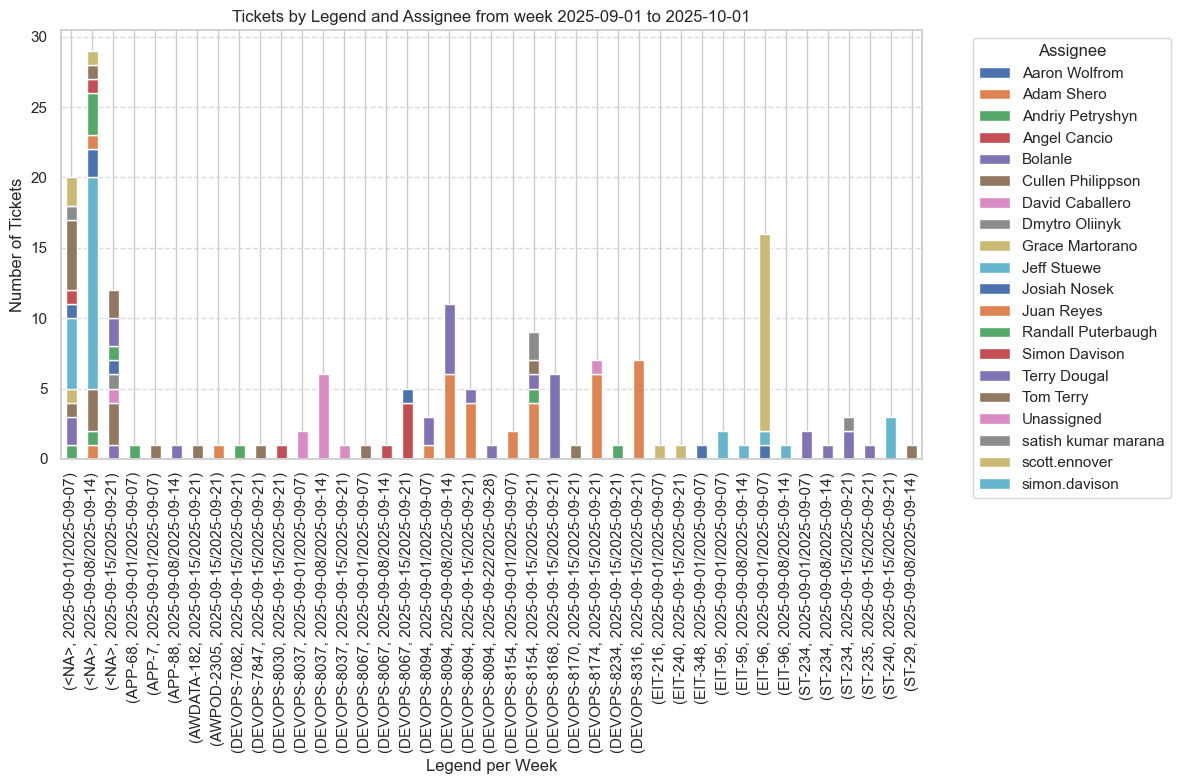

In [271]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title(f'Tickets by Legend and Assignee from week {start_month} to {end_month}')
plt.xlabel('Legend per Week')
plt.ylabel('Number of Tickets')
#plt.ylim(0, pivot_df.values.max())  # Set y-axis limit to max tickets
#plt.yticks(np.arange(0, pivot_df.values.max()+35, 1))  # Set y-ticks to every 2 tickets
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, ha='center')
plt.legend(title='Assignee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [272]:
# To get the ticket counts for 'Aaron Wolfrom' by parent_str and week:
# print(pivot_df.columns)  # Show available columns (assignee names)
for col in pivot_df.columns:
    print(f"\n---------- {col} ----------")  # Print the assignee name
    print(f"Assignee: {col}, Total Tickets: {pivot_df[col].sum()}")  # Print total tickets per assignee
    person_df = pivot_df[col].reset_index()  # brings 'parent_str' and 'week' as columns
    person_df['sum'] = person_df[col].sum()  # Add a sum column for clarity
    person_df['Percent'] = person_df[col] / person_df[col].sum() * 100  # Add a percent column for clarity
    person_df['Hours'] = person_df['Percent'] * 40 / 100  # Assuming 40 hours per week, calculate hours
    person_df['Hours'] = person_df['Hours'].round(0)  # Round hours to 2 decimal places
    # print(person_df.info())  # Show DataFrame info
    if (len(person_df[(person_df[col] > 0) & (person_df['parent_str'] != '<NA>')]) > 0):
        #print(person_df[(person_df[col] > 0) & (person_df['parent_str'] != '<NA>')][['parent_str', 'week', col, 'sum', 'Percent', 'Hours']])
        print(person_df[(person_df[col] > 0) & (person_df['parent_str'] != '<NA>')][['parent_str', 'week', 'Hours']])  # Filter to show only weeks where assignee has tickets
        total_hours = person_df.loc[(person_df[col] > 0) & (person_df['parent_str'] != '<NA>'), 'Hours'].sum()
        print(f"Total Opex Hours: {40 - total_hours}")
    else:
        print(f"Total Opex Hours: {40}")  # If no tickets, assume full 40 hours available



---------- Aaron Wolfrom ----------
Assignee: Aaron Wolfrom, Total Tickets: 2.0
   parent_str                   week  Hours
30    EIT-348  2025-09-01/2025-09-07   20.0
33     EIT-96  2025-09-01/2025-09-07   20.0
Total Opex Hours: 0.0

---------- Adam Shero ----------
Assignee: Adam Shero, Total Tickets: 21.0
     parent_str                   week  Hours
7    AWPOD-2305  2025-09-15/2025-09-21    2.0
21  DEVOPS-8154  2025-09-01/2025-09-07    4.0
22  DEVOPS-8154  2025-09-15/2025-09-21    8.0
25  DEVOPS-8174  2025-09-15/2025-09-21   11.0
27  DEVOPS-8316  2025-09-15/2025-09-21   13.0
Total Opex Hours: 2.0

---------- Andriy Petryshyn ----------
Assignee: Andriy Petryshyn, Total Tickets: 5.0
     parent_str                   week  Hours
8   DEVOPS-7082  2025-09-15/2025-09-21    8.0
22  DEVOPS-8154  2025-09-15/2025-09-21    8.0
26  DEVOPS-8234  2025-09-15/2025-09-21    8.0
Total Opex Hours: 16.0

---------- Angel Cancio ----------
Assignee: Angel Cancio, Total Tickets: 6.0
     parent_str   

# Work by Bussines Lead and Priority

In [322]:
# Define your time range (inclusive)
start_month = '2025-09'
end_month = '2025-09'

# Prepare month column
df_issues['month'] = pd.to_datetime(df_issues['created'], errors='coerce').dt.to_period('M').astype(str)

# Filter by time range
mask = (df_issues['month'] >= start_month) & (df_issues['month'] <= end_month)
filtered = df_issues[mask]

# Group and pivot for stacked bar
grouped = filtered.groupby(['bussiness_lead', 'month', 'priority_name']).size().reset_index(name='ticket_count')
pivot_df = grouped.pivot_table(index=['bussiness_lead', 'month'], columns='priority_name', values='ticket_count', fill_value=0)


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/2926550487.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_issues['month'] = pd.to_datetime(df_issues['created'], errors='coerce').dt.to_period('M').astype(str)


In [324]:
filtered

,key,id,summary,status,issuetype,creator_name,assignee_name,created,updated,project_name,...,target_end_date,bussiness_lead,planning_rank,portfolio_rank,legend,parent_project,parent,week,parent_str,month
63,DEVOPS-8316,171700,[Prod EKS]: A2 Configure Grafana Open Telemetry,Done,Story,Adam Shero,Adam Shero,2025-09-15 15:33:04.335000-06:00,2025-09-19 16:28:47.548000-06:00,DevOps,...,2025-09-17 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,DEVOPS-8154,2025-09-15/2025-09-21,DEVOPS-8154,2025-09
64,DEVOPS-8323,171707,Configure Open Telemetry for Experience API,Done,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:15.507000-06:00,2025-09-19 16:28:42.031000-06:00,DevOps,...,2025-09-18 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
65,DEVOPS-8322,171706,Configure Open Telemetry for Listener Profile,Done,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:14.027000-06:00,2025-09-19 16:28:39.381000-06:00,DevOps,...,2025-09-18 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
66,DEVOPS-8321,171705,Configure Open Telemetry for User Token,Done,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:12.493000-06:00,2025-09-19 16:28:36.279000-06:00,DevOps,...,2025-09-18 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
67,DEVOPS-8320,171704,Configure Open Telemetry for Identity User Lookup,Done,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:10.973000-06:00,2025-09-19 16:28:32.145000-06:00,DevOps,...,2025-09-18 00:00:00+00:00,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,EIT-536,170918,AWS S3 Bucket Access for Prod and Non Prod Amp...,Triage,Task,Mark Buchanan,Unassigned,2025-09-02 07:09:13.851000-06:00,2025-09-02 07:09:13.962000-06:00,Enterprise IT,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,<NA>,2025-09-01/2025-09-07,<NA>,2025-09
9880,EIT-535,170917,GCP Access (Eric Duell's Dev Sandbox Environme...,Triage,Task,Mark Buchanan,Unassigned,2025-09-02 07:08:53.942000-06:00,2025-09-02 07:08:54.103000-06:00,Enterprise IT,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,<NA>,2025-09-01/2025-09-07,<NA>,2025-09
9881,EIT-534,170916,GCP Access (Eric Duell's Dev Sandbox Environme...,Triage,Task,Mark Buchanan,Unassigned,2025-09-02 07:08:42.294000-06:00,2025-09-02 07:08:42.399000-06:00,Enterprise IT,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,<NA>,2025-09-01/2025-09-07,<NA>,2025-09
9882,EIT-533,170915,GCP Access (Eric Duell's Dev Sandbox Environme...,Triage,Task,Mark Buchanan,Unassigned,2025-09-02 07:08:33.091000-06:00,2025-09-02 07:08:33.197000-06:00,Enterprise IT,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,<NA>,2025-09-01/2025-09-07,<NA>,2025-09


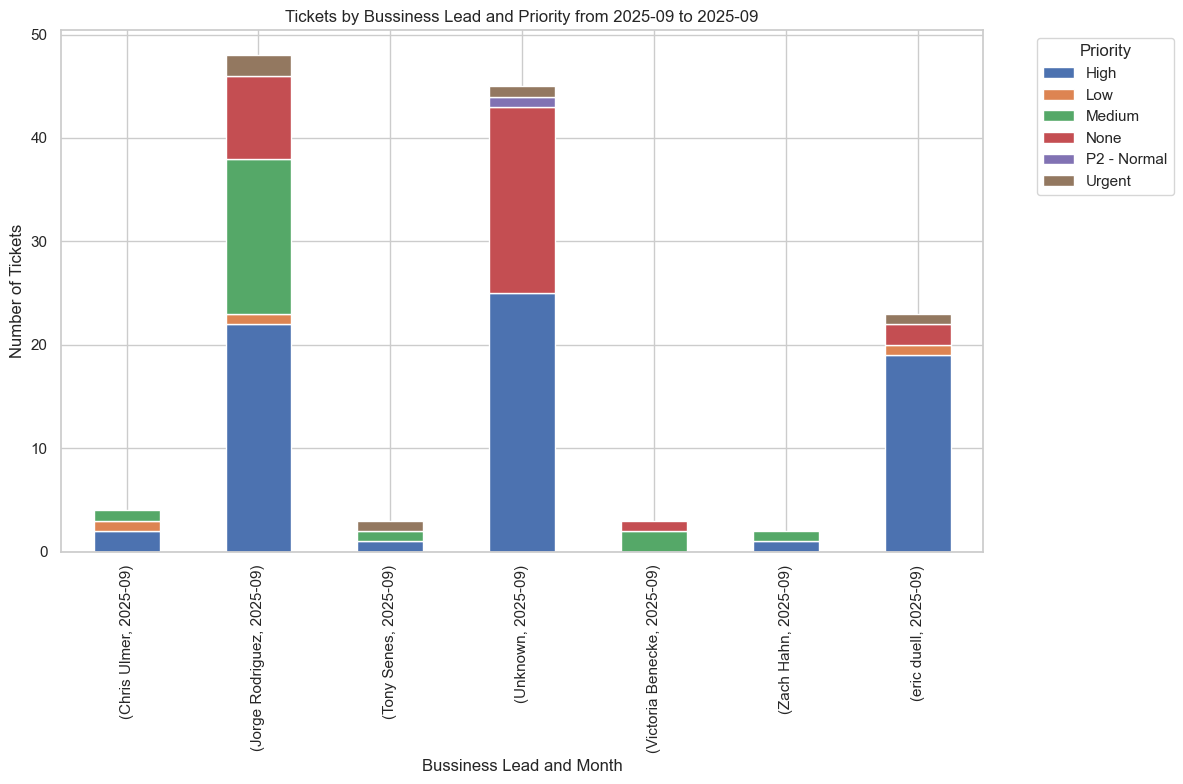

In [274]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title(f'Tickets by Bussiness Lead and Priority from {start_month} to {end_month}')
plt.xlabel('Bussiness Lead and Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90, ha='center')
plt.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

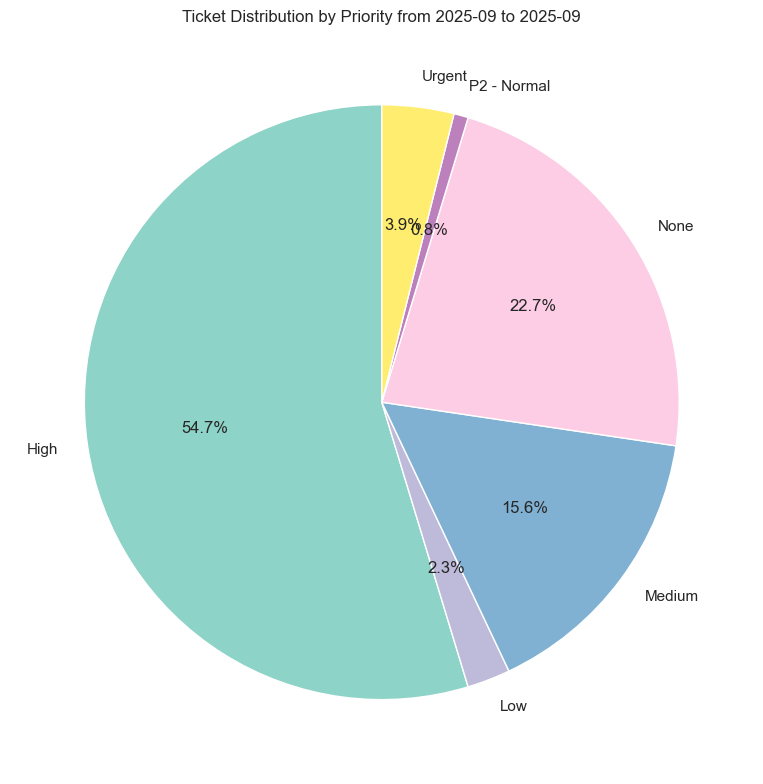

In [275]:
# Sum across all business leads and months for each priority
priority_totals = pivot_df.sum(axis=0)

# Plot as a pie chart
plt.figure(figsize=(8, 8))
priority_totals.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title(f'Ticket Distribution by Priority from {start_month} to {end_month}')
plt.ylabel('')  # Hide y-label for better appearance
plt.tight_layout()
plt.show()

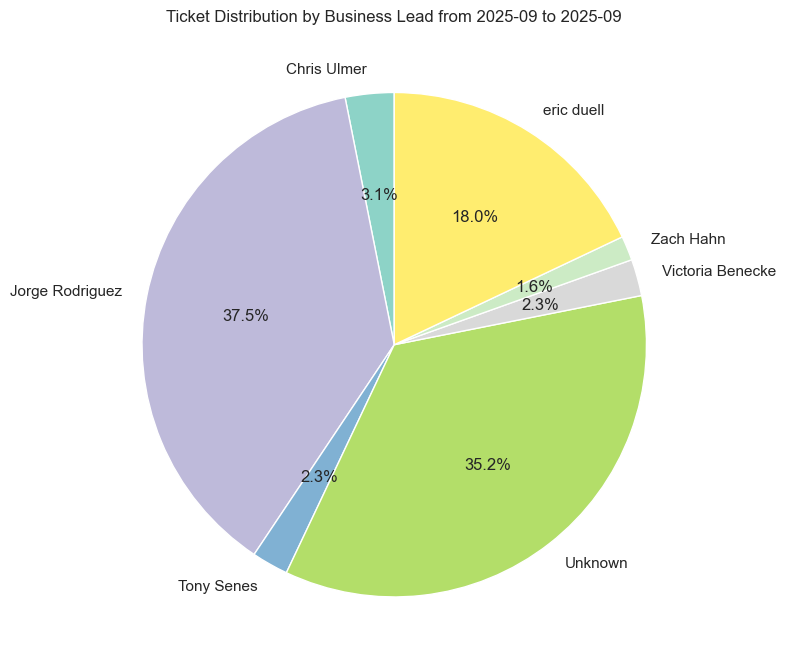

In [276]:
# Sum across all priorities and months for each business lead
business_lead_totals = filtered.groupby('bussiness_lead').size()

# Plot as a pie chart
plt.figure(figsize=(8, 8))
business_lead_totals.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title(f'Ticket Distribution by Business Lead from {start_month} to {end_month}')
plt.ylabel('')  # Hide y-label for better appearance
plt.tight_layout()
plt.show()

In [277]:
business_lead_totals > 10

bussiness_lead
Chris Ulmer         False
Jorge Rodriguez      True
Tony Senes          False
Unknown              True
Victoria Benecke    False
Zach Hahn           False
eric duell           True
dtype: bool

## --- CAPACITY ---

## CAPACITY for DevOps

In [278]:
#df_issues.query()

In [279]:
#tickets_created = df_issues.groupby(['year_created', 'month_created']).size().reset_index(name='count')

In [280]:
#tickets_updated = df_issues[df_issues['status'] == 'Done'].groupby(['year_updated', 'month_updated']).size().reset_index(name='count')

In [325]:
df_issues_tmp = df_issues[(df_issues['project_name'] == 'DevOps') | (df_issues['project_name'] == 'Release Management')].copy()
#df_issues_tmp = df_issues[(df_issues['project_name'] == 'Release Management')].copy()
tickets_created = df_issues_tmp.groupby(['year_created', 'month_created']).size().reset_index(name='count')
capacity = []
for index, row in tickets_created .iterrows():
    year = row['year_created']
    month = row['month_created']
    count = row['count']
    #project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'created': count
        #'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_created = capacity_df.copy()
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_created)

In [326]:
#df_issues_tmp = df_issues[(df_issues['project_name'] == 'DevOps')].copy()
df_issues_tmp = df_issues[(df_issues['project_name'] == 'DevOps') | (df_issues['project_name'] == 'Release Management')].copy()
tickets_updated = df_issues_tmp[(df_issues['status'] == 'Done') | (df_issues['status'] == 'Released Successfully to Production')].groupby(['year_updated', 'month_updated']).size().reset_index(name='count')
capacity = []
for index, row in tickets_updated.iterrows():
    year = row['year_updated']
    month = row['month_updated']
    count = row['count']
    #project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'completed': count
        #'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_updated = capacity_df.copy()
#capacity_updated['complited'] = capacity_created['created']
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_updated)
    

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/3733887669.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tickets_updated = df_issues_tmp[(df_issues['status'] == 'Done') | (df_issues['status'] == 'Released Successfully to Production')].groupby(['year_updated', 'month_updated']).size().reset_index(name='count')


In [327]:
total_capacity = pd.merge(capacity_created, capacity_updated, on='date', how='outer')
total_capacity['created'] = total_capacity['created'].fillna(0)
#total_capacity

In [284]:
#all_data = pd.melt(total_capacity, id_vars=['date'], value_vars=['created', 'updated'], var_name='type', value_name='count')
#all_data['date'] = pd.to_datetime(all_data['date'])
#all_data['date'] = all_data['date'].dt.to_period('M').dt.to_timestamp()


<Figure size 1400x800 with 0 Axes>

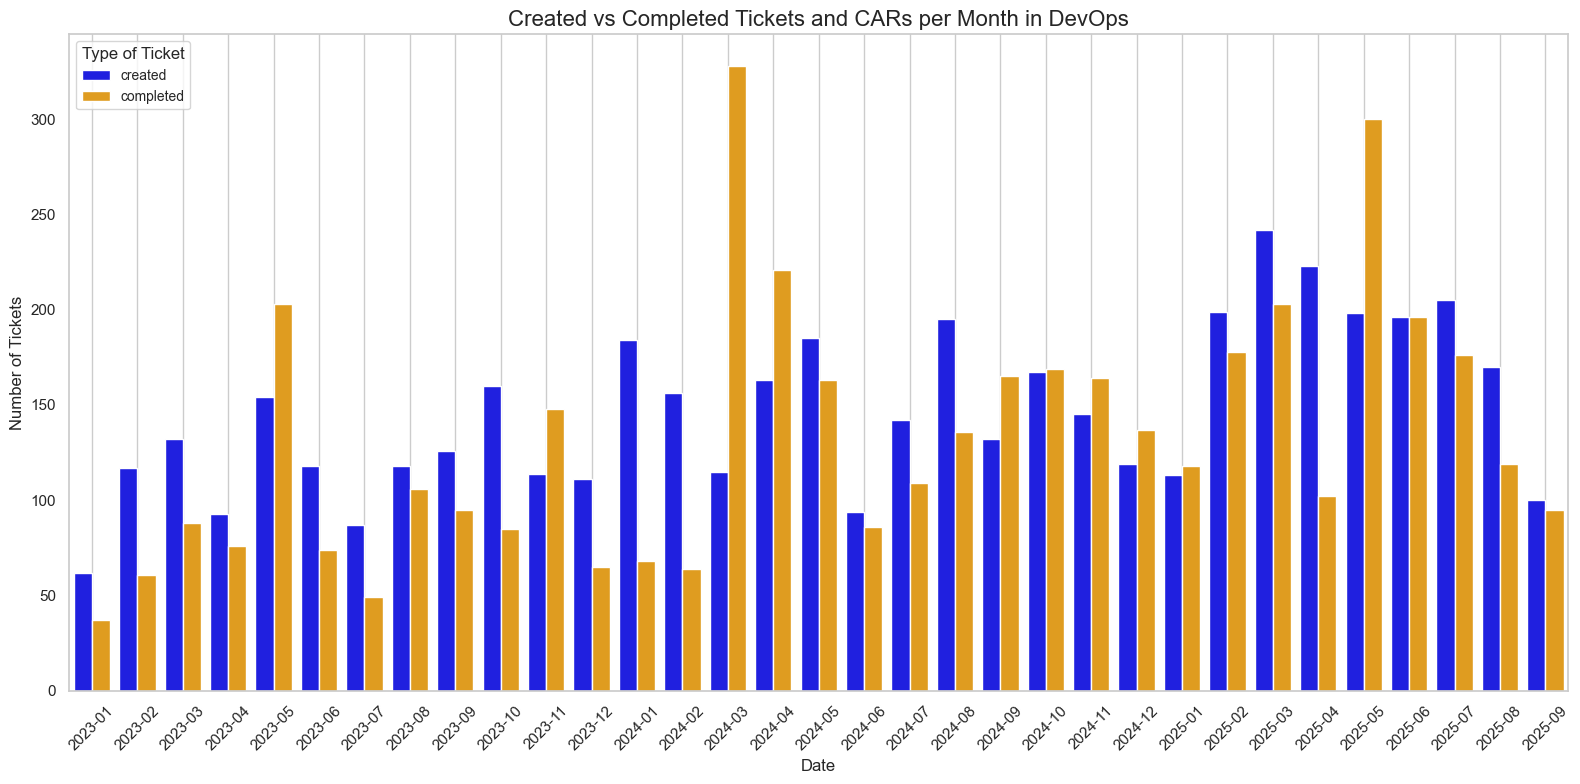

In [415]:
# Reshape the DataFrame for plotting
all_data = pd.melt(total_capacity, id_vars=['date'], value_vars=['created', 'completed'], var_name='type', value_name='count')
all_data['display_date'] = all_data['date'].apply(
    lambda x: x.strftime('%Y-%m') if pd.notnull(x) else 'N/A' # Or None, or ""
)
# Plot grouped bar chart
plt.figure(figsize=(14, 8)) # Adjusted figure size for potentially more bars
# capacity_updated.plot(kind='bar', x='date', y='updated', color='orange', label='Updated', ax=plt.gca())
#capacity_created.plot(kind='bar', x='date', y='created', color='blue', label='Created', ax=plt.gca())
#plt.figure(figsize=(14, 7)) # Adjusted figure size for potentially more bars
fig = plt.figure(figsize=(16, 8))
sns.barplot(data=all_data, x='display_date', y='count', hue='type', palette=['blue', 'orange'])
# Set the title and labels

plt.title('Created vs Completed Tickets and CARs per Month in DevOps', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend(title='Type of Ticket', loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.legend(loc='upper left', title='Type of Ticket', fontsize='small', title_fontsize='medium')
plt.show()

# Doing Time Series ML to see if I can predict the workload for next month 

In [416]:
len(all_data)

66

In [417]:
data_time_series = all_data.copy()
data_time_series.set_index('date', inplace=True)


In [418]:
data_time_series
lagged_data_completed = data_time_series[data_time_series['type']=='completed'].copy()
lagged_data_created = data_time_series[data_time_series['type']=='created'].copy()

In [419]:
def create_lagged_features(data, lags=3):
    df = data.copy()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['count'].shift(lag)
    # Drop rows with NaN values
    df.dropna(inplace=True)
    return df

lagged_data_completed = create_lagged_features(lagged_data_completed, lags=3)
lagged_data_created = create_lagged_features(lagged_data_created, lags=3)

In [420]:
def add_date_features(df):
    # Ensure the index is a DatetimeIndex
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    return df

lagged_data_completed = add_date_features(lagged_data_completed)
lagged_data_created = add_date_features(lagged_data_created)


In [ ]:
def add_rolling_features(df, window=3):
    df['rolling_mean'] = df['count'].rolling(
        window=window).mean().shift(1)
    df['rolling_std'] = df['count'].rolling(
        window=window).std().shift(1)
    df.dropna(inplace=True)
    # Drop rows with NaN values
    return df

lagged_data_completed = add_rolling_features(lagged_data_completed,window=3)
#lagged_data_completed.head()

lagged_data_created = add_rolling_features(lagged_data_created,window=3)
#lagged_data_created.head()


,type,count,display_date,lag_1,lag_2,lag_3,month,day_of_week,is_weekend,rolling_mean,rolling_std
date,,,,,,,,,,,
2023-07-01,created,87,2023-07,118.0,154.0,93.0,7,5,1,121.666667,30.664855
2023-08-01,created,118,2023-08,87.0,118.0,154.0,8,1,0,119.666667,33.531080
2023-09-01,created,126,2023-09,118.0,87.0,118.0,9,4,0,107.666667,17.897858
2023-10-01,created,160,2023-10,126.0,118.0,87.0,10,6,1,110.333333,20.599353
2023-11-01,created,114,2023-11,160.0,126.0,118.0,11,2,0,134.666667,22.300972


<Axes: xlabel='date'>

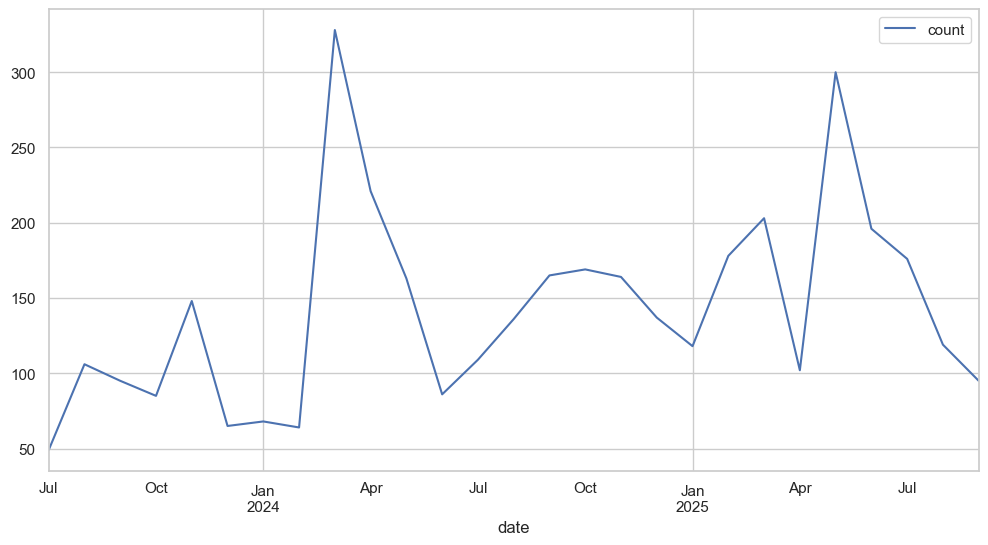

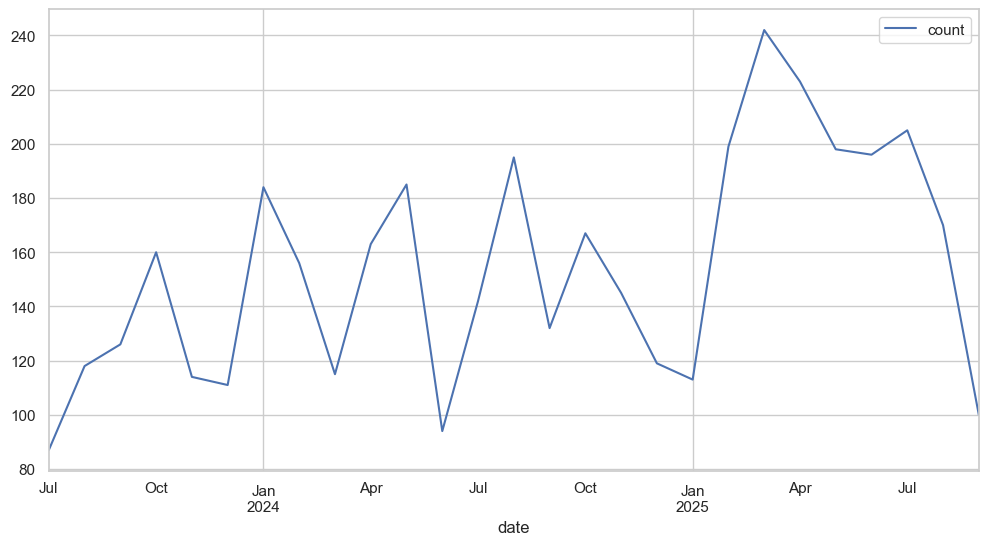

In [424]:
lagged_data_completed.plot(y='count', figsize=(12, 6))
lagged_data_created.plot(y='count', figsize=(12, 6))

In [425]:
lagged_data_completed

,type,count,display_date,lag_1,lag_2,lag_3,month,day_of_week,is_weekend,rolling_mean,rolling_std
date,,,,,,,,,,,
2023-07-01,completed,49,2023-07,74.0,203.0,76.0,7,5,1,117.666667,73.907600
2023-08-01,completed,106,2023-08,49.0,74.0,203.0,8,1,0,108.666667,82.645831
2023-09-01,completed,95,2023-09,106.0,49.0,74.0,9,4,0,76.333333,28.571548
2023-10-01,completed,85,2023-10,95.0,106.0,49.0,10,6,1,83.333333,30.237945
2023-11-01,completed,148,2023-11,85.0,95.0,106.0,11,2,0,95.333333,10.503968
2023-12-01,completed,65,2023-12,148.0,85.0,95.0,12,4,0,109.333333,33.857545
2024-01-01,completed,68,2024-01,65.0,148.0,85.0,1,0,0,99.333333,43.316663
2024-02-01,completed,64,2024-02,68.0,65.0,148.0,2,3,0,93.666667,47.077950
2024-03-01,completed,328,2024-03,64.0,68.0,65.0,3,4,0,65.666667,2.081666


In [426]:
lagged_data_created

,type,count,display_date,lag_1,lag_2,lag_3,month,day_of_week,is_weekend,rolling_mean,rolling_std
date,,,,,,,,,,,
2023-07-01,created,87,2023-07,118.0,154.0,93.0,7,5,1,121.666667,30.664855
2023-08-01,created,118,2023-08,87.0,118.0,154.0,8,1,0,119.666667,33.531080
2023-09-01,created,126,2023-09,118.0,87.0,118.0,9,4,0,107.666667,17.897858
2023-10-01,created,160,2023-10,126.0,118.0,87.0,10,6,1,110.333333,20.599353
2023-11-01,created,114,2023-11,160.0,126.0,118.0,11,2,0,134.666667,22.300972
2023-12-01,created,111,2023-12,114.0,160.0,126.0,12,4,0,133.333333,23.860707
2024-01-01,created,184,2024-01,111.0,114.0,160.0,1,0,0,128.333333,27.465129
2024-02-01,created,156,2024-02,184.0,111.0,114.0,2,3,0,136.333333,41.307788
2024-03-01,created,115,2024-03,156.0,184.0,111.0,3,4,0,150.333333,36.828431


In [428]:
# Align the indices to ensure correct matching by date
lagged_data_completed['created'] = lagged_data_created['count'].reindex(lagged_data_completed.index)

In [429]:
lagged_data_completed


,type,count,display_date,lag_1,lag_2,lag_3,month,day_of_week,is_weekend,rolling_mean,rolling_std,created
date,,,,,,,,,,,,
2023-07-01,completed,49,2023-07,74.0,203.0,76.0,7,5,1,117.666667,73.907600,87
2023-08-01,completed,106,2023-08,49.0,74.0,203.0,8,1,0,108.666667,82.645831,118
2023-09-01,completed,95,2023-09,106.0,49.0,74.0,9,4,0,76.333333,28.571548,126
2023-10-01,completed,85,2023-10,95.0,106.0,49.0,10,6,1,83.333333,30.237945,160
2023-11-01,completed,148,2023-11,85.0,95.0,106.0,11,2,0,95.333333,10.503968,114
2023-12-01,completed,65,2023-12,148.0,85.0,95.0,12,4,0,109.333333,33.857545,111
2024-01-01,completed,68,2024-01,65.0,148.0,85.0,1,0,0,99.333333,43.316663,184
2024-02-01,completed,64,2024-02,68.0,65.0,148.0,2,3,0,93.666667,47.077950,156
2024-03-01,completed,328,2024-03,64.0,68.0,65.0,3,4,0,65.666667,2.081666,115


In [430]:
train_size = int(len(lagged_data_completed) * 0.8)
train_data = lagged_data_completed[:train_size]
test_data = lagged_data_completed[train_size:]



In [435]:
X_train = train_data.drop('count', axis=1)
y_train = train_data['count']
X_test = test_data.drop('count', axis=1)
y_test = test_data['count']



In [436]:
X_train.head()

,type,display_date,lag_1,lag_2,lag_3,month,day_of_week,is_weekend,rolling_mean,rolling_std,created
date,,,,,,,,,,,
2023-07-01,completed,2023-07,74.0,203.0,76.0,7,5,1,117.666667,73.907600,87
2023-08-01,completed,2023-08,49.0,74.0,203.0,8,1,0,108.666667,82.645831,118
2023-09-01,completed,2023-09,106.0,49.0,74.0,9,4,0,76.333333,28.571548,126
2023-10-01,completed,2023-10,95.0,106.0,49.0,10,6,1,83.333333,30.237945,160
2023-11-01,completed,2023-11,85.0,95.0,106.0,11,2,0,95.333333,10.503968,114


In [441]:
from xgboost import XGBRegressor

# Drop non-numeric columns before fitting
X_train_num = X_train.select_dtypes(include=['int', 'float', 'bool', 'category'])
X_test_num = X_test.select_dtypes(include=['int', 'float', 'bool', 'category'])

model = XGBRegressor(objective='reg:squarederror',
    n_estimators=100, max_depth=3, learning_rate=0.1)

model.fit(X_train_num, y_train)

y_pred = model.predict(X_test_num)


In [443]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')



Mean Squared Error: 6792.68505859375
Mean Absolute Error: 52.92665100097656


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/295012755.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=X_test.index[-1],periods=11, freq='M')[1:]


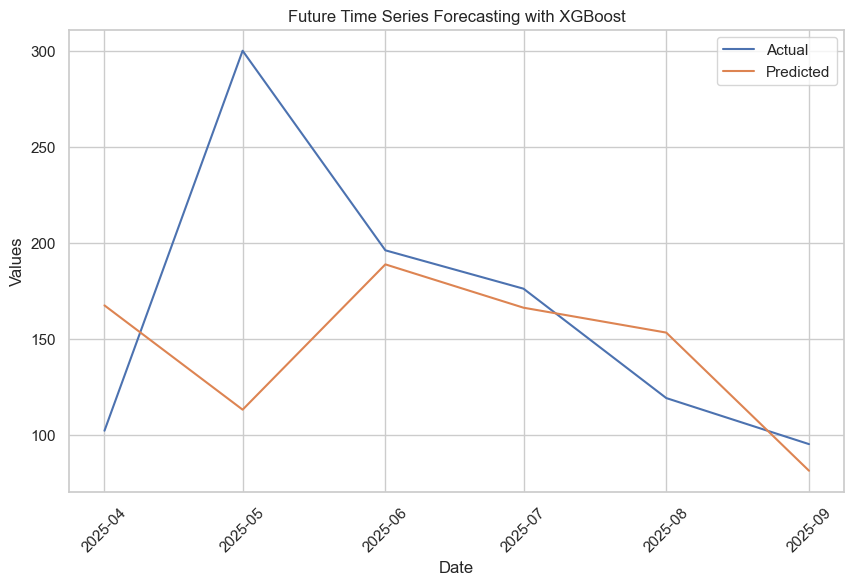

In [449]:
import matplotlib.pyplot as plt
# Generate the dates for the future predictions (extend the original date range)
future_dates = pd.date_range(start=X_test.index[-1],periods=11, freq='M')[1:]
# Skip the first date to match steps
# Convert the forecast to a DataFrame for easy plotting
#future_df = pd.DataFrame({'Date': future_dates,'Predicted_Value': future_forecast})
#future_df.set_index('Date', inplace=True)
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
# Plot actual values from the test set
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted')
# Plot the future predictions
#plt.plot(future_df.index,future_df['Predicted_Value'],label='Predicted', linestyle='--')
# Add labels and legend
plt.title('Future Time Series Forecasting with XGBoost')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
# Rotate X-axis labels by 45 degrees
plt.legend()
plt.show()




# ------ END of Time Series Testing ---- 

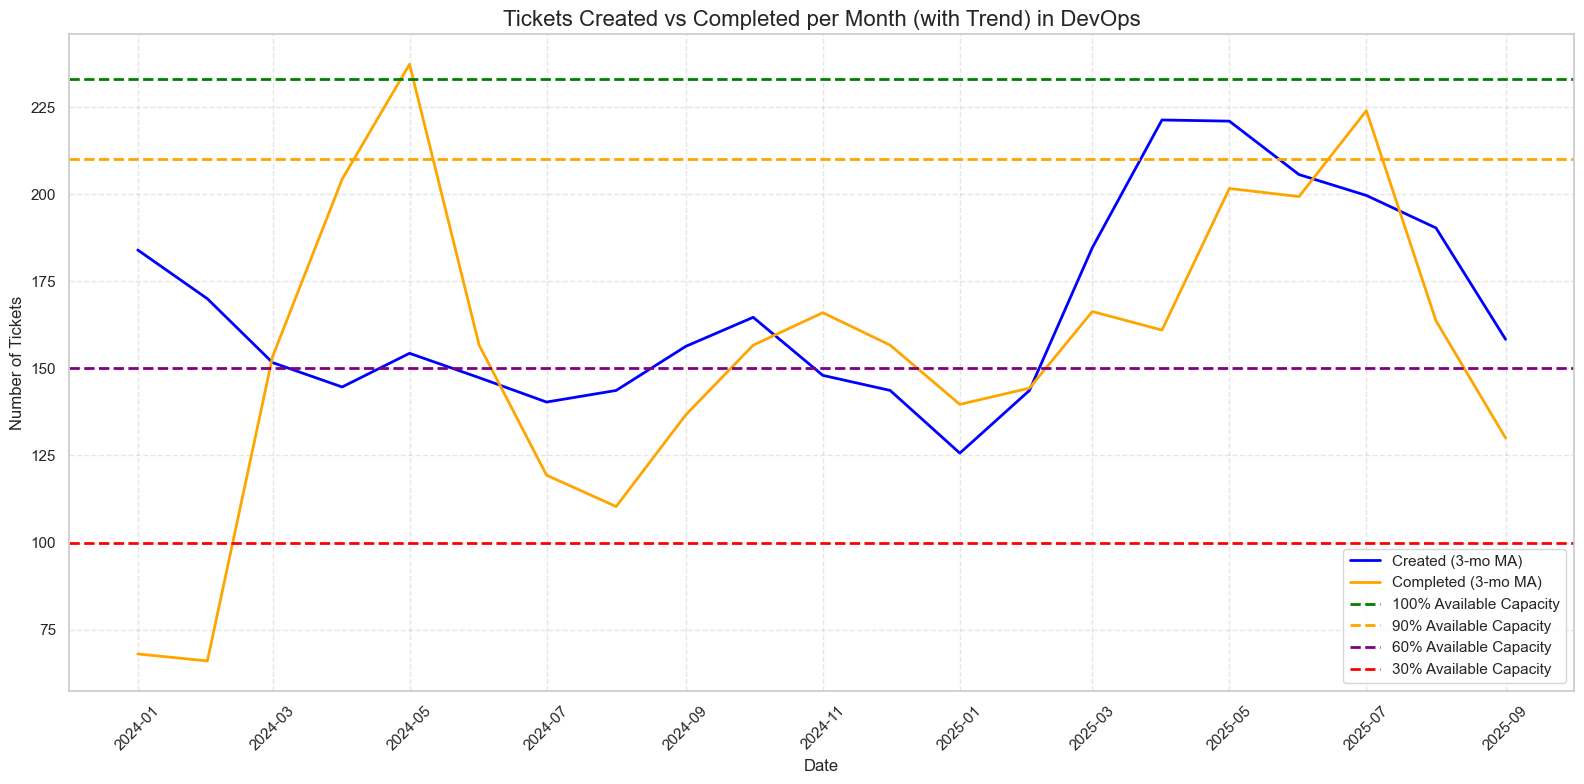

In [287]:
# Define your time interval
start_date = '2024-01-01'
end_date = '2026-09-01'

# Ensure 'date' is datetime
total_capacity['date'] = pd.to_datetime(total_capacity['date'])

# Filter by interval
mask = (total_capacity['date'] >= start_date) & (total_capacity['date'] <= end_date)
filtered_capacity = total_capacity[mask]

plt.figure(figsize=(16, 8))

# Plot original data
#plt.plot(filtered_capacity['date'], filtered_capacity['created'], marker='o', label='Created', color='blue', alpha=0.5)
#plt.plot(filtered_capacity['date'], filtered_capacity['completed'], marker='o', label='Completed', color='orange', alpha=0.5)

# Calculate and plot 3-month moving averages
plt.plot(filtered_capacity['date'], filtered_capacity['created'].rolling(window=3, min_periods=1).mean(), 
         label='Created (3-mo MA)', color='blue', linewidth=2)
plt.plot(filtered_capacity['date'], filtered_capacity['completed'].rolling(window=3, min_periods=1).mean(), 
         label='Completed (3-mo MA)', color='orange', linewidth=2)
plt.axhline(y=233, color='green', linestyle='--', linewidth=2, label='100% Available Capacity')
plt.axhline(y=210, color='orange', linestyle='--', linewidth=2, label='90% Available Capacity')
plt.axhline(y=150, color='purple', linestyle='--', linewidth=2, label='60% Available Capacity')
plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='30% Available Capacity')


plt.title('Tickets Created vs Completed per Month (with Trend) in DevOps', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## CAPACITY for EIT

In [288]:
df_issues_tmp = df_issues[(df_issues['project_name'] == 'Enterprise IT')].copy()
tickets_created = df_issues_tmp.groupby(['year_created', 'month_created']).size().reset_index(name='count')
capacity = []
for index, row in tickets_created .iterrows():
    year = row['year_created']
    month = row['month_created']
    count = row['count']
    #project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'created': count
        #'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_created = capacity_df.copy()
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_created)

In [289]:
df_issues_tmp = df_issues[(df_issues['project_name'] == 'Enterprise IT')].copy()
tickets_updated = df_issues_tmp[df_issues['status'] == 'Done'].groupby(['project_name','year_updated', 'month_updated']).size().reset_index(name='count')
capacity = []
for index, row in tickets_updated.iterrows():
    year = row['year_updated']
    month = row['month_updated']
    count = row['count']
    project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'complited': count,
        'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_updated = capacity_df.copy()
#capacity_updated['complited'] = capacity_created['created']
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_updated)

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/173076131.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tickets_updated = df_issues_tmp[df_issues['status'] == 'Done'].groupby(['project_name','year_updated', 'month_updated']).size().reset_index(name='count')


In [290]:
total_capacity = pd.merge(capacity_created, capacity_updated, on='date', how='outer')
total_capacity['created'] = total_capacity['created'].fillna(0)

<Figure size 1400x800 with 0 Axes>

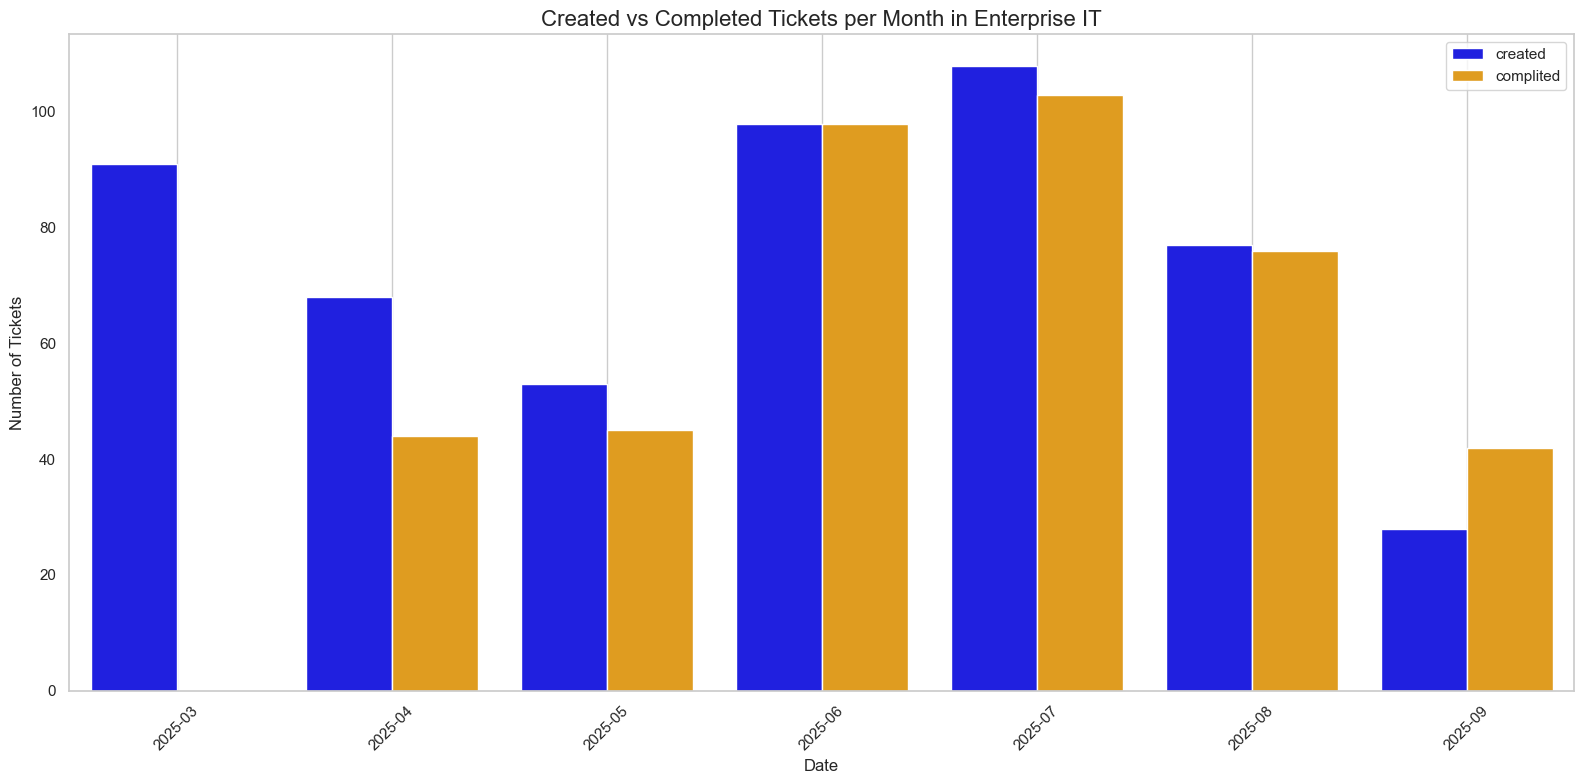

In [291]:
# Reshape the DataFrame for plotting
all_data = pd.melt(total_capacity, id_vars=['date'], value_vars=['created', 'complited'], var_name='type', value_name='count')
all_data['display_date'] = all_data['date'].apply(
    lambda x: x.strftime('%Y-%m') if pd.notnull(x) else 'N/A' # Or None, or ""
)
# Plot grouped bar chart
plt.figure(figsize=(14, 8)) # Adjusted figure size for potentially more bars
# capacity_updated.plot(kind='bar', x='date', y='updated', color='orange', label='Updated', ax=plt.gca())
#capacity_created.plot(kind='bar', x='date', y='created', color='blue', label='Created', ax=plt.gca())
#plt.figure(figsize=(14, 7)) # Adjusted figure size for potentially more bars
fig = plt.figure(figsize=(16, 8))
sns.barplot(data=all_data, x='display_date', y='count', hue='type', palette=['blue', 'orange'])
# Set the title and labels

plt.title('Created vs Completed Tickets per Month in Enterprise IT', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend(title='Type of Ticket', loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()


In [292]:
from datetime import datetime

# --- Parameters ---
# Define your time period (example: tickets DONE between 2025-08-01 and 2025-09-01)
start_date = "2025-09-01"
end_date = "2025-10-01"

# Fetch issues, including assignee, key, and summary fields
PROJECT_KEY = "DEVOPS"  # Replace with your project key
PROJECT_KEY_2 = "EIT"  # Replace with your project key
PROJECT_KEY_3 = "CAR"  # Replace with your project key

# JQL to filter issues with status DONE in the time period
jql_query = (
    f'status = "Done" AND statusCategoryChangedDate >= "{start_date}" AND statusCategoryChangedDate < "{end_date}" AND (project = "{PROJECT_KEY}" OR project = "{PROJECT_KEY_2}" OR project = "{PROJECT_KEY_3}")'
)

# Fetch issues (adjust maxResults as needed)
search_params = {
    "jql": jql_query,
    "maxResults": 5000,
    "fields": ["summary", "description", "comment", "status"],
    "expand": 'changelog',
    }

# Correct API endpoint
url = f"{jira_server}/rest/api/3/search/jql"
next_token = None
total_issues_processed = 0
done_issues = []
done_iterator_all = []
# Collect comments and descriptions
issues_comments = []
while True:
    if next_token:
        search_params["nextPageToken"] = next_token
    response = jira._session.get(url,params=search_params)

    issues_iterator = response.json()
    done_iterator = issues_iterator['issues']
    done_iterator_all = done_iterator_all + done_iterator

    for issue in done_iterator:
        issue_data = {
            "key": issue['key'],
            "summary": issue['fields']['summary'],
            "description": issue['fields'].get("description", ""),
            "comments": []
        }
        # Get all comments for the issue using the issue key (not the dict)
        try:
            comments = jira.comments(issue['key'])
            print(f"Processing issue: {issue['key']} with {len(comments)} comments with Status {issue['fields']['status']['name']}")
            for comment in comments:
                issue_data["comments"].append({
                    "author": comment.author.displayName,
                    "created": comment.created,
                    "body": comment.body
                })
        except Exception as e:
            print(f"Failed to fetch comments for {issue['key']}: {e}")
        issues_comments.append(issue_data)
                
    next_token = issues_iterator.get("nextPageToken")
    if not next_token:
        break
    



Processing issue: EIT-558 with 0 comments with Status Done
Processing issue: EIT-557 with 0 comments with Status Done
Processing issue: EIT-553 with 2 comments with Status Done
Processing issue: EIT-552 with 1 comments with Status Done
Processing issue: EIT-550 with 1 comments with Status Done
Processing issue: EIT-549 with 4 comments with Status Done
Processing issue: EIT-548 with 2 comments with Status Done
Processing issue: EIT-547 with 4 comments with Status Done
Processing issue: EIT-546 with 0 comments with Status Done
Processing issue: EIT-545 with 0 comments with Status Done
Processing issue: EIT-544 with 1 comments with Status Done
Processing issue: EIT-543 with 1 comments with Status Done
Processing issue: EIT-542 with 0 comments with Status Done
Processing issue: EIT-541 with 1 comments with Status Done
Processing issue: EIT-540 with 2 comments with Status Done
Processing issue: EIT-539 with 1 comments with Status Done
Processing issue: EIT-531 with 0 comments with Status Do

In [293]:
#issues_comments[0]['description']['content'][0]['content'][0]['text']


In [294]:
#done_iterator

In [295]:
#done_iterator[100].changelog  # Access the changelog (history) of the first issue
'''
  'fields': {'summary': 'Edit Docusign Templates',
   'description': {'type': 'doc',
    'version': 1,
    'content': [{'type': 'paragraph',
      'content': [{'type': 'text',
        'text
'''

"\n  'fields': {'summary': 'Edit Docusign Templates',\n   'description': {'type': 'doc',\n    'version': 1,\n    'content': [{'type': 'paragraph',\n      'content': [{'type': 'text',\n        'text\n"

In [296]:
'''
len(issues_comments)
for i in range(len(issues_comments)):
    try:
        text = issues_comments[i]['description']['content'][0]['content'][0]['text']
        key = issues_comments[i].get('key')
        print(key, text)
    except (KeyError, IndexError, TypeError):
        print("No text found in description for issue:", key)
'''


'\nlen(issues_comments)\nfor i in range(len(issues_comments)):\n    try:\n        text = issues_comments[i][\'description\'][\'content\'][0][\'content\'][0][\'text\']\n        key = issues_comments[i].get(\'key\')\n        print(key, text)\n    except (KeyError, IndexError, TypeError):\n        print("No text found in description for issue:", key)\n'

In [297]:
# Convert iterator to a list if needed
done_issues_list = list(done_iterator_all)
comments_list = []
issue_key_list = []
print(f"Total DONE issues found: {len(done_issues_list)}")
# More efficient: iterate directly over done_issues_list, avoid indexing
for issue in done_issues_list:
    # If issue is a dict (from REST API), extract the key
    issue_key = issue['key'] if isinstance(issue, dict) and 'key' in issue else getattr(issue, 'key', None)
    if not issue_key:
        continue  # skip if no key found

    try:
        comments = jira.comments(issue_key)
    except Exception as e:
        print(f"Failed to fetch comments for {issue_key}: {e}")
        comments = []

    # Try to get summary (works for both dict and Issue object)
    summary = issue['fields']['summary'] if isinstance(issue, dict) and 'fields' in issue and 'summary' in issue['fields'] else getattr(issue.fields, 'summary', None)
    comments_list.append(summary)
    issue_key_list.append(issue_key)
    if comments:
        for comment in comments:
            comments_list.append(getattr(comment, 'body', str(comment)))
            issue_key_list.append(issue_key)


Total DONE issues found: 125


In [298]:
len(comments_list)

453

In [299]:
#text = issues_comments[0]['description']['content'][0]['content'][0]['text']
#text = text.replace('\n', ' ')
#text = text.strip()
#text = re.sub(' +', ' ', text)  # Replace multiple spaces with a single space


In [300]:
#print(text)

In [301]:
import re

len(issues_comments)
for i in range(len(issues_comments)):
    key = None  # Ensure key is always defined
    try:
        text = issues_comments[i]['description']['content'][0]['content'][0]['text']
        text = text.replace('\n', ' ')
        text = text.strip()
        text = re.sub(' +', ' ', text)  # Replace multiple spaces with a single space
        key = issues_comments[i].get('key')
        print(key, text)
        comments_list.append(text)
        issue_key_list.append(key)
    except (KeyError, IndexError, TypeError):
        print("No text found in description for issue:", key)

EIT-558 https://www.google.com/url?q=http://audacytechnicalservices.zendesk.com/agent/tickets/219043&sa=D&source=calendar&ust=1758112418832868&usg=AOvVaw2H0RsG0Xjf7Y6G5pGk6OE3
EIT-557 talk with Jason about current roadmap in automation - so I can plan PC Refresh Q4 & 2026
EIT-553 we have several request, and Art just reached out again about a logger computer.
EIT-552 ORL - 5550 i5 - 147472 -
EIT-550 Requester Name: JD Herring Requester Email: james.herring@audacy.com Description: Good day Jeff, Can we get 2 13 inch Dell laptops in Norfolk when you have a chance? Address is 236 Clearfield Ave Suite 206 Virginia Beach, VA 23462 Thanks!
EIT-549 review VMware if there are active snapshots.
EIT-548 put in a ticket for documentation for privlated account for Aaron and verifiy their termination
EIT-547 I am unable to load or download any of the Augst 2025 files from nielsen/tally for the current release
No text found in description for issue: None
EIT-545 Requester Name: JD Herring Requester 

In [302]:
#done_issues_list

In [303]:
len(comments_list)

547

In [304]:
len(issue_key_list)

547

In [305]:
comments_df = pd.DataFrame({
    'issue_key': issue_key_list,
    'comment_body': comments_list
})
# Save comments to a CSV file
# comments_df.to_csv('jira_done_issues_comments.csv', index=False)
# print("Comments saved to 'jira_done_issues_comments.csv'.") 


In [306]:
comments_df.sample(10)  # Display a sample of 10 comments for verification


,issue_key,comment_body
404,DEVOPS-7708,Thank you so much for the update\n\n*Jorge Rod...
35,EIT-539,"'eit-96 was closed, not sure where to assign t..."
26,EIT-543,LAX - Notebooks request
325,DEVOPS-8119,\n\n[~accountid:60c10478b215610069f1bf01] : is...
365,DEVOPS-7940,Moving this to done as the work on it has been...
178,DEVOPS-8249,[NONPROD] Enable apis for prj-edp-dev-io-svc
453,EIT-558,https://www.google.com/url?q=http://audacytech...
401,DEVOPS-7708,Spoke with [~accountid:557058:b219e460-e60a-4a...
86,EIT-214,Completed. Closing out Jira Card.
120,DEVOPS-8293,Should I move this to Will not Do?


In [307]:
#comments_df[comments_df['issue_key'] == 'DEVOPS-8293']['comment_body'].values

In [308]:
len(comments_df['issue_key'].unique()) # Get the number of unique issue keys from the comments DataFrame

125

# Word Cloud Generation

In [309]:
#! pip3 install wordcloud

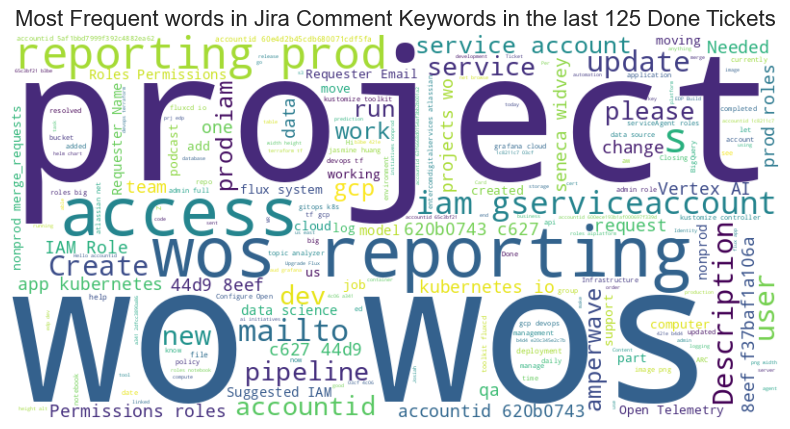

In [310]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all comments into a single string
all_comments_text = " ".join(comments_df['comment_body'].astype(str))
all_comments_text = all_comments_text.replace('\n', ' ')  # Replace newlines with spaces for better word cloud generation
all_comments_text = all_comments_text.replace('will', ' ')  # Replace 'will' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('Jira', ' ')  # Replace 'Jira' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('noformat', ' ')  # Replace 'noformat' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('https', ' ')  # Replace 'https' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('gitlab', ' ')  # Replace 'gitlab' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('audacy', ' ')  # Replace 'audacy' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('need', ' ')  # Replace 'need' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('done', ' ')  # Replace 'done' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('ticket', ' ')  # Replace 'ticket' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('h2', ' ')  # Replace 'h2' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('h3', ' ')  # Replace 'h3' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('index', ' ')  # Replace 'index' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('query', ' ')  # Replace 'query' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('issue', ' ')  # Replace 'issue' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('csv', ' ')  # Replace 'csv' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('gz', ' ')  # Replace 'gz' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('Thank', ' ')  # Replace 'Thank' with a space for better word cloud generation

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Most Frequent words in Jira Comment Keywords in the last {len(done_issues_list)} Done Tickets', fontsize=16)
plt.show() # Use plt.show() to display, or plt.savefig() to save

# https://stackoverflow.com/questions/38916452/nltk-download-ssl-certificate-verify-failed

# Top 20 Most Common Words Bar Chart

In [311]:
''''
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
'''


"'\nimport nltk\nimport ssl\n\ntry:\n    _create_unverified_https_context = ssl._create_unverified_context\nexcept AttributeError:\n    pass\nelse:\n    ssl._create_default_https_context = _create_unverified_https_context\n\nnltk.download()\n"

In [312]:
import nltk

print("NLTK data search paths:")
for path in nltk.data.path:
    print(path)

NLTK data search paths:
/Users/jorge.rodriguez/nltk_data
/Library/Frameworks/Python.framework/Versions/3.13/nltk_data
/Library/Frameworks/Python.framework/Versions/3.13/share/nltk_data
/Library/Frameworks/Python.framework/Versions/3.13/lib/nltk_data
/usr/share/nltk_data
/usr/local/share/nltk_data
/usr/lib/nltk_data
/usr/local/lib/nltk_data


In [313]:
import nltk

# Example: Check for 'stopwords'
try:
    stopwords_path = nltk.data.find('corpora/stopwords')
    print(f"\n'stopwords' resource found at: {stopwords_path}")
except LookupError:
    print("\n'stopwords' resource not found in NLTK data paths.")

# Example: Check for 'wordnet'
try:
    wordnet_path = nltk.data.find('corpora/wordnet')
    print(f"'wordnet' resource found at: {wordnet_path}")
except LookupError:
    print("'wordnet' resource not found in NLTK data paths.")

# Example: Check for 'omw-1.4' (Open Multilingual Wordnet)
try:
    omw_path = nltk.data.find('tokenizers/punkt/')
    print(f"'punkt' resource found at: {omw_path}")
except LookupError:
    print("'punkt' resource not found in NLTK data paths.")


'stopwords' resource found at: /Users/jorge.rodriguez/nltk_data/corpora/stopwords
'wordnet' resource found at: /Users/jorge.rodriguez/nltk_data/corpora/wordnet
'punkt' resource found at: /Users/jorge.rodriguez/nltk_data/tokenizers/punkt


In [314]:
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

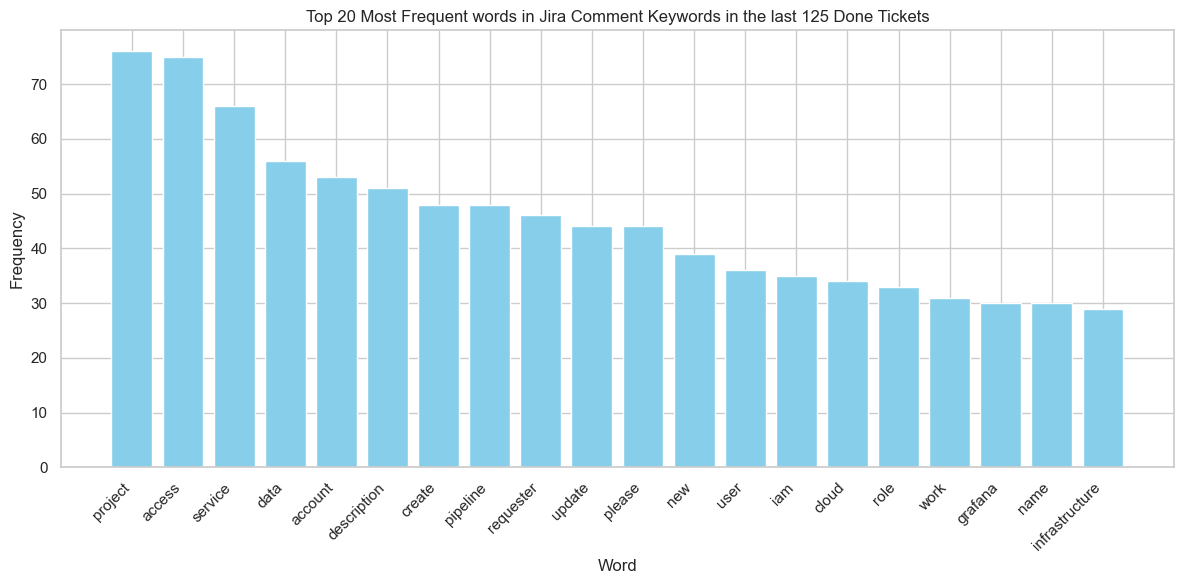

In [315]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Assuming 'all_comments_text' contains the combined preprocessed text
# (from the 'processed_comment' column of your DataFrame)

# Download required NLTK data if not already present
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Tokenize, lowercase, remove punctuation, remove stopwords, and lemmatize
tokens = nltk.word_tokenize(all_comments_text)
words = [
    lemmatizer.lemmatize(word.lower())
    for word in tokens
        if word.isalpha() and word.lower() not in stop_words
]
most_common_words = Counter(words).most_common(20) # Top 20 words

common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
plt.bar(common_words_df['word'], common_words_df['count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top 20 Most Frequent words in Jira Comment Keywords in the last {len(done_issues_list)} Done Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Use plt.show() to display, or plt.savefig() to save

# Top 15 Jira Issues by Comment Count Bar Chart

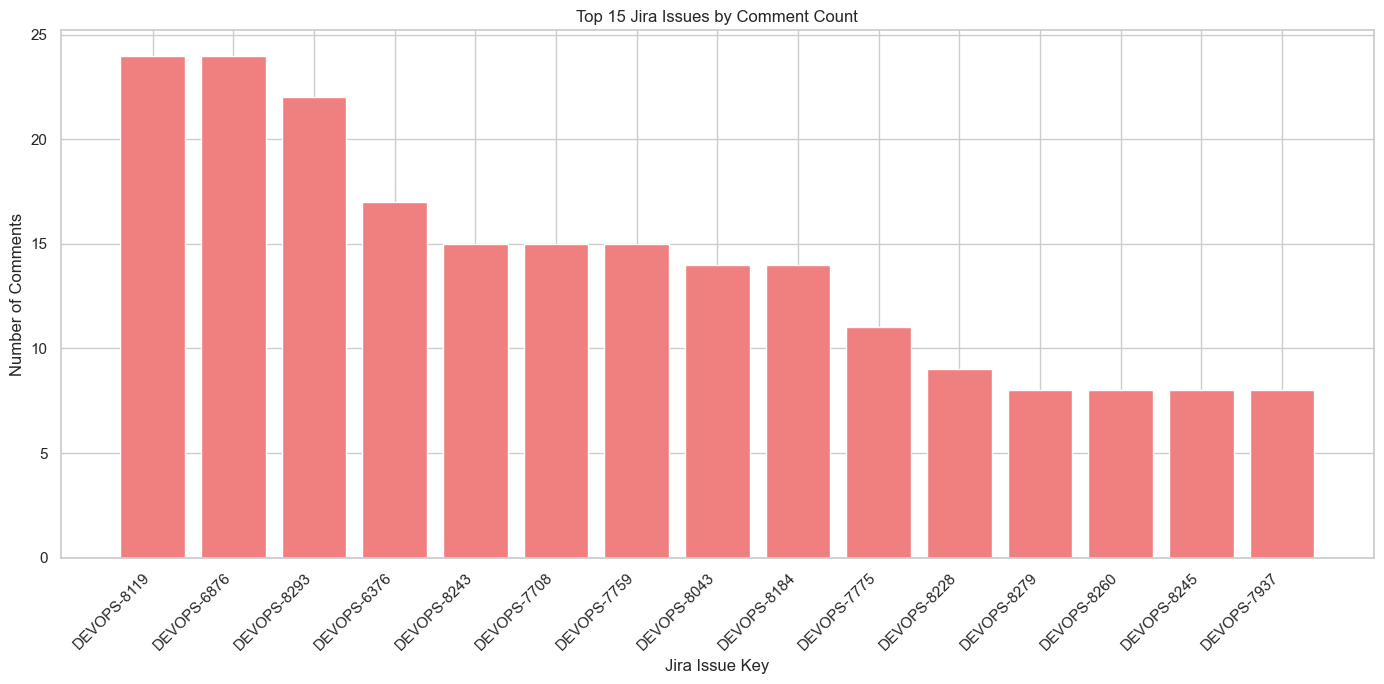

In [316]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with 'issue_key' column

comments_per_issue = comments_df['issue_key'].value_counts().reset_index()
comments_per_issue.columns = ['issue_key', 'comment_count']

top_15_issues = comments_per_issue.head(15)

plt.figure(figsize=(14, 7))
plt.bar(top_15_issues['issue_key'], top_15_issues['comment_count'], color='lightcoral')
plt.xlabel('Jira Issue Key')
plt.ylabel('Number of Comments')
plt.title('Top 15 Jira Issues by Comment Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Use plt.show() to display, or plt.savefig() to save

# generate the bi-grams visualization and analysis:

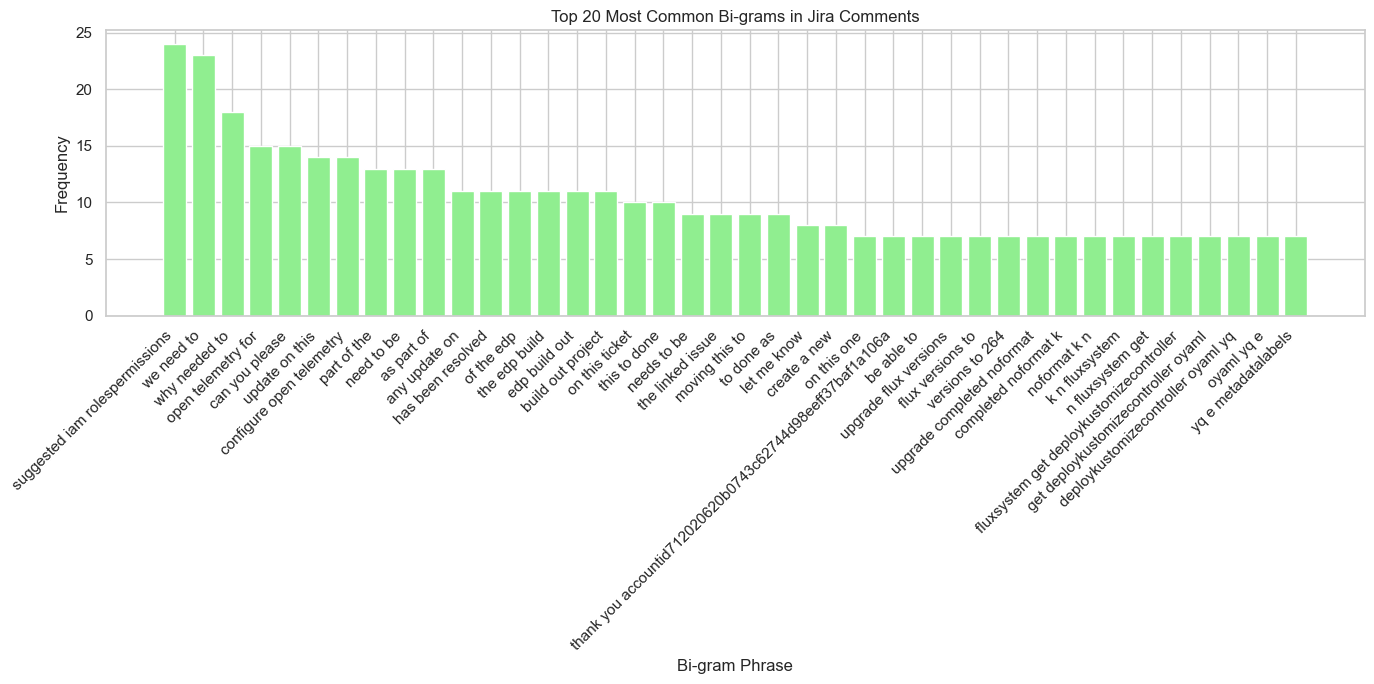

In [317]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

NUMBER_OF_WORDS_TO_CONNECT = 3 # For bi-grams, set to 2; for tri-grams, set to 3, etc.
# Function for basic text preprocessing
def basic_preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove non-alphanumeric characters (keep spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to generate N-grams (e.g., bi-grams if n=2)
def generate_ngrams(text, n=NUMBER_OF_WORDS_TO_CONNECT):
    # Split text into words
    words = text.split()
    # Generate n-grams
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(" ".join(words[i:i+n]))
    return ngrams

# Assuming 'df' is your DataFrame loaded from 'jira_done_issues_comments.csv'
# If you are running this code independently, you'll need to load the CSV first:
# df = pd.read_csv('jira_done_issues_comments.csv')

# Apply basic preprocessing to the 'comment_body' column
comments_df['processed_comment'] = comments_df['comment_body'].apply(basic_preprocess_text)

# Combine all processed comments into a single string
all_comments_text = " ".join(comments_df['processed_comment'])

# Generate bi-grams from the combined text
bi_grams = generate_ngrams(all_comments_text, n=NUMBER_OF_WORDS_TO_CONNECT)

# Get the most common bi-grams
most_common_bi_grams = Counter(bi_grams).most_common(40) # Top 20 bi-grams

# Create a DataFrame for common bi-grams for easy plotting
common_bi_grams_df = pd.DataFrame(most_common_bi_grams, columns=['bi_gram', 'count'])

# Plotting the most common bi-grams
plt.figure(figsize=(14, 7))
plt.bar(common_bi_grams_df['bi_gram'], common_bi_grams_df['count'], color='lightgreen')
plt.xlabel('Bi-gram Phrase')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Bi-grams in Jira Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Use plt.show() to display the plot, or plt.savefig('top_20_bi_grams.png') to save it

## --- Velocity Graphs ---

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/3580838917.py:53: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


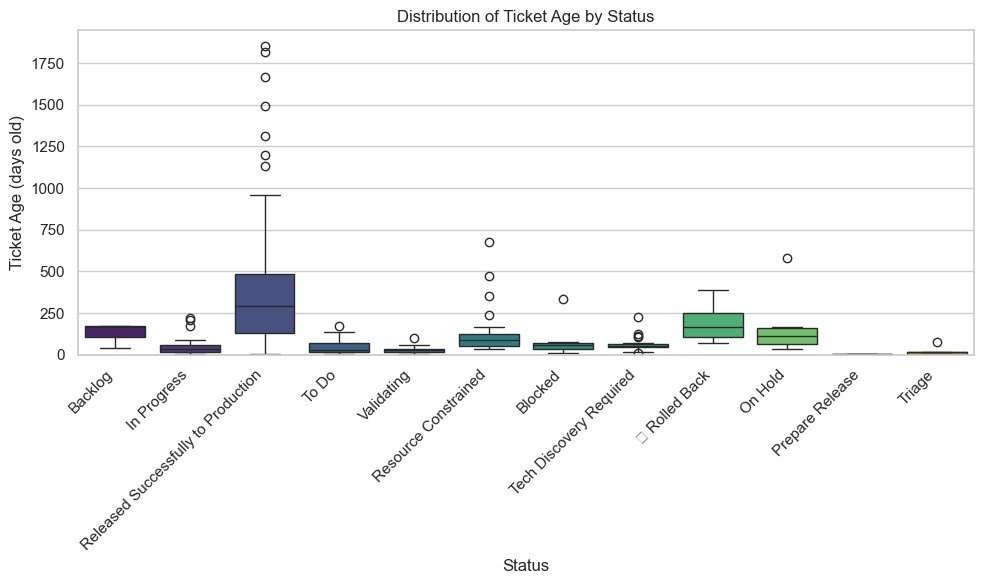

In [318]:
# --- Plotting ---
# Set the visual theme for the plots
sns.set_theme(style="whitegrid")

# Create the figure and axes for the plot
# Adjust figsize=(width, height) in inches as needed
plt.figure(figsize=(10, 6))

# --- Create the Box Plot ---
# x-axis: The status categories from your 'velocity' column
# y-axis: The age values from your age column
# data: Your DataFrame
# palette: Optional color scheme
df = df_issues.copy()
#df = df[(df['updated'].dt.year > 2000) & (df['created'].dt.year > 2000)] # Filter out rows with NaT values
# Now you can safely use the .dt accessor
#df = df[df['status'] == 'In Progress'] # Filter out NaT values
df = df[df['status'] != 'Done'] # Filter out NaT values
df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
#df = df[df['status'] != 'Blocked'] # Filter out NaT values
#df = df[df['status'] != 'Resource Constrained'] # Filter out NaT values
#df = df[df['status'] != 'On Hold'] # Filter out NaT values
#df = df[df['status'] != 'Tech Discovery Required'] # Filter out NaT values
#df = df[df['days_old'] <= 365] # Filter out NaT values

# Ensure 'velocity' is of type timedelta
#df['velocity'] = pd.to_timedelta(df['velocity'], errors='coerce')

# Use .dt.days to extract the number of days from the 'velocity' column
#d f['velocity_days'] = df['velocity'].dt.days


# Create the box plot using the 'velocity_days' column
ax = sns.boxplot(x='status', y='days_old', data=df, palette="viridis", hue='status')

# --- Customize the Plot ---
# Add a title
plt.title(f'Distribution of Ticket Age by Status')

# Set axis labels
plt.xlabel('Status')
plt.ylabel('Ticket Age (days old)')
y_min, y_max = plt.ylim() # Get current y-axis limits
y_min = 0 # Set minimum y-axis limit to 0
#y_max = 400
plt.ylim(y_min, y_max) # Set y-axis limits to the current limits


# Rotate x-axis labels if they are long or overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# --- Display the Plot ---
plt.show()

In [319]:
# df[df['days_old'] > 400].head(10)  # Display the first 10 rows of the DataFrame for verification

In [320]:
#df['status'].unique()  # Get unique status values in the DataFrame

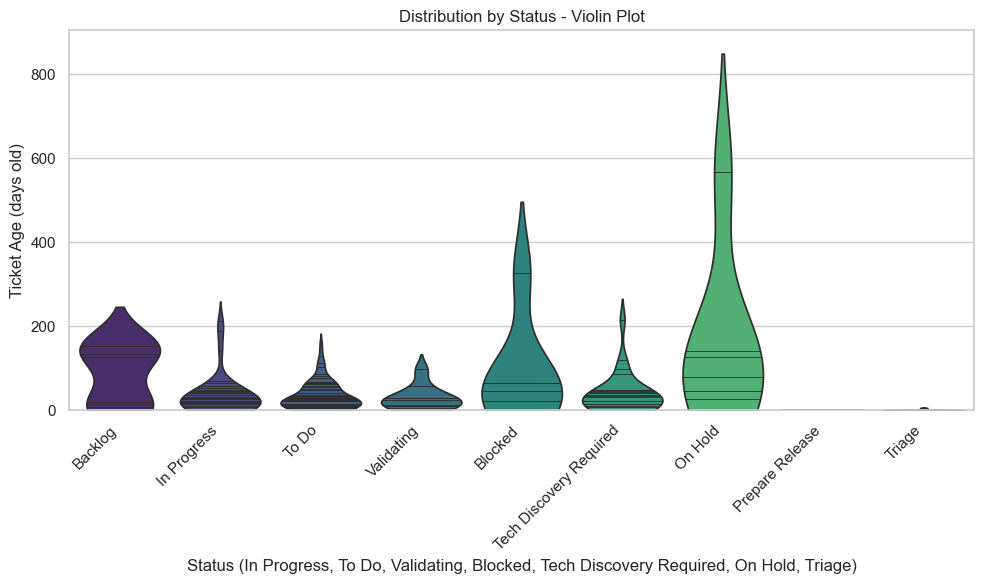

In [321]:
# --- Alternative: Violin Plot ---
# If you prefer a violin plot (shows density distribution), uncomment the lines below:

df = df_issues.copy()
#df = df[(df['updated'].dt.year > 2000) & (df['created'].dt.year > 2000)] # Filter out rows with NaT values
# Now you can safely use the .dt accessor
#df = df[df['status'] == 'In Progress'] # Filter out NaT values
df = df[df['status'] != 'Done'] # Filter out NaT values
df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
#df = df[df['status'] != 'Blocked'] # Filter out NaT values
df = df[df['status'] != 'Resource Constrained'] # Filter out NaT values
df = df[df['status'] != 'Released Successfully to Production'] # Filter out NaT values
df = df[df['status'] != '❌ Rolled Back'] # Filter out NaT values
df = df[df['status'] != 'Blocked For Development'] # Filter out NaT values
df = df[df['status'] != 'Plan Release'] # Filter out NaT values
plt.figure(figsize=(10, 6))
ax_violin = sns.violinplot(x='status', y='velocity_days', data=df[(df['status'] != 'Done') & (df['status'] != 'Will Not Do') & (df['status'] != 'Released Successfully to Production')], 
                           palette="viridis", inner="stick", hue='status') # 'inner' can be 'box', 'quartile', 'point', 'stick', None
#plt.title(f'Distribution by Status ({status.capitalize()}) - Violin Plot')
plt.title(f'Distribution by Status - Violin Plot')
plt.xlabel(f"Status ({', '.join(status)})")
plt.ylabel('Ticket Age (days old)')
plt.xticks(rotation=45, ha='right')
y_min, y_max = plt.ylim() # Get current y-axis limits
y_min = 0 # Set minimum y-axis limit to 0
#y_max = 400
plt.ylim(y_min, y_max) # Set y-axis limits to the current limits
plt.tight_layout()
plt.show()


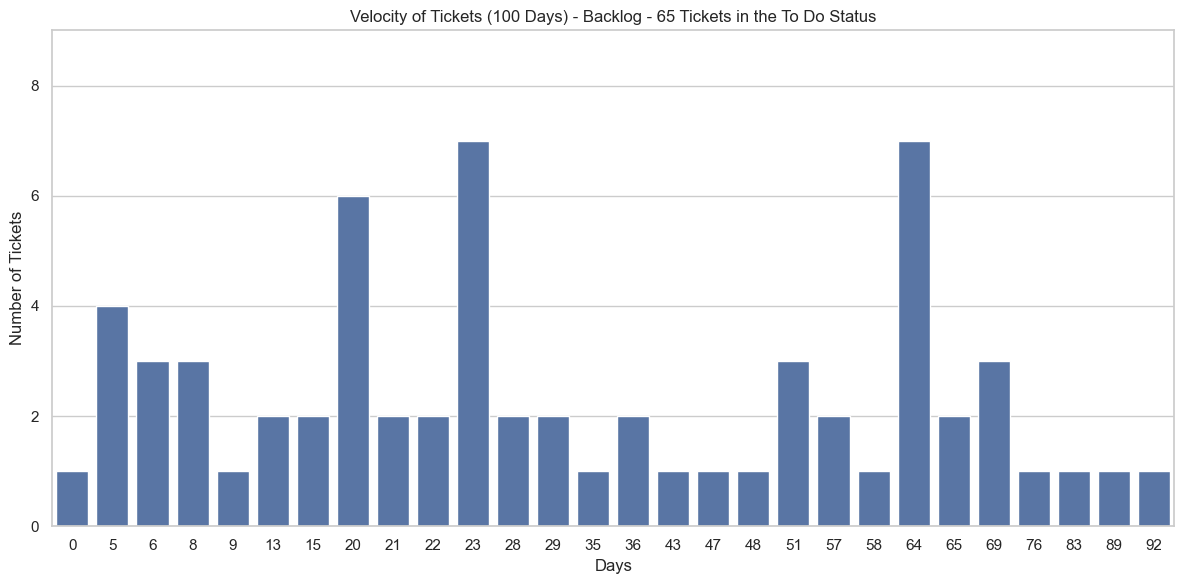

In [88]:
# Import ticker from matplotlib
# from matplotlib import ticker

# Convert the 'velocity' column to timedelta if not already in that format
#df_issues['velocity'] = pd.to_timedelta(df_issues['velocity'], errors='coerce')

df_velocity = df_issues.copy()
# Now you can safely use the .dt accessor
df = df_velocity[df_velocity['days_old'] <= 100].copy() # Filter out NaT values
df = df[df['status'] == 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Done'] # Filter out NaT values
#df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
#df = df[df['status'] != 'In Progress'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Backlog'] # Filter out NaT values
#df = df[df['status'] != 'In Analysis'] # Filter out NaT values
#df = df[df['status'] != 'In Development'] # Filter out NaT values
#df = df[df['status'] != 'In Test'] # Filter out NaT values
#df = df[df['status'] != 'In QA'] # Filter out NaT values
#df = df[df['status'] != 'In UAT'] # Filter out NaT values
#df = df[df['status'] != 'In Deployment'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'In Verification'] # Filter out NaT values
#df = df[df['status'] != 'In Validation'] # Filter out NaT values
#df = df[df['status'] != 'In Release'] # Filter out NaT values
#df = df[df['status'] != 'In Staging'] # Filter out NaT values
#df = df[df['status'] != 'In Pre-Production'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df['velocity'].dt.days
#df['velocity'].dt.days.value_counts()
#df['velocity'].dt.days.value_counts().sort_index()
# Plotting the velocity of issues
plt.figure(figsize=(12, 6))
#sns.barplot(x=df['velocity'].dt.days.value_counts().sort_index().index,
#            y=df['velocity'].dt.days.value_counts().sort_index().values
#            ) # Filter out NaT values
sns.barplot(x=df['days_old'].value_counts().sort_index().index,
            y=df['days_old'].value_counts().sort_index().values
            ) # Filter out NaT values
plt.title('Velocity of Tickets (100 Days) - Backlog - ' + str(df['days_old'].value_counts().sum()) + ' Tickets in the To Do Status')
plt.xlabel('Days')
plt.ylabel('Number of Tickets')
plt.tight_layout()
#plt.axhline(y=df['velocity'].dt.days.value_counts().sort_index().mean(), color='r', linestyle='--', label='Mean Velocity')
plt.ylim(0, df['days_old'].value_counts().sort_index().max() + 2) # Set y-axis limits to the current limits
from matplotlib.ticker import MultipleLocator
# Set the step size for y-axis ticks
plt.gca().yaxis.set_major_locator(MultipleLocator(2))
plt.show()
#print(df['velocity_days'].value_counts().sum())
#print(df.shape)

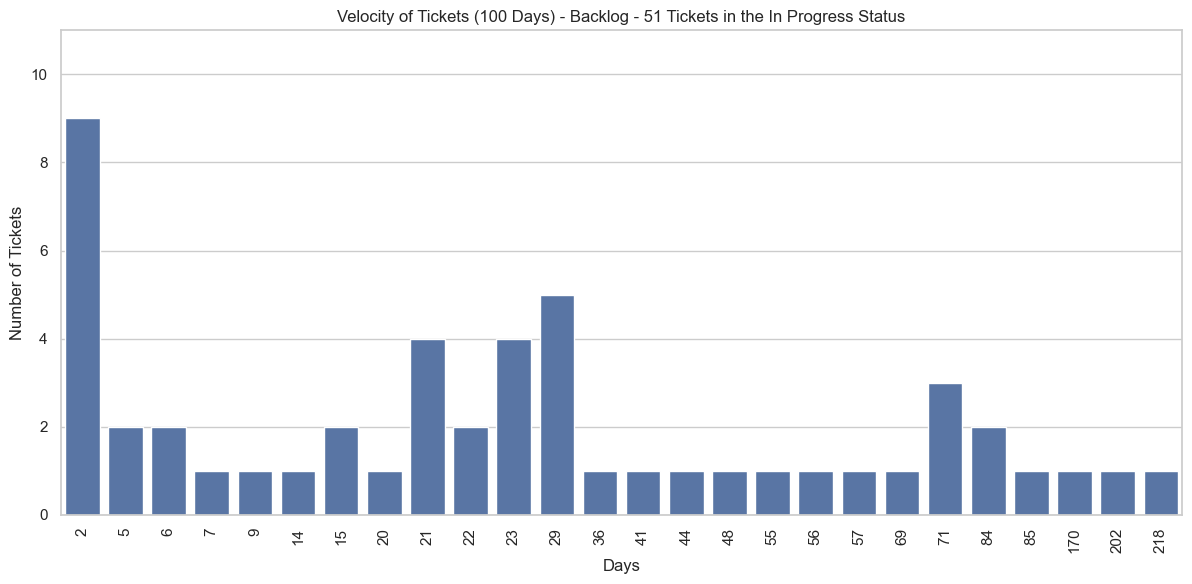

In [89]:
df_velocity = df_issues.copy()
# Now you can safely use the .dt accessor
df = df_velocity[df_velocity['days_old'] <= 400].copy() # Filter out NaT values
#df = df[df['status'] == 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Done'] # Filter out NaT values
#df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
df = df[df['status'] == 'In Progress'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Backlog'] # Filter out NaT values
#df = df[df['status'] != 'In Analysis'] # Filter out NaT values
#df = df[df['status'] != 'In Development'] # Filter out NaT values
#df = df[df['status'] != 'In Test'] # Filter out NaT values
#df = df[df['status'] != 'In QA'] # Filter out NaT values
#df = df[df['status'] != 'In UAT'] # Filter out NaT values
#df = df[df['status'] != 'In Deployment'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'In Verification'] # Filter out NaT values
#df = df[df['status'] != 'In Validation'] # Filter out NaT values
#df = df[df['status'] != 'In Release'] # Filter out NaT values
#df = df[df['status'] != 'In Staging'] # Filter out NaT values
#df = df[df['status'] != 'In Pre-Production'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df['velocity'].dt.days
#df['velocity'].dt.days.value_counts()
#df['velocity'].dt.days.value_counts().sort_index()
# Plotting the velocity of issues
plt.figure(figsize=(12, 6))
#sns.barplot(x=df['velocity'].dt.days.value_counts().sort_index().index,
#            y=df['velocity'].dt.days.value_counts().sort_index().values
#            ) # Filter out NaT values

sns.barplot(x=df['days_old'].value_counts().sort_index().index,
            y=df['days_old'].value_counts().sort_index().values
            ) # Filter out NaT values
plt.title('Velocity of Tickets (100 Days) - Backlog - ' + str(df['days_old'].value_counts().sum()) + ' Tickets in the In Progress Status')
plt.xlabel('Days')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90) # Rotate x-axis labels if needed
plt.tight_layout()
#plt.axhline(y=df['velocity'].dt.days.value_counts().sort_index().mean(), color='r', linestyle='--', label='Mean Velocity')
plt.ylim(0, df['days_old'].value_counts().sort_index().max() + 2) # Set y-axis limits to the current limits
plt.show()
#print(df['velocity_days'].value_counts().sum())
#print(df.shape)

In [90]:
df_issues['priority_name'].value_counts().sort_values(ascending=False)

priority_name
None           5341
High           1239
Medium          992
No Priority     590
Urgent          322
Low             267
P2 - Normal      13
P1 - Major        1
Name: count, dtype: int64

In [91]:
df_issues['status'].value_counts()

status
Done                                   7068
Will Not Do                            1262
Released Successfully to Production     213
To Do                                    70
In Progress                              51
Tech Discovery Required                  26
Resource Constrained                     22
Blocked                                  14
Triage                                   11
Backlog                                   9
Validating                                7
On Hold                                   6
❌ Rolled Back                             4
Prepare Release                           1
Plan Release                              1
Name: count, dtype: int64

In [92]:
print(f"Finished fetching. Found {total_issues_processed} issues in total.")
print("\n--- Summary of Counts ---")
print("\nAssignee Counts:")
for assignee, count in assignee_counts.items():
    print(f"- {assignee}: {count}")
print("\nIssue Creator Counts:")
for creator, count in issue_creator_counts.items():
    print(f"- {creator}: {count}")
print("\nStatus Counts:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")
print("\nIssue Type Counts:")
for issue_type, count in issue_type_counts.items():
    print(f"- {issue_type}: {count}")
print("\nScript finished.")

Finished fetching. Found 0 issues in total.

--- Summary of Counts ---

Assignee Counts:
- Aaron Schultheis: 1
- Aaron Wolfrom: 62
- Adam Shero: 386
- Adrien.Carlson: 11
- Aislinn Joyce: 11
- AkashD: 39
- Alec Sands: 66
- Alejandro Benjumea: 16
- Alejandro Ponce: 19
- Alex Peguero-Cruz: 4
- Alex Wilson: 8
- Alison Dougherty: 2
- Amit Manocha: 1
- Amy Van Hook: 4
- Anas Ahmad: 6
- Andriy Petryshyn: 13
- Andy Drake: 1
- Angel Cancio: 410
- Anne Tiotuico: 1
- Arjun Parajuli: 1
- Austin Lane: 38
- Ben Bonora: 22
- Beverly Lam: 19
- bilal.waheed: 2
- Bolanle: 782
- Brad Dunnigan: 2
- brent.bonet: 1
- Brian Bosworth: 69
- Brian Wagner: 3
- Bryan.DeVries: 9
- Bryan Harris: 39
- Carlos Zuniga Ballestero: 3
- Chandler Deming: 1
- Chris Haggard: 1
- Chris Hodges: 129
- Chris Strolia-Davis: 5
- Christian Tragesser: 1
- Christina Koerte: 1
- Cris Stoddard: 1
- Cristhiam David Henao Moreno: 2
- Crystal.Ju: 2
- Cullen Philippson: 410
- Daniel.Newell: 14
- Daniel Warshaw: 1
- Danish Sattar: 6
- Dan S

In [93]:
df_assignee = pd.DataFrame(assignee_counts.items(), columns=['Assignee', 'Count'])
df_assignee = df_assignee.sort_values(by='Count', ascending=False)
df_assignee.reset_index(drop=True, inplace=True)
print("\n--- Assignee Counts DataFrame ---")
df_assignee


--- Assignee Counts DataFrame ---


,Assignee,Count
0,Unassigned,1574
1,Tom Terry,1153
2,Bolanle,782
3,David Caballero,617
4,Dan Shepard,573
...,...,...
192,stephanie.barulic,1
193,Vincent Ma,1
194,Victoria Benecke,1
195,Web Beveridge,1


## -- Distribution of Tickets per Assignee --

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/4021496809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assignee', y='Count', data=df_assignee[df_assignee['Count'] > 50], palette='viridis')


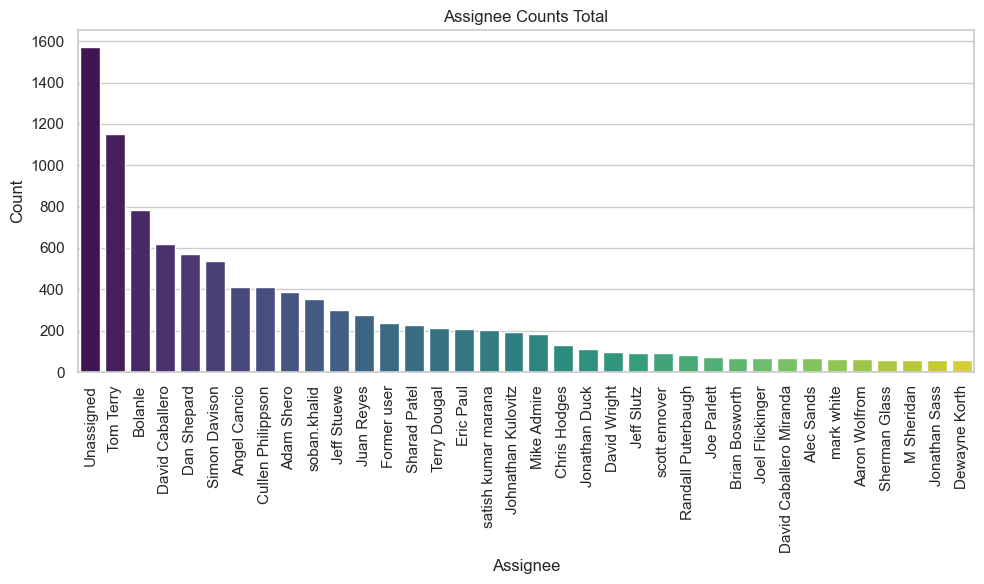

In [94]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Assignee', y='Count', data=df_assignee[df_assignee['Count'] > 50], palette='viridis')
plt.title('Assignee Counts Total')
plt.xlabel('Assignee')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [95]:
df_issues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8765 entries, 1 to 11408
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   key                    8765 non-null   object                   
 1   id                     8765 non-null   object                   
 2   summary                8765 non-null   object                   
 3   status                 8765 non-null   object                   
 4   issuetype              8765 non-null   object                   
 5   creator_name           8765 non-null   object                   
 6   assignee_name          8765 non-null   object                   
 7   created                8765 non-null   object                   
 8   updated                8765 non-null   object                   
 9   project_name           8765 non-null   object                   
 10  project_id             8765 non-null   object       

In [96]:
start_year = 2000
total_per_assignee_df = df_issues[df_issues['year_updated'] >= start_year ].groupby(['year_updated', 'month_updated','assignee_name']).agg(Total=('assignee_name', 'count')).sort_values(['year_updated', 'month_updated'])




In [97]:
total_per_assignee_df

Total
year_updated month_updated assignee_name             
2019         1             Former user              1
                           Unassigned               2
             2             Chad                     4
                           Former user              8
                           Unassigned               8
...                                               ...
2025         9             Unassigned              27
                           sabrina.szymczak         1
                           satish kumar marana      5
                           scott.ennover           25
                           simon.davison            6

[999 rows x 1 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/520573457.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


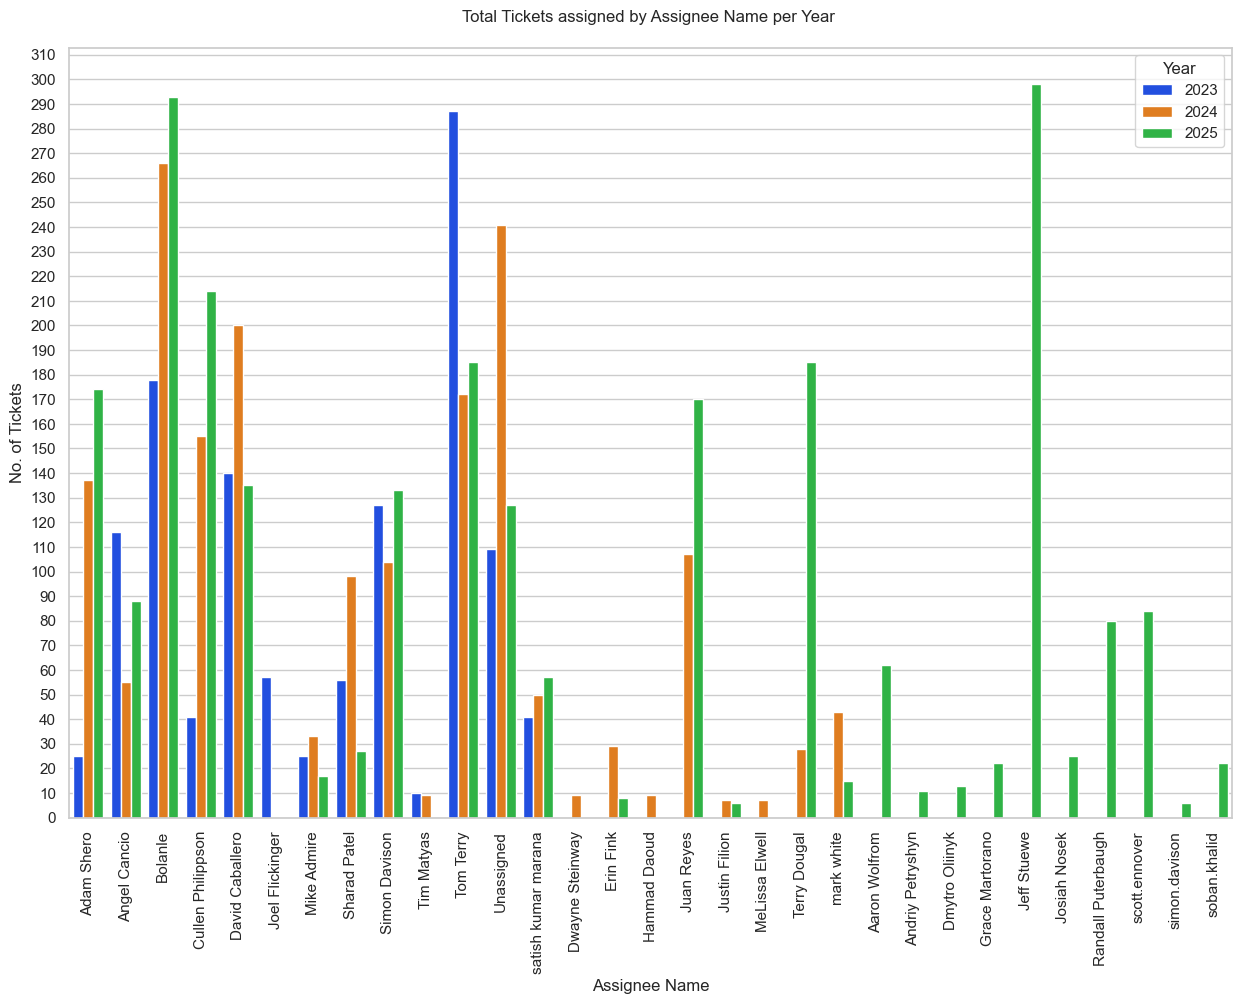

In [98]:
start_year = 2023
total_per_assignee_df = df_issues[df_issues['year_updated'] >= start_year ].groupby(['year_updated','assignee_name']).agg(Total=('assignee_name', 'count')).sort_values(['year_updated'])
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="assignee_name", y="Total", data=total_per_assignee_df[(total_per_assignee_df['Total'] > 5) & (total_per_assignee_df['Total'] < 300)],
            hue='year_updated', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Assignee Name")
ax.set_ylabel("No. of Tickets")
#ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
ax.set_title("Total Tickets assigned by Assignee Name per Year \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))
ax.legend(title='Year', loc='upper right')
#plt.savefig("AWS Yearly Cost by Service")

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/3984111295.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


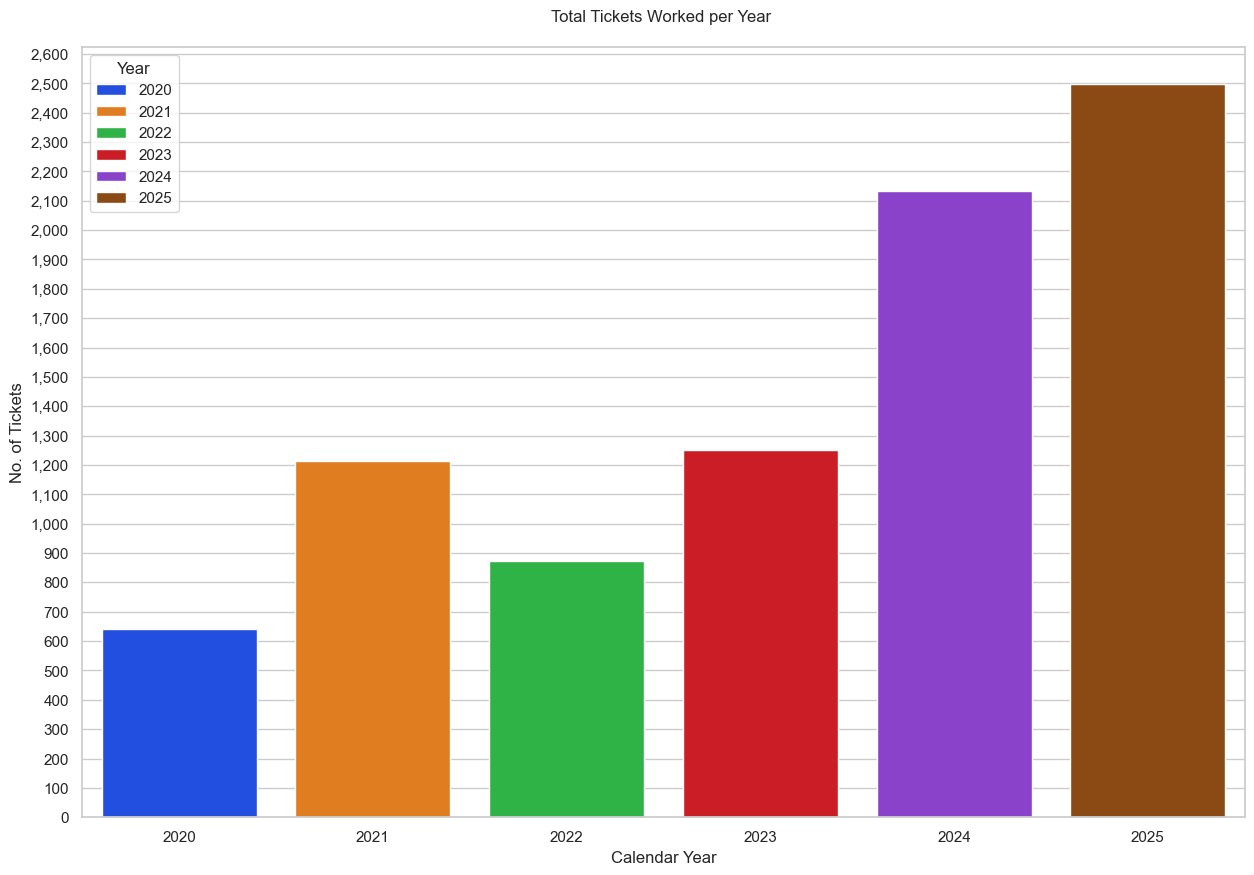

In [100]:
start_year = 2020
total_per_year_df = df_issues[df_issues['year_updated'] >= start_year ].groupby(['year_updated']).agg(Total=('year_updated', 'count')).sort_values(['year_updated'])
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="year_updated", y="Total", data=total_per_year_df,
            hue='year_updated', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Calendar Year")
ax.set_ylabel("No. of Tickets")
#ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
ax.set_title("Total Tickets Worked per Year \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))
ax.legend(title='Year', loc='upper left')
#plt.savefig("AWS Yearly Cost by Service")

In [101]:
df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] < 365)]

,key,id,summary,status,issuetype,creator_name,assignee_name,created,updated,project_name,...,target_end_date,bussiness_lead,planning_rank,portfolio_rank,legend,parent_project,parent,week,parent_str,month
4,EIT-457,169035,ZCUBETES01 - Diary Markets downloading multipl...,In Progress,Task,Christina Koerte,Aaron Wolfrom,2025-08-04 07:53:19.716000-06:00,2025-09-02 06:47:57.782000-06:00,Enterprise IT,...,NaT,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,EIT-96,2025-09-01/2025-09-07,EIT-96,2025-08
8,EIT-360,167279,Corp DMZ range changing from 10.238.0.0/22 to ...,In Progress,Task,Zendesk Support for Jira,Aaron Wolfrom,2025-07-08 09:48:56.060000-06:00,2025-08-21 11:31:06.599000-06:00,Enterprise IT,...,2025-07-22 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,EIT-348,2025-08-18/2025-08-24,EIT-348,2025-07
9,EIT-70,162098,Migrate URL Redirector to Fortigate,In Progress,Task,Grace Martorano,Aaron Wolfrom,2025-03-31 20:27:03.857000-06:00,2025-08-21 11:23:54.816000-06:00,Enterprise IT,...,2025-07-07 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,EIT-94,2025-08-18/2025-08-24,EIT-94,2025-03
10,EIT-299,166666,Create SMTP Relay - EIT 171 - Dependency,In Progress,Task,scott.ennover,Aaron Wolfrom,2025-06-25 06:09:04.620000-06:00,2025-08-21 11:19:45.719000-06:00,Enterprise IT,...,2025-07-22 00:00:00+00:00,Jorge Rodriguez,Unknown,NaT,<NA>,<NA>,EIT-93,2025-08-18/2025-08-24,EIT-93,2025-06
64,DEVOPS-8158,170139,[Nonprod] Unity: Configure Grafana Collection,In Progress,Story,Adam Shero,Adam Shero,2025-08-19 13:54:10.741000-06:00,2025-09-17 14:57:58.048000-06:00,DevOps,...,2025-09-17 00:00:00+00:00,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8154,2025-09-15/2025-09-21,DEVOPS-8154,2025-08
66,DEVOPS-8323,171707,Configure Open Telemetry for Experience API,In Progress,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:15.507000-06:00,2025-09-16 12:54:43.958000-06:00,DevOps,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
67,DEVOPS-8322,171706,Configure Open Telemetry for Listener Profile,In Progress,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:14.027000-06:00,2025-09-16 12:54:41.802000-06:00,DevOps,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
68,DEVOPS-8321,171705,Configure Open Telemetry for User Token,In Progress,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:12.493000-06:00,2025-09-16 12:54:39.467000-06:00,DevOps,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
69,DEVOPS-8320,171704,Configure Open Telemetry for Identity User Lookup,In Progress,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:10.973000-06:00,2025-09-16 12:54:38.047000-06:00,DevOps,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09
70,DEVOPS-8319,171703,Configure Open Telemetry for Identity Engagement,In Progress,Sub-task,Adam Shero,Adam Shero,2025-09-15 15:33:09.324000-06:00,2025-09-16 12:54:35.809000-06:00,DevOps,...,NaT,Unknown,Unknown,NaT,<NA>,<NA>,DEVOPS-8316,2025-09-15/2025-09-21,DEVOPS-8316,2025-09


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/1113691039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='assignee_name', y='days_old', data=df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] < 300)], palette='viridis')


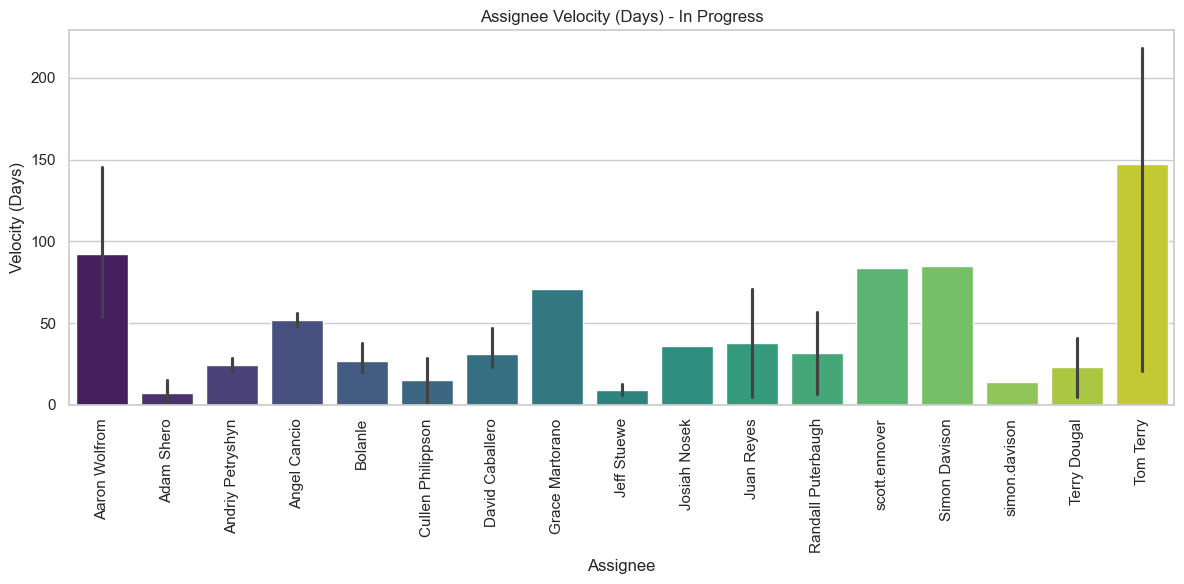

In [102]:
#data = df_issues.groupby(['status','assignee_name'])['days_old'].mean().sort_values(ascending=False).copy()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 
sns.barplot(x='assignee_name', y='days_old', data=df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] < 300)], palette='viridis')
plt.title('Assignee Velocity (Days) - In Progress')
plt.xlabel('Assignee')
plt.ylabel('Velocity (Days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [103]:
df_creator = pd.DataFrame(issue_creator_counts.items(), columns=['creator', 'Count'])
df_creator = df_creator.sort_values(by='Count', ascending=False)
df_creator.reset_index(drop=True, inplace=True)
print("\n--- creator Counts DataFrame ---")
df_creator



--- creator Counts DataFrame ---


,creator,Count
0,Former user,526
1,David Caballero,482
2,Adam Shero,451
3,Zendesk Support for Jira,350
4,Simon Davison,297
...,...,...
342,Andrew Dizenzo,1
343,Rob McClain,1
344,Tammy LaTier,1
345,tom.schairer,1


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/2755360980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='creator', y='Count', data=df_creator[df_creator['Count'] > 50], palette='viridis')


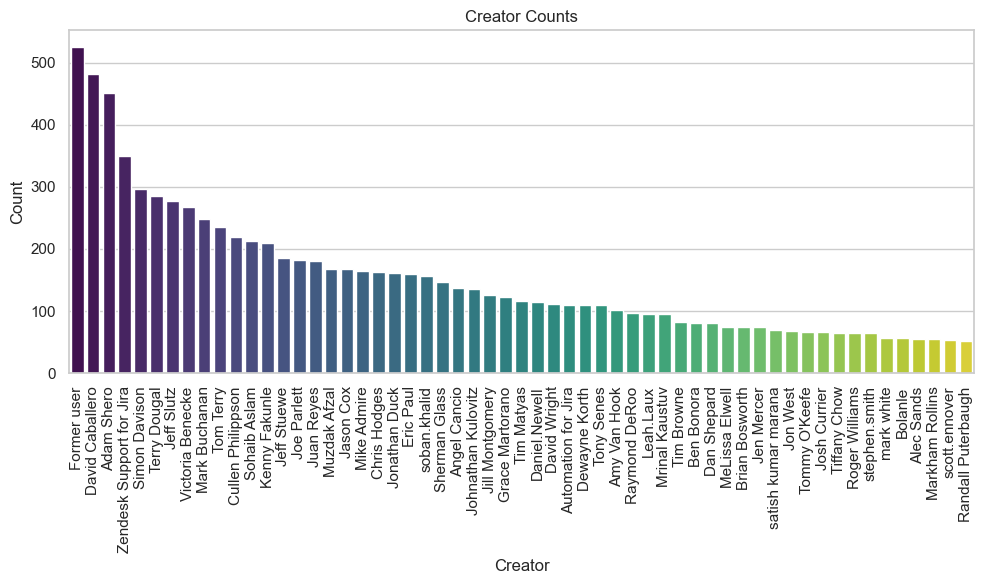

In [104]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='creator', y='Count', data=df_creator[df_creator['Count'] > 50], palette='viridis')
plt.title('Creator Counts')
plt.xlabel('Creator')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [105]:
df_issue_type = pd.DataFrame(issue_type_counts.items(), columns=['Issue Type', 'Count'])
df_issue_type = df_issue_type.sort_values(by='Count', ascending=False)
df_issue_type.reset_index(drop=True, inplace=True)
print("\n--- Issue Type Counts DataFrame ---")
df_issue_type


--- Issue Type Counts DataFrame ---


,Issue Type,Count
0,Task,5081
1,Change and Release,2914
2,Story,2037
3,Support,410
4,Feature,398
5,Bug,259
6,Sub-task,205
7,Legend,24
8,Post Mortem,21
9,Incident,20


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_78069/3259829271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Issue Type', y='Count', data=df_issue_type[df_issue_type['Count'] > 50], palette='viridis')


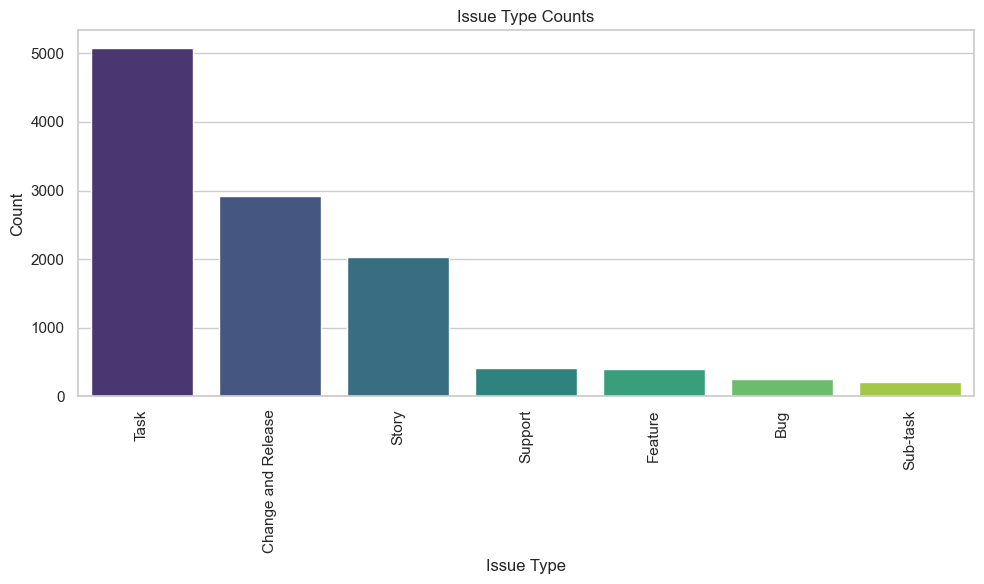

In [106]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Issue Type', y='Count', data=df_issue_type[df_issue_type['Count'] > 50], palette='viridis')
plt.title('Issue Type Counts')
plt.xlabel('Issue Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## -- Custom Fields in Jira --

In [107]:
print("Fetching field definitions...")
all_fields = jira.fields()
custom_field_map = {field['id']: field['name'] for field in all_fields if field['custom']}
print("Field definitions fetched.")

Fetching field definitions...
Field definitions fetched.


In [108]:
custom_field_map

{'customfield_10872': 'Mobile Platform',
 'customfield_11720': 'Idea archived on',
 'customfield_10873': 'Mobile Device Model',
 'customfield_10500': 'Team',
 'customfield_11719': 'Idea archived by',
 'customfield_11718': 'Idea archived',
 'customfield_10980': 'Planning Notes',
 'customfield_10981': 'Reference',
 'customfield_10862': 'QA',
 'customfield_10975': 'Issues to be Load Tested',
 'customfield_10976': 'Load Testing',
 'customfield_10977': 'Request Type',
 'customfield_10978': 'Request Type',
 'customfield_10979': 'Fixed Version',
 'customfield_11949': 'Rollback Category',
 'customfield_10970': 'Defect Severity and Environment',
 'customfield_10971': 'DevOps',
 'customfield_10972': 'Program Manager',
 'customfield_10962': 'Measurement & Analysis Plan',
 'customfield_10600': 'Organizations',
 'customfield_10963': 'Resources',
 'customfield_10965': 'Assumptions and Constraints',
 'customfield_10966': 'Risks and Mitigations',
 'customfield_10967': 'Champion',
 'customfield_10968':

In [110]:

# --- Process Each Issue ---
for issue in issues_iterator[:10]:
        print(f"\n--- Issue: {issue.key} ({issue.fields.summary}) ---")
        custom_fields_data = {}

        # Access the raw field data which reliably contains custom fields
        # The 'issue.fields' object might not dynamically populate all custom fields
        # as attributes unless explicitly requested or configured.
        raw_fields = issue.raw.get('fields', {})

        for field_id, value in raw_fields.items():
            if field_id.startswith('customfield_'):
                # Get the human-readable name if available
                field_name = custom_field_map.get(field_id, field_id) # Fallback to ID if name not found
                custom_fields_data[field_name] = value
                # You can also store the ID if needed:
                # custom_fields_data[field_id] = {'name': field_name, 'value': value}


        if custom_fields_data:
            print("Custom Fields:")
            for name, value in custom_fields_data.items():
                 # Values can be complex (dicts, lists, strings, numbers, None)
                 # Handle potential None values gracefully
                print(f"  - {name}: {value if value is not None else 'N/A'}")
        else:
            print("  No custom fields found or retrieved for this issue.")


KeyError: slice(None, 10, None)